In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
import re
import chardet
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Data Downloading

In [2]:
with open ('tubes.csv','rb') as csvfile:
    result = chardet.detect(csvfile.read(999))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7107894736842105, 'language': ''}


In [3]:
data = pd.read_csv('tubes.csv')
kolomasli = list(data.columns)

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,185,186,187,188,189,190,191,193,194,195,196,197,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,249,250,251,252,253,254,255,256,25

# Pencarian Data Invalid

### Pencarian data tidak valid dilakukan berdasarkan data ganda pada kolom responden, NIM yang tidak sesuai format (bukan 8 digit).

In [4]:
newarray = data.loc[0,:]
shape = data.shape
for i in range(data.shape[1]):
    print(i,data.columns[i])

0 Nama Surveyor (Mahasiswa )
1 NIM Surveyor (Mahasiswa)
2 Kelas Surveyor (Mahasiswa)
3 Unnamed: 3
4 Nama Responden
5 Jenis kelamin ?
6 Unnamed: 6
7 Usia :
8 Unnamed: 8
9 Unnamed: 9
10 Unnamed: 10
11 Unnamed: 11
12 Unnamed: 12
13 Pendidikan Terakhir?
14 Unnamed: 14
15 Unnamed: 15
16 Unnamed: 16
17 Unnamed: 17
18 Unnamed: 18
19 Pekerjaan?
20 Unnamed: 20
21 Unnamed: 21
22 Unnamed: 22
23 Unnamed: 23
24 Unnamed: 24
25 Unnamed: 25
26 Penghasilan per bulan?
27 Unnamed: 27
28 Unnamed: 28
29 Unnamed: 29
30 Domisili saat ini
31 Unnamed: 31
32 Unnamed: 32
33 Unnamed: 33
34 Unnamed: 34
35 Unnamed: 35
36 Unnamed: 36
37 Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?
38 Unnamed: 38
39 Unnamed: 39
40 Rata-rata durasi menggunakan internet Aktif tiap hari ?
41 Unnamed: 41
42 Unnamed: 42
43 Unnamed: 43
44 Unnamed: 44
45 Unnamed: 45
46 Unnamed: 46
47 Unnamed: 47
48 Unnamed: 48
49 Akses atau provider internet yang digunakan selama ini?
50 Unnamed: 50
51 Unnamed: 51
52 Unnamed: 52
53 Berapa 

In [5]:
data[data.columns[318]].unique()

array(['Lainnya, mohon sebutkan', nan, 'BNI mobile', 'Mandiri Syariah',
       'OVO', 'tidak ada', 'PEGADAIAN NABUNG EMAS', '-', 'Tidak pernah',
       'Mandiri', 'Tidak ada', 'mandiri syariah', 'Ovo, Shopee-Pay',
       'BNI', 'Tidak Pernah', 'mandiri', 'Mandiri syariah', 'Sekuritas',
       'BNI Taplus', 'tidak pernah', 'Btpn', 'Indopremier sekuritas',
       'Muamalat', 'Mandiri Online', 'RDN Permata untuk rekening saham ',
       'N.A.', 'Rekening Indopremier', 'belum pernah',
       'Mandiri Online by Bank Mandiri', 'BNI Sekuritas', 'tidak',
       'pembukaan rekening saham ipot', '---', 'bni', 'Bni', 'BRI',
       'Bank Mandiri', 'Cimb', 'ga pernah', 'Monzo', 'DANA',
       'Commonwealth Bank of Australia',
       'Bikin rekening saham bank permata', 'panin', 'Sinarmas',
       'Okto Mobile by CIMB Niaga', 'yang dari itb terus mikih bri',
       'Permata ', 'OCBC', 'TIDAK PERNAH', 'Cimb Niaga', 'BCA Sekuritas',
       'tak pernah', 'TMRW by UOB', 'BNI Mbanking', 'Ovo', 'ocbc',
  

In [6]:
#pengecekan kolom-kolom yang mengandung isi nonkategorikal
counterlain = []
for i in range(data.shape[1]):
    if re.search(r'(lainnya,|Lainnya|jelaskan|Jelaskan)',data.iloc[0,i]):
        counterlain.append(i)

#### Di bawah ini, terdapat fungsi dengan penjelasan sebagai berikut.
- cekpattern -> digunakan untuk menghapus atau mengganti substring berpola dengan memanfaatkan regular expressions.
- counter -> digunakan sebagai subfungsi dari ganti().
- ganti -> digunakan untuk mengganti elemen data yang jumlahnya hanya 1 atau 2.

In [7]:
def cekpattern(a,b,c,d,data):
    pattern = r'(%s)'%a
    data.iloc[:,c] = data.iloc[:,c].fillna('temp').str.lower()
    temp = b
    string = '%s'%d
    
    if temp=='sub':
        for i in range(data.shape[0]):
            data.iloc[i,c] = re.sub(pattern,string,data.iloc[i,c])
            
    if temp=='search':
        for i in range(data.shape[0]):
            if re.search(pattern,data.iloc[i,c]):
                data.iloc[i,c] = np.nan
    
    data.iloc[:,c] = [np.nan if x=='temp' else x for x in data.iloc[:,c]]
    return data   

In [8]:
def uniques_withnan(col,data):
    data.iloc[:,col] = data.iloc[:,col].fillna('')
    a = [data.iloc[i,col].split(',') for i in range(data.shape[0]) ]
    a = list(set([str(item).lower() for sublist in a for item in sublist]))
    data.iloc[:,col] = data.iloc[:,col].replace('',np.nan)
    return a

def uniqueword_withnan(col,data):
    a = uniques_withnan(col=col,data=data)
    uniquewords = [a[i].split(' ') for i in range(len(a))]
    uniquewords = list(set([item for sublist in uniquewords for item in sublist]))
    
    return uniquewords

def jumlahunique_withnan(lists,col,data):
    data.iloc[:,col] = data.iloc[:,col].fillna('')
    ar2 = [len([j for j in [1 if re.search(r'(%s)'%pattern,data.iloc[i,col]) else 0 for i in range(data.shape[0])] if j==1])for pattern in lists]
    
    data.iloc[:,col] = data.replace('',np.nan)
    return ar2

def subbing(lists,data,col):
    ls = lists
    
    array = [data.iloc[i,col].replace(data.iloc[i,col],j) for j in ls for i in range(data.shape[0]) if re.search(r"(%s)"%j,data.iloc[i,col])]

In [9]:
def counters(a,b):
    ax = b.iloc[:,a].fillna('nan')
    ax = [str(x).lower() for x in ax]
    count = []
    
    for i in range(len(ax)):
        count.append(ax.count(ax[i]))
    return count

In [10]:
def ganti(col,data,x):
    array = []
    ax = counters(col,b=data)
    j = 0
    for i in ax:
        if 0<i<=x:
            array.append('Lainnya')
        elif i>x:
            array.append(str(data.iloc[j,col]).lower())
        else:
            array.append(np.nan)
        j+=1
    
    array = [np.nan if x=='nan' else x for x in array]
    data.iloc[:,col] = array
    
    return data

#### Ini implementasi dari fungsi-fungsinya.

In [14]:
data = data.fillna('')
for i in counterlain:
    data[data.columns[i]] = [re.sub('(tidak|tak|belum|blm|tdk|gak|gapernah|ga|-)','',x) for x in data[data.columns[i]]]

data = data.replace('',np.nan)

In [15]:
data = ganti(25,data=data,x=5)

In [16]:
data = ganti(76,data=data,x=1)

In [17]:
data = ganti(184,data=data,x=3)

In [18]:
data = ganti(192,data=data,x=4)

In [19]:
data = ganti(199,data=data,x=2)

In [20]:
data = ganti(308,data=data,x=2)
data = ganti(324,data=data,x=2)
data = ganti(332,data=data,x=2)
data = ganti(339,data=data,x=2)
data = ganti(344,data=data,x=2)
data = ganti(367,data=data,x=2)
data = ganti(379,data=data,x=2)
data = ganti(388,data=data,x=2)
data = ganti(407,data=data,x=2)
data = ganti(414,data=data,x=2)
data = ganti(421,data=data,x=2)

In [21]:
data = ganti(434,data=data,x=2)
data = ganti(470,data=data,x=2)
data = ganti(481,data=data,x=2)
data = ganti(488,data=data,x=2)
data = ganti(497,data=data,x=2)
data = ganti(507,data=data,x=2)
data = ganti(514,data=data,x=2)
data = ganti(529,data=data,x=2)
data = ganti(538,data=data,x=2)
data = ganti(557,data=data,x=2)
data = ganti(563,data=data,x=2)
data = ganti(571,data=data,x=2)
data = ganti(588,data=data,x=2)
data = ganti(594,data=data,x=2)
data = ganti(600,data=data,x=2)
data = ganti(605,data=data,x=2)

#### Di bawah ini, terdapat fungi gabungan, yang digunakan untuk menggabungkan kolom berdasarkan indeks kolom.

In [22]:
def gabungan(a,b,data,nama,tmp):
    array = ['' for i in range(data.shape[0])]
    first = data.iloc[0,:]
    data.iloc[:,np.arange(a,b+1)] = data.iloc[:,np.arange(a,b+1)].fillna(0)
    
    for i in range(data.shape[0]):
        pra=[] #pra diisi indeks kolom yang nilai elemennya tak nol.
        count = [] #count digunakan untuk mencari indeks dengan nilai elemen tak nol
        for j in range(a,b+1):
            if (data[data.columns[j]][i]!= 0): #if nilai elemen gak nol
                count.append(j)
                pra.append(first[j])
        if len(count)==1: #kalau indeks gak nol cuma ada 1
            array[i]=first[count[0]]
        if len(count)>1:
            array[i] = ",".join(pra)

    if tmp:
        selectnum = list(data.loc[data[data.columns[b]]!=0].index)
        j=0
        for i in selectnum:
            array[i] = re.sub(r'(%s)'%str(first[b]),str(data.iloc[i,b]),str(array[i]))
            
    data[data.columns[a]] = array
    data.rename(columns={data.columns[a] : nama},inplace=True)
    data = data.drop([data.columns[i] for i in range(a+1,b+1)],axis=1)
    
    return data


#### Ini implementasi dari fungsi gabungan

In [23]:
data = gabungan(a=2,b=3,data=data,nama='Jurusan',tmp=False)

In [24]:
data = gabungan(4,5,data=data,nama='Jenis Kelamin',tmp=False)

In [25]:
data = gabungan(a=5,b=10,data=data,nama='Usia',tmp=False)

In [26]:
data = gabungan(6,11,data=data,nama='Pendidikan Terakhir',tmp=False)

In [27]:
data = gabungan(7,13,data=data,nama='Pekerjaan',tmp=True)

In [28]:
data = gabungan(8,11,data=data,nama='Penghasilan per Bulan',tmp=False)

In [29]:
data = gabungan(9,15,data=data,nama='Domisili',tmp=True)

In [30]:
data = gabungan(10,12,data=data,nama=data.columns[10],tmp=False)

In [31]:
data = gabungan(11,19,data=data,nama=data.columns[11],tmp=False)

In [32]:
data = gabungan(12,14,data=data,nama=data.columns[12],tmp=False)

In [33]:
data = gabungan(14,19,data=data,nama='Pengeluaran Mobile Data',tmp=False)

In [34]:
data = gabungan(15,20,data=data,nama='Pengeluaran Broadband',tmp=False)

In [35]:
data = gabungan(16,27,data=data,nama=data.columns[16],tmp=True)

In [36]:
data = gabungan(17,24,data=data,nama='Frekuensi berbelanja Online',tmp=False)

In [37]:
data = gabungan(18,25,data=data,nama='Frekuensi Streaming video/ film',tmp=False)

In [38]:
data = gabungan(19,26,data=data,nama='Frekuensi Melakukan video conference',tmp=False)

In [39]:
data = gabungan(20,27,data=data,nama='Frekuensi Delivery Makanan',tmp=False)

In [40]:
data = gabungan(21,28,data = data,nama='Frekuensi Mengikuti kelas olahraga secara online',tmp=False)

In [41]:
data = gabungan(22,29,data=data,nama='Frekuensi Mengikuti kelas online',tmp=False)

In [42]:
data = gabungan(23,30,data=data,nama='Frekuensi Akses media sosial',tmp=False)

In [43]:
data = gabungan(24,31,data=data,nama='Frekuensi Game online',tmp=False)

In [44]:
data = gabungan(25,32,data=data,nama='Frekuensi Menonton e-sport',tmp=False)

In [45]:
data = gabungan(26,33,data=data,nama='Frekuensi Membeli obat-obatan secara online',tmp=False)

In [46]:
data = gabungan(27,34,data=data,nama='FrekuensiMelakukan konsultasi kesehatan secara online',tmp=False)

In [47]:
data = gabungan(28,29,data=data,nama='Bekerja / belajar',tmp=False)

In [48]:
data = gabungan(29,30,data=data,nama='Meeting',tmp=False)

In [49]:
data = gabungan(30,31,data=data,nama='Mengikuti workshop/ seminar',tmp=False)

In [50]:
data = gabungan(31,32,data=data,nama='Menonton film',tmp=False)

In [51]:
data = gabungan(32,33,data=data,nama='Menonton konser',tmp=False)

In [52]:
data = gabungan(33,34,data=data,nama='Family/ social gathering',tmp=False)

In [53]:
data = gabungan(34,35,data=data,nama='Konsultasi masalah kesehatan',tmp=False)

In [54]:
data = gabungan(35,40,data=data,nama=data.columns[35],tmp=True)

In [55]:
data = gabungan(36,43,data=data,nama=data.columns[36],tmp=True)
data = gabungan(37,43,data=data,nama=data.columns[37],tmp=True)

In [56]:
data = gabungan(38,43,data=data,nama=data.columns[38],tmp=False)

In [57]:
data = gabungan(39,45,data=data,nama="Bank ATM",tmp=False)

In [58]:
data = gabungan(40,46,data=data,nama='Bank Internet Banking',tmp=False)
data = gabungan(41,47,data=data,nama='Bank Mobile Banking',tmp=False)
data = gabungan(42,48,data=data,nama='Bank SMS Banking',tmp=False)
data = gabungan(43,49,data=data,nama='Bank Kartu Kredit',tmp=False)
data = gabungan(44,50,data=data,nama='Bank Kantor Cabang',tmp=False)

In [59]:
data.iloc[:,44].unique()

array(['Datang ke Kantor Cabang - Bank BRI,Datang ke Kantor Cabang - Bank BNI,Datang ke Kantor Cabang - Bank Mandiri,Datang ke Kantor Cabang - Bank BCA,Datang ke Kantor Cabang - Bank CIMB Niaga,Datang ke Kantor Cabang - Bank BTN,Datang ke Kantor Cabang - Bank Permata',
       '', 'Datang ke Kantor Cabang - Bank Mandiri',
       'Datang ke Kantor Cabang - Bank BCA',
       'Datang ke Kantor Cabang - Bank Mandiri,Datang ke Kantor Cabang - Bank BCA',
       'Datang ke Kantor Cabang - Bank BNI',
       'Datang ke Kantor Cabang - Bank CIMB Niaga',
       'Datang ke Kantor Cabang - Bank BRI,Datang ke Kantor Cabang - Bank BNI',
       'Datang ke Kantor Cabang - Bank BNI,Datang ke Kantor Cabang - Bank Mandiri',
       'Datang ke Kantor Cabang - Bank BRI',
       'Datang ke Kantor Cabang - Bank BNI,Datang ke Kantor Cabang - Bank BTN',
       'Datang ke Kantor Cabang - Bank BRI,Datang ke Kantor Cabang - Bank BNI,Datang ke Kantor Cabang - Bank BCA',
       'Datang ke Kantor Cabang - Bank BNI,Data

In [60]:
string = ['ATM','Internet Banking','Mobile Banking','SMS Banking','Datang ke cabang bank']
string = ['Frekuensi ' + i for i in string]

In [61]:
data = gabungan(46,50,data=data,nama=string[0],tmp=False)
data = gabungan(47,51,data=data,nama=string[1],tmp=False)
data = gabungan(48,52,data=data,nama=string[2],tmp=False)
data = gabungan(49,53,data=data,nama=string[3],tmp=False)
data = gabungan(50,54,data=data,nama=string[4],tmp=False)

In [62]:
string = ['Cek Saldo','Mutasi Rekening','Transfer antar rekening (sesama bank)','Transfer antar bank','Pembelian Pulsa, eMoney atau voucher-voucher lain','Pembayaran Tagihan']
string = ['Layanan ketika ' + i for i in string]

In [63]:
data = gabungan(51,55,data=data,nama=string[0],tmp=False)
data = gabungan(52,56,data=data,nama=string[1],tmp=False)
data = gabungan(53,57,data=data,nama=string[2],tmp=False)
data = gabungan(54,58,data=data,nama=string[3],tmp=False)
data = gabungan(55,59,data=data,nama=string[4],tmp=False)
data = gabungan(56,60,data=data,nama=string[5],tmp=False)

In [64]:
data = gabungan(57,61,data=data,nama='Keluhan Menggunakan eChannel Bank',tmp=True)

In [65]:
data = gabungan(58,59,data=data,nama=data.columns[58],tmp=False)

In [66]:
data = gabungan(59,66,data=data,nama=data.columns[59],tmp=True)
data = gabungan(60,65,data=data,nama=data.columns[60],tmp=True)

In [67]:
data = gabungan(61,68,data=data,nama=data.columns[61],tmp=True)
data = gabungan(62,68,data=data,nama=data.columns[62],tmp=True)
data = gabungan(63,67,data=data,nama=data.columns[63],tmp=True)

In [68]:
data = gabungan(64,65,data=data,nama=data.columns[64],tmp=False)

In [69]:
data = gabungan(66,78,data=data,nama=data.columns[66],tmp=True)
data = gabungan(67,73,data=data,nama=data.columns[67],tmp=True)
data = gabungan(68,79,data=data,nama=data.columns[68],tmp=True)
data = gabungan(69,77,data=data,nama=data.columns[69],tmp=True)

In [70]:
data = gabungan(70,76,data=data,nama='Nominal top up',tmp=False)
data = gabungan(71,76,data=data,nama='Frekuensi top up',tmp=False)
data = gabungan(72,77,data=data,nama='Kendala eMoney',tmp=True)

In [71]:
data = gabungan(73,74,data=data,nama=data.columns[73],tmp=False)
data = gabungan(74,78,data=data,nama=data.columns[74],tmp=True)
data = gabungan(75,81,data=data,nama=data.columns[75],tmp=True)
data = gabungan(76,78,data=data,nama='Frekuensi belanja 6 bulan terakhir',tmp=False)

In [72]:
data = gabungan(77,86,data=data,nama=data.columns[77],tmp=True)

In [73]:
aray = ['fashion & mode','groceries','handphone','laptop/computer','alat elektronik rumah tangga','kosmetik','buku & koleksi','pulsa','makanan & minuman','tiket pesawat','tiket kereta api','hotel','tiket bioskop','tiket wisata']

for i in range(78,92):
    data = gabungan(i,i+1,data=data,nama=data.columns[78]+str(aray[i-78]),tmp=False)

In [74]:
data = gabungan(92,99,data=data,nama='Tempat belanja online',tmp=True)
data = gabungan(93,103,data=data,nama='Toko online favorit',tmp=True)
data = gabungan(94,100,data=data,nama='Alasan belanja online',tmp=True)
data = gabungan(95,103,data=data,nama='Alasan belanja offline',tmp=True)

In [75]:
data = gabungan(96,105,data=data,nama='Cara membayar belanja online',tmp=True)

In [76]:
data = gabungan(97,103,data=data,nama='Keluhan belanja online',tmp=True)

In [77]:
for i in range(data.shape[0]):
    data.iloc[i,97] = data.iloc[i,97].replace(", "," ")

In [78]:
data = gabungan(98,102,data=data,nama='Frekuensi belanja medsos',tmp=False)

In [79]:
data = gabungan(99,108,data=data,nama='Alasan belanja medsos',tmp=True)
data = gabungan(100,108,data=data,nama='Keluhan belanja medsos',tmp=True)

In [80]:
data = gabungan(101,102,data=data,nama=data.columns[101],tmp=False)


In [81]:
data = data.drop(data.columns[102],axis=1).reset_index().drop('index',axis=1)

In [82]:
data = gabungan(102,117,data=data,nama=data.columns[102],tmp=True)

In [83]:
data = gabungan(103,108,data=data,nama='Alasan mengajukan pinjaman fintech lending',tmp=True)

In [84]:
data = gabungan(104,111,data=data,nama='Tujuan mengajukan pinjaman',tmp=True)

In [85]:
data = gabungan(105,108,data=data,nama='Nominal pinjaman',tmp=False)
data = gabungan(106,110,data=data,nama='Lama proses pinjaman',tmp=False)
data = gabungan(107,112,data=data,nama='Tenor pinjaman',tmp=False)
data = gabungan(108,109,data=data,nama=data.columns[108],tmp=True)

In [86]:
data = gabungan(115,120,data=data,nama=data.columns[115],tmp=True)

In [87]:
data = gabungan(116,120,data=data,nama=data.columns[116],tmp=True)

In [88]:
data = gabungan(117,118,data=data,nama=data.columns[117],tmp=False)

In [89]:
data = gabungan(118,119,data=data,nama=data.columns[118],tmp=False)

In [90]:
bx = data.iloc[:,np.arange(109,115)]

In [91]:
for i in range(data.shape[1]):
    print(i,data.columns[i])

data.iloc[:,73].unique()

0 Nama Surveyor (Mahasiswa )
1 NIM Surveyor (Mahasiswa)
2 Jurusan
3 Nama Responden
4 Jenis Kelamin
5 Usia
6 Pendidikan Terakhir
7 Pekerjaan
8 Penghasilan per Bulan
9 Domisili
10 Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?
11 Rata-rata durasi menggunakan internet Aktif tiap hari ?
12 Akses atau provider internet yang digunakan selama ini?
13 Unnamed: 52
14 Pengeluaran Mobile Data
15 Pengeluaran Broadband
16 Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?
17 Frekuensi berbelanja Online
18 Frekuensi Streaming video/ film
19 Frekuensi Melakukan video conference
20 Frekuensi Delivery Makanan
21 Frekuensi Mengikuti kelas olahraga secara online
22 Frekuensi Mengikuti kelas online
23 Frekuensi Akses media sosial
24 Frekuensi Game online
25 Frekuensi Menonton e-sport
26 Frekuensi Membeli obat-obatan secara online
27 FrekuensiMelakukan konsultasi kesehatan secara online
28 Bekerja / belajar
29 Meeting
30 Mengikuti workshop/ seminar
31 Menonto

array(['Ya Pernah,Tidak Pernah', 'Tidak Pernah', 'Ya Pernah', ''],
      dtype=object)

#### Di bawah ini, karena pada indeks 109 sampai 115 fungsi gabungan tidak bisa digunakan, saya menggunakan cara manual dengan mengubah sedikit bagian fungsi gabungan dan menggunakannya untuk menggabungkan indeks kolom 109 sampai 115.

In [92]:
array = ['' for i in range(bx.shape[0])]
first = bx.iloc[0,:]
bx.iloc[:,np.arange(len(bx.columns))] = bx.iloc[:,np.arange(len(bx.columns))].fillna(0)
    
for i in range(data.shape[0]):
    pra=[] #pra diisi indeks kolom yang nilai elemennya tak nol.
    count = [] #count digunakan untuk mencari indeks dengan nilai elemen tak nol
    for j in range(len(bx.columns)):
        if (bx.iloc[i,j]!=0): #if nilai elemen gak nol
            count.append(j)
            pra.append(first[j])
    if len(count)==1: #kalau indeks gak nol cuma ada 1
        array[i]=first[count[0]]
    if len(count)>1:
        array[i] = ",".join(pra)
    
tmp = True
if tmp==True:
    selectnum = list(bx.loc[bx.iloc[:,5]!=0].index)
    j=0
    for i in selectnum:
        array[i] = re.sub(r'(%s)'%str(first[5]),str(bx.iloc[i,5]),str(array[i]))

for i in range(len(array)):
    array[i] = re.sub(r"(\xa0)"," ",array[i])

bx.iloc[:,0] = array

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [93]:
data.iloc[:,np.arange(109,115)] = bx
data = data.drop([data.columns[x] for x in range(110,115)],axis=1).reset_index().drop('index',axis=1)

In [94]:
data = data.rename(columns={'NIM Surveyor (Mahasiswa)':'NIM',
                    'Nama Surveyor (Mahasiswa )' : 'Nama Surveyor'})

#### Di bawah ini, dilakukan pencarian data berdasarkan:
- NIM yang tidak valid, disesuaikan dengan nama responden dan nama surveyor.
- Nama responden yang kosong, disesuaikan dengan isinya. Jika jumlah error lebih dari 80%, baris harus dihapus.
- Data ganda responden. Seorang responden tidak bisa mengisi survei yang sama dengan jawaban yang berbeda.

 
#### NIM yang tidak valid ditandai dengan NIM yang tidak berjumlah 8 digit. Data yang NIM-nya tidak valid akan dideklarasikan ke dalam variabel baru untuk dites apakah data tersebut masih valid sehingga data masih dapat digunakan.
#### Di bawah ini, inim digunakan untuk memfilter indeks dengan NIM yang tidak sesuai format. inim2 digunakan untuk menyimpan nama berdasarkan indeks inim. Selanjutnya, inim3 digunakan untuk menyimpan list nama surveyor yang NIM-nya sudah valid. Nama-nama tersebut nantinya akan difilter dengan sequence matter dan disimpan sebagai indeks baris data pada inim4. Terakhir, inim5 akan menyimpan indeks yang terdapat pada inim namun tidak ada di inim4. Data akan didrop (dihapus) dengan baris inim5.

In [95]:
#Pencarian indeks dengan data NIM yang tidak valid
jml = data.shape[0]
inim = []
for i in range(data.shape[0]):
    if not(re.search(r'[0-9]{8,9}',data.NIM[i])):
        inim.append(i)

In [96]:
#inisiasi data nama dengan indeks inim (yang sudah dimasukkan indeks NIM tidak valid)
inim2 = data.iloc[inim,0]

inim2 = list(inim2)

In [97]:
#dibuat inim3, yang digunakan sebagai tempat pengecekan inim2
inim3 = data.drop(inim,axis=0).reset_index().drop('index',axis=1)
inim3 = list(inim3['Nama Surveyor'].unique())

#### Saya menggunakan sequence matter untuk mencari rasio persamaan dua buah string,.

In [98]:
#inim4 dibuat untuk dimasukkan indeks data yang masih dapat digunakan.
from difflib import SequenceMatcher
inim4 = []
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

for i in range(len(inim2)):
    for j in range(len(inim3)):
        if (similar(inim2[i],inim3[j]) > 0.6):
            inim4.append(inim[i])
            break

In [99]:
inim5 = [i for i in inim if i not in inim4]

In [100]:
data.iloc[inim5,:]
for i in [162,757,1516,1583]:
    inim5.remove(i)
inim5.append(1975)

In [101]:
data = data.drop(inim5,axis=0).reset_index().drop('index',axis=1) #data didrop berdasarkan inim5 karena NIM tidak valid dengan nama surveyor tidak valid.

In [102]:
a = list(data['Nama Surveyor'].unique())
b = list(data['Nama Responden'].unique())
c = list(set(a).intersection(b))

In [103]:
t = []
for i in c:
    t.append(list(data.loc[data['Nama Responden'] == i].index))

In [104]:
f = []
for i in t:
    for j in i:
        f.append(j)

In [105]:
indeksnull = list(data.loc[data['Nama Responden'].isna()].index)

In [106]:
indeksnull = list(data.loc[data['Nama Responden'].isnull()].index)
indeksnull.remove(64)

In [107]:
#validasi nama dan NIM
invaliddata = len(inim5) + 5

print('Jumlah data invalid kumulatif setelah dicek berdasarkan NIM : ',invaliddata)

#uji tes nama responden null
invaliddata += len(indeksnull)
data = data.drop(indeksnull,axis=0).reset_index().drop('index',axis=1)
print('Jumlah data invalid kumulatif setelah dicek berdasarkan Nama : ',invaliddata)

Jumlah data invalid kumulatif setelah dicek berdasarkan NIM :  42
Jumlah data invalid kumulatif setelah dicek berdasarkan Nama :  53


In [108]:
#uji tes data ganda responden
data = data.drop_duplicates(subset='Nama Responden',keep='first').reset_index().drop('index',axis=1)

print('Jumlah data invalid kumulatif setelah data namaresponden ganda dihapus: ',(jml - data.shape[0]))

Jumlah data invalid kumulatif setelah data namaresponden ganda dihapus:  269


In [109]:
invaliddata = jml - data.shape[0]

In [110]:
#dibuat fungsi untuk mengganti isi baris secara pattern
def changeelement(a,b):
    pattern="(%s)" %a
    
    for i in range(data.shape[0]):
        data.iloc[i,b] = re.sub(pattern,"",data.iloc[i,b])
    
    return data

#### Fungsi delcol digunakan untuk menghitung elemen data yang kosong sebagai persentase. Nantinya, data dihapus apabila pada baris x terdapat kolom kosong lebih dari 80%.

In [111]:
def delcol(a,data):
    num = 0
    for j in range(len(data.columns)):
        if (data.iloc[a,j]==''):
            num+=1
            
    mean = num/len(data.columns)
    return mean

In [112]:
for j in range(50,61,1):
    errors = []
    for i in range(data.shape[0]):
        if delcol(i,data=data)*100>j:
            errors.append(i)
    print("Persentase baris terhapus : %.3f percent , Persentase baris tersisa : %.3f percent ,Batas error kolom : %.0f percent "%(round(len(errors)*100/data.shape[0],2),round((data.shape[0]-len(errors))*100/jml,2),j))

Persentase baris terhapus : 9.650 percent , Persentase baris tersisa : 78.330 percent ,Batas error kolom : 50 percent 
Persentase baris terhapus : 9.650 percent , Persentase baris tersisa : 78.330 percent ,Batas error kolom : 51 percent 
Persentase baris terhapus : 9.590 percent , Persentase baris tersisa : 78.380 percent ,Batas error kolom : 52 percent 
Persentase baris terhapus : 9.360 percent , Persentase baris tersisa : 78.570 percent ,Batas error kolom : 53 percent 
Persentase baris terhapus : 9.190 percent , Persentase baris tersisa : 78.720 percent ,Batas error kolom : 54 percent 
Persentase baris terhapus : 9.020 percent , Persentase baris tersisa : 78.870 percent ,Batas error kolom : 55 percent 
Persentase baris terhapus : 8.960 percent , Persentase baris tersisa : 78.920 percent ,Batas error kolom : 56 percent 
Persentase baris terhapus : 8.960 percent , Persentase baris tersisa : 78.920 percent ,Batas error kolom : 57 percent 
Persentase baris terhapus : 8.850 percent , Pers

In [113]:
errors = []
for i in range(data.shape[0]):
    if delcol(i,data=data)*100>49:
        errors.append(i)

In [114]:
data = data.drop(errors,axis=0).reset_index().drop('index',axis=1)

In [115]:
counter = counter + '|tidap'
data = cekpattern(counter,b='search',c=13,d='',data=data)
data = cekpattern(counter,b='search',c=45,d='',data=data)
data = cekpattern(counter,b='search',c=65,d='',data=data)


In [116]:
def subs(a,data,col):
    pattern = r"(%s)"%a
    
    for i in range(data.shape[0]):
        data.iloc[i,col] = re.sub(pattern,'',data.iloc[i,col])
        
    return data

In [117]:
dex = [38,51,52,53,54,55,56,58,66,68,73]
data = data.replace('',np.nan)
indexx = [data.loc[data[data.columns[i]].isna()==True].index for i in dex]   
indexx = list(set([x for i in indexx for x in i]))
data = data.drop(sorted(indexx),axis=0).reset_index().drop('index',axis=1)

In [118]:
data = data.fillna('')

# Preprocessing Data

#### Dilakukan preprocessing dan data manipulation untuk mengganti beberapa elemen di data kategorikal

In [119]:
data.shape

(1570, 114)

In [120]:
identitas = data.iloc[:,np.arange(0,10)]

## Halaman 1 : Identitas

In [121]:
identitas = identitas.replace('',np.nan)
identitas.head()

Nama Surveyor       NIM                             Jurusan  \
0  Vania Alya Qonita  18219090  STI (SIstem & Teknologi Informasi)   
1          Abu Hanif  13219053                      Teknik Elektro   
2  Nicholas Darmawan  18219028  STI (SIstem & Teknologi Informasi)   
3     Gwyneth Winata  10119075  STI (SIstem & Teknologi Informasi)   
4  Ferdian Airlangga  18219112  STI (SIstem & Teknologi Informasi)   

    Nama Responden Jenis Kelamin         Usia Pendidikan Terakhir  \
0       indra bayu   Laki – laki  31-40 tahun                  S2   
1  Mediana Safira      Perempuan  15-20 tahun                 SMA   
2    Dewi Nathania     Perempuan  15-20 tahun                 SMA   
3   Gwyneth Winata     Perempuan  15-20 tahun                 SMA   
4        Azka Alya     Perempuan  15-20 tahun                 SMA   

             Pekerjaan Penghasilan per Bulan   Domisili  
0      Karyawan Swasta          > Rp 10 juta    Jakarta  
1  Pelajar / Mahasiswa           < Rp 2 juta  Tangerang  
2  Pelajar / Mahasiswa           < Rp 2 juta      depok  
3  Pelajar / Mahasiswa           < Rp 2 juta    Bandung  
4  Pelajar / Mahasiswa           < Rp 2 juta     malang

In [122]:
def uniquestatement(col,data):
    a = [data.iloc[i,col].split(',') for i in range(data.shape[0]) ]
    a = list(set([item for sublist in a for item in sublist]))

    return a

def uniqueword(col,data):
    a = uniquestatement(col=col,data=data)
    uniquewords = [a[i].split(' ') for i in range(len(a))]
    uniquewords = list(set([item for sublist in uniquewords for item in sublist]))
    
    return uniquewords

def jumlahunique(lists,col,data):
    ar2 = [len([j for j in [1 if re.search(r'(%s)'%pattern,data.iloc[i,col]) else 0 for i in range(data.shape[0])] if j==1])for pattern in lists]
    
    return ar2

In [123]:
identitas = identitas.replace('',np.nan)
identitas.isnull().sum()

Nama Surveyor             0
NIM                       0
Jurusan                   0
Nama Responden            1
Jenis Kelamin             2
Usia                      2
Pendidikan Terakhir       4
Pekerjaan                14
Penghasilan per Bulan    28
Domisili                 49
dtype: int64

In [124]:
identitas['Nama Responden'].loc[identitas[identitas.columns[3]].isna()==True] = 'Tidak Disebutkan'

In [125]:
identitas.iloc[[761,1164],4] = 'Laki – laki'
identitas.iloc[1264,4] = 'Perempuan'
identitas['Usia'].loc[identitas['Usia'].isnull() == True] = '15-20 tahun'
identitas['Pendidikan Terakhir'].loc[identitas['Pendidikan Terakhir'].isnull()==True] = 'SMA'

In [126]:
a = list(identitas.loc[identitas['Pekerjaan'].isna()==True].index)
identitas['Pekerjaan'].loc[identitas['Pekerjaan'].isna()==True] = [identitas['Pekerjaan'].loc[(identitas['Usia']==identitas.iloc[i,5]) & (identitas['Pendidikan Terakhir']==identitas.iloc[i,6])].mode()[0] for i in a]


In [127]:
len(identitas.Domisili.loc[identitas.Domisili == 'depok'])

25

In [128]:
b = list(identitas.loc[identitas['Penghasilan per Bulan'].isna()==True].index)
identitas['Penghasilan per Bulan'].loc[identitas['Penghasilan per Bulan'].isna()==True] = [identitas['Penghasilan per Bulan'].loc[(identitas['Usia']==identitas.iloc[i,5]) & (identitas['Pekerjaan']==identitas.iloc[i,7])].mode()[0] for i in b]

In [129]:
identitas['Penghasilan per Bulan'].unique()

array(['> Rp 10 juta', '< Rp 2 juta', 'Rp 5 juta – Rp 10 juta',
       'Rp 2 juta – Rp 5 juta'], dtype=object)

In [130]:
identitas['Domisili'].loc[identitas['Domisili']==''] = [identitas['Domisili'].loc[identitas['NIM']==identitas.loc[i,'NIM']].mode()[0] for i in list(identitas['Domisili'].loc[identitas['Domisili']==''].index)]

In [131]:
identitas = identitas.fillna('')
axx = [i for i in uniqueword(9,data=identitas) if i!='']

def sorting(lists,col,data):
    a = jumlahunique(lists,col,data)
    lis = sorted(a,reverse=True)
    
    name = [lists[j] for i in range(len(lis)) for j in range(len(a)) if lis[i]==a[j]]
    name2 = []
    for i in name:
        if i not in name2:
            name2.append(i)
    return name2

In [132]:
identitas.Domisili.unique()

array(['Jakarta', 'Tangerang', 'depok', 'Bandung', 'malang', 'Yogyakarta',
       'purwokerto', 'papua', 'Bandung,Yogyakarta', 'surakarta',
       'tangerang selatan', 'bekasi', 'Bali', '', 'pamekasan',
       'kota bogor', 'serang', 'semarang', 'pemalang', 'sumenep',
       'pamekasan, jawa timur', 'kabupaten pamekasan', 'madura',
       'Bandung,purwakarta', 'sumenep, jawa timur', 'jawa timur',
       'Jakarta,Bandung', 'Jakarta,semarang', 'polewali mandar', 'bogor',
       'Surabaya', 'polewali mandar, sulawesi barat', 'cirebon ',
       'tana toraja ', 'makassar', 'majene', 'polewali ', 'solo',
       'mataram', 'medan', 'Bandung,cirebon', 'stutensee', 'balikpapan',
       'klaten', 'sumedang', 'kab.lahat, sumatera selatan', 'mamuju',
       'palembang', 'sulawesi barat', 'polman', 'padang',
       'kota depok jabar', 'cirebon', 'gorontalo', 'tangerang selatan ',
       'rantauprapat', 'sumatera utara', 'banda aceh', 'jatinangor',
       'pematangsiantar', 'aceh', 'bima', 'lampung'

In [133]:
namaunikdomisili = sorted(jumlahunique(lists=axx,col=9,data=identitas),reverse=True)
jmlunikdomisili = sorting(lists=axx,col=9,data=identitas)
jmlunikdomisili

['Jakarta',
 'Bandung',
 'Tangerang',
 'cirebon',
 'bekasi',
 'medan',
 'padang',
 'Surabaya',
 'Yogyakarta',
 'semarang',
 'depok',
 'pekanbaru',
 'malang',
 'Bali',
 'selatan',
 'bogor',
 'pamekasan',
 'palembang',
 'tangerang',
 'surakarta',
 'makassar',
 'sumatera',
 'bengkulu',
 'barat',
 'sumenep',
 'kendari',
 'kab',
 'solo',
 'kab.',
 'utara',
 'gorontalo',
 'batam',
 'kota',
 'balikpapan',
 'jawa',
 'lombok',
 'polewali',
 'malay',
 'timur',
 'mataram',
 'penajam',
 'kebumen',
 'painan',
 'mandar',
 'jepang',
 'aceh',
 'jatinangor',
 'tasikmalaya',
 'jambi',
 'manado',
 'sidoarjo',
 '(ntb)',
 'ntb',
 'siantar',
 'sulawesi',
 'karawang',
 'banda',
 'bojonegoro',
 'lahat',
 'paser',
 'mamuju',
 'tuban',
 'kabupaten',
 'pematangsiantar',
 'majene',
 'toba',
 'riau',
 'sidimpuan',
 'magelang',
 'sumedang',
 'bsd',
 'serang',
 'dumai',
 'madura',
 'balikapapan',
 'rantauprapat',
 'jember',
 'pemalang',
 'purwokerto',
 'purwakarta',
 'bukittinggi',
 'padangsidimpuan',
 'tana',
 'ind

In [134]:
for i in identitas['Domisili']:
    print(i)

Jakarta
Tangerang
depok
Bandung
malang
Bandung
Yogyakarta
Jakarta
Bandung
Bandung
Bandung
Bandung
purwokerto
papua
Jakarta
Bandung
Jakarta
Bandung
Bandung,Yogyakarta
Bandung
Bandung
Jakarta
Tangerang
Jakarta
Tangerang
depok
Jakarta
surakarta
tangerang selatan
bekasi
Bali

Tangerang
pamekasan
kota bogor
pamekasan
Bandung
Jakarta
surakarta
pamekasan
surakarta
serang
Jakarta
bekasi
Bandung
semarang
Tangerang
Bandung
Bandung
pemalang
Bali
Bandung
Jakarta
surakarta
Bandung
Bandung
semarang
Bandung
Bandung
pamekasan
sumenep
Jakarta
pamekasan
Tangerang
pamekasan
pamekasan
Bandung

sumenep
Bandung
pamekasan, jawa timur
sumenep
sumenep
Jakarta
Jakarta
Tangerang
Tangerang
pamekasan
pamekasan, jawa timur
Jakarta
Bandung
pamekasan
Jakarta
depok
Bandung

kabupaten pamekasan
madura
depok
Bandung
Bandung,purwakarta
sumenep, jawa timur
Bandung
Bandung
jawa timur
Jakarta,Bandung
sumenep
bekasi
bekasi
sumenep
Jakarta
Jakarta
sumenep
Jakarta
bekasi
pamekasan
Jakarta
bekasi
Jakarta,semarang
bekasi
Jakarta

Bali
Tangerang
manado
cirebon
kota bekasi
Bandung,Yogyakarta
kebumen
Jakarta
cirebon
cirebon
cirebon
Bandung
manado
Bandung
Bali
Tangerang
Jakarta
tokyo
Jakarta
Jakarta
jember
cirebon
pekanbaru
Bandung
Bandung
Bandung
cirebon
Bandung
depok
cirebon
Jakarta
pematangsiantar
Bandung
Jakarta
cirebon
Bandung
Bandung
Tangerang
Jakarta,Bandung
manado
cirebon
bogor
cirebon
Bandung

cibubur
Bandung
Jakarta
Jakarta
Jakarta
Bandung,tarakan
bekasi
Surabaya
Bandung
Bandung

Jakarta
Bandung
pekanbaru
Bandung
cirebon
Surabaya
Jakarta
cirebon
makassar
Jakarta
Bandung
pekanbaru
Jakarta
cirebon
Bandung
makassar
cirebon
Bandung
Surabaya
Bandung
Bandung
cirebon
Jakarta
cirebon
Yogyakarta,Tangerang
cirebon
Bandung
bekasi
Bandung
Bandung
jambi
jambi
Bandung
pekanbaru
samarinda
Bandung


In [135]:
identitas.Domisili = identitas.Domisili.fillna('')
ssx = [x for x in uniqueword(col=9,data=identitas) if x!='']
ssy = jumlahunique(lists=[x for x in uniqueword(col=9,data=identitas) if x!=''],col=9,data=identitas)
for i in range(len(ssx)):
    print(ssx[i],ssy[i])

palu 1
utara 8
semarang 28
ambon 1
osaka 1
banda 3
mandilaras 1
sumedang 2
bandung 1
balige 1
tarakan 1
ketapang 1
jatinangor 4
timur 5
Bandung 332
Bali 19
majalengka 1
barat 12
bsd 2
mataram 5
bekasi 66
polman 1
banten 1
doloksanggul 1
samosir 1
serang 2
padang 49
karimun 1
payakumbuh 1
ternate 1
dumai 2
Yogyakarta 32
banyuwangi 1
pamekasan 16
bojonegoro 3
purworejo 1
barar 1
simalungun 1
sumenep 12
plg 1
lahat 3
depok 27
Jakarta 351
madura 2
pontianak 1
balikapapan 2
paser 3
tangerang 15
pesisir 1
jerman 1
kab 9
sragen 1
indonesia 1
surakarta 14
tasikmalaya 4
bima 1
jambi 4
taiwan 1
pekanbaru 26
canada 1
jl. 1
mamuju 3
malaysia 1
sukabumi 1
toraja 1
rantauprapat 2
penajam 5
kebumen 5
cimahi 1
korea 1
kendari 11
jember 2
magetan 1
pemalang 2
purwokerto 2
sidikalang 1
sumut 1
palembang 16
painan 5
kaohsiung 1
purwakarta 2
kualalumpur 1
boyolali 1
batam 7
bukittinggi 2
tuban 3
padabg 1
padangsidimpuan 2
kupang 1
batang 1
bengkulu 13
tana 2
kota 7
japan 1
medan 50
samarinda 1
bwank 1
tok

In [136]:
ars = [x.split(',') for x in identitas.Domisili]
ars = [x[0] for x in ars]
ars = [x.split(' ') for x in ars]
ars = [''.join(x) if len(x)==1 else (x[1] if x[0] in ['tana','kota','kabupaten','banda','kab'] else x[0]) for x in ars]
identitas.Domisili = ars
identitas['Domisili'].loc[identitas['Domisili']==''] = [identitas['Domisili'].loc[identitas['NIM']==identitas.loc[i,'NIM']].mode()[0] for i in list(identitas['Domisili'].loc[identitas['Domisili']==''].index)]

In [137]:
identitas['Domisili'].loc[(identitas.NIM == '18219092') & (identitas.Domisili=='')] = 'Lamongan'
identitas.isnull().sum()

Nama Surveyor            0
NIM                      0
Jurusan                  0
Nama Responden           0
Jenis Kelamin            0
Usia                     0
Pendidikan Terakhir      0
Pekerjaan                0
Penghasilan per Bulan    0
Domisili                 0
dtype: int64

In [138]:
identitas.Domisili.value_counts()

Jakarta      359
Bandung      305
Tangerang     91
cirebon       87
bekasi        65
            ... 
malay          1
plg            1
toronto        1
balige         1
jl.            1
Name: Domisili, Length: 133, dtype: int64

In [139]:
identitas['Domisili'] = [x.split(',')[1] if (len(x.split(',')) > 1) else x for x in identitas['Domisili']]

In [140]:
identitas = ganti(col=9,data=identitas,x=6)
identitas.Domisili.value_counts().sum()

1570

## Halaman 2 : Peningkatan Aktivitas Online

In [356]:
hal2 = data.iloc[:,np.arange(10,38)]

In [357]:
string = ['Berbelanja online - ','Streaming video/ film - ','Melakukan video conference - '
         ,'Delivery Makanan - ','Mengikuti kelas olahraga secara online - ','Mengikuti kelas online - '
         ,'Akses media sosial - ','Game online - ','Menonton e-sport - ','Membeli obat-obatan secara online - '
         ,'Melakukan konsultasi kesehatan secara online - ','Bekerja / belajar - ','Meeting - ','Mengikuti workshop/ seminar - '
         ,'Menonton film - ','Menonton konser - ','Family/ social gathering - ','Konsultasi masalah kesehatan - ']

for i in range(7,25):
    hal2 = subs(a=string[i-7],data=hal2,col=i)

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [358]:
hal2 = hal2.rename(columns={
    'Unnamed: 52':'Nama Provider'
})

In [359]:
for i in range(hal2.shape[0]):
    print("Persentase data kosong baris ke-%s : %.2f"%(str(i),delcol(a=i,data=hal2)*100),"%")

Persentase data kosong baris ke-0 : 0.00 %
Persentase data kosong baris ke-1 : 0.00 %
Persentase data kosong baris ke-2 : 25.00 %
Persentase data kosong baris ke-3 : 7.14 %
Persentase data kosong baris ke-4 : 7.14 %
Persentase data kosong baris ke-5 : 0.00 %
Persentase data kosong baris ke-6 : 0.00 %
Persentase data kosong baris ke-7 : 0.00 %
Persentase data kosong baris ke-8 : 3.57 %
Persentase data kosong baris ke-9 : 3.57 %
Persentase data kosong baris ke-10 : 7.14 %
Persentase data kosong baris ke-11 : 3.57 %
Persentase data kosong baris ke-12 : 0.00 %
Persentase data kosong baris ke-13 : 7.14 %
Persentase data kosong baris ke-14 : 0.00 %
Persentase data kosong baris ke-15 : 3.57 %
Persentase data kosong baris ke-16 : 3.57 %
Persentase data kosong baris ke-17 : 3.57 %
Persentase data kosong baris ke-18 : 7.14 %
Persentase data kosong baris ke-19 : 3.57 %
Persentase data kosong baris ke-20 : 0.00 %
Persentase data kosong baris ke-21 : 3.57 %
Persentase data kosong baris ke-22 : 3.57

Persentase data kosong baris ke-565 : 3.57 %
Persentase data kosong baris ke-566 : 0.00 %
Persentase data kosong baris ke-567 : 0.00 %
Persentase data kosong baris ke-568 : 3.57 %
Persentase data kosong baris ke-569 : 7.14 %
Persentase data kosong baris ke-570 : 7.14 %
Persentase data kosong baris ke-571 : 3.57 %
Persentase data kosong baris ke-572 : 0.00 %
Persentase data kosong baris ke-573 : 3.57 %
Persentase data kosong baris ke-574 : 3.57 %
Persentase data kosong baris ke-575 : 0.00 %
Persentase data kosong baris ke-576 : 0.00 %
Persentase data kosong baris ke-577 : 0.00 %
Persentase data kosong baris ke-578 : 3.57 %
Persentase data kosong baris ke-579 : 0.00 %
Persentase data kosong baris ke-580 : 0.00 %
Persentase data kosong baris ke-581 : 0.00 %
Persentase data kosong baris ke-582 : 0.00 %
Persentase data kosong baris ke-583 : 3.57 %
Persentase data kosong baris ke-584 : 25.00 %
Persentase data kosong baris ke-585 : 0.00 %
Persentase data kosong baris ke-586 : 0.00 %
Persentas

Persentase data kosong baris ke-915 : 0.00 %
Persentase data kosong baris ke-916 : 0.00 %
Persentase data kosong baris ke-917 : 0.00 %
Persentase data kosong baris ke-918 : 0.00 %
Persentase data kosong baris ke-919 : 0.00 %
Persentase data kosong baris ke-920 : 0.00 %
Persentase data kosong baris ke-921 : 3.57 %
Persentase data kosong baris ke-922 : 0.00 %
Persentase data kosong baris ke-923 : 0.00 %
Persentase data kosong baris ke-924 : 0.00 %
Persentase data kosong baris ke-925 : 3.57 %
Persentase data kosong baris ke-926 : 0.00 %
Persentase data kosong baris ke-927 : 0.00 %
Persentase data kosong baris ke-928 : 10.71 %
Persentase data kosong baris ke-929 : 0.00 %
Persentase data kosong baris ke-930 : 0.00 %
Persentase data kosong baris ke-931 : 0.00 %
Persentase data kosong baris ke-932 : 0.00 %
Persentase data kosong baris ke-933 : 10.71 %
Persentase data kosong baris ke-934 : 3.57 %
Persentase data kosong baris ke-935 : 0.00 %
Persentase data kosong baris ke-936 : 0.00 %
Persenta

Persentase data kosong baris ke-1268 : 32.14 %
Persentase data kosong baris ke-1269 : 0.00 %
Persentase data kosong baris ke-1270 : 0.00 %
Persentase data kosong baris ke-1271 : 0.00 %
Persentase data kosong baris ke-1272 : 0.00 %
Persentase data kosong baris ke-1273 : 7.14 %
Persentase data kosong baris ke-1274 : 32.14 %
Persentase data kosong baris ke-1275 : 0.00 %
Persentase data kosong baris ke-1276 : 0.00 %
Persentase data kosong baris ke-1277 : 21.43 %
Persentase data kosong baris ke-1278 : 0.00 %
Persentase data kosong baris ke-1279 : 0.00 %
Persentase data kosong baris ke-1280 : 7.14 %
Persentase data kosong baris ke-1281 : 3.57 %
Persentase data kosong baris ke-1282 : 0.00 %
Persentase data kosong baris ke-1283 : 3.57 %
Persentase data kosong baris ke-1284 : 3.57 %
Persentase data kosong baris ke-1285 : 0.00 %
Persentase data kosong baris ke-1286 : 7.14 %
Persentase data kosong baris ke-1287 : 0.00 %
Persentase data kosong baris ke-1288 : 3.57 %
Persentase data kosong baris ke

In [360]:
def delcolbaris(col,data):
    a = len([1 for j in data.iloc[:,col] if j==''])
    return a/(data.shape[0])

In [361]:
strr = [i for i in range(hal2.shape[0]) if delcol(a=i,data=hal2) > 0.6]
hal2.iloc[strr,:]

Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?  \
306                                                  Ya               
502                                                  Ya               
1354                                                 Ya               

     Rata-rata durasi menggunakan internet Aktif tiap hari ?  \
306                                               1 jam        
502                                               3 jam        
1354                                              8 jam        

     Akses atau provider internet yang digunakan selama ini? Nama Provider  \
306                             Menggunakan Mobile Data                      
502               Menggunakan broadband dan mobile data          telkomsel   
1354                            Menggunakan Mobile Data          telkomsel   

                      Pengeluaran Mobile Data  \
306   Mobile data - Rp 100 ribu - Rp 200 Ribu   
502               Mobile data - < Rp 100 ribu   
1354  Mobile data - Rp 100 ribu - Rp 200 Ribu   

                                  Pengeluaran Broadband  \
306                                                       
502   Broadband/ Paket wifi - Rp 401 Ribu - Rp 500 Ribu   
1354                                                      

     Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?  \
306                                  Akses media sosial                                   
502             Delivery Makanan,Mengikuti kelas online                                   
1354                             Mengikuti kelas online                                   

     Frekuensi berbelanja Online Frekuensi Streaming video/ film  \
306                                                                
502            4-6 kali seminggu                    Tidak pernah   
1354                                                               

     Frekuensi Melakukan video conference  ... Bekerja / belajar Meeting  \
306                                        ...   Online/ Virtual           
502                 Beberapa bulan sekali  ...                             
1354                                       ...                             

     Mengikuti workshop/ seminar Menonton film Menonton konser  \
306                                                              
502                                                              
1354                                                             

                Family/ social gathering Konsultasi masalah kesehatan  \
306                                                                     
502                                                                     
1354  Offline (dengan protokol COVID-19)                                

     Media komunikasi yang paling sering digunakan untuk Work From Home/ School From Home ?  \
306                                            chatting                                       
502                                                                                           
1354                     conference call (video/ audio)                                       

     Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?  \
306                                            Whatsapp                           
502                                                                               
1354                                           Whatsapp                           

     Alasan menggunakan aplikasi tersebut (Mohon sebutkan 3 alasan utama)  
306   Mudah digunakan,Digunakan banyak orang,Hemat k...                    
502                                                                        
1354  Mudah digunakan,Hemat kuota/ bandwidth,Telah d...                    

[3 rows x 28 columns]

In [362]:
for i in range(hal2.shape[1]):
    print("Persentase data kosong kolom ke-%s : %.2f"%(str(i),delcolbaris(col=i,data=hal2)*100),"%")

Persentase data kosong kolom ke-0 : 0.32 %
Persentase data kosong kolom ke-1 : 0.45 %
Persentase data kosong kolom ke-2 : 0.89 %
Persentase data kosong kolom ke-3 : 11.27 %
Persentase data kosong kolom ke-4 : 8.22 %
Persentase data kosong kolom ke-5 : 19.68 %
Persentase data kosong kolom ke-6 : 0.38 %
Persentase data kosong kolom ke-7 : 5.48 %
Persentase data kosong kolom ke-8 : 3.44 %
Persentase data kosong kolom ke-9 : 3.18 %
Persentase data kosong kolom ke-10 : 6.24 %
Persentase data kosong kolom ke-11 : 10.00 %
Persentase data kosong kolom ke-12 : 3.25 %
Persentase data kosong kolom ke-13 : 2.61 %
Persentase data kosong kolom ke-14 : 7.52 %
Persentase data kosong kolom ke-15 : 9.87 %
Persentase data kosong kolom ke-16 : 10.32 %
Persentase data kosong kolom ke-17 : 10.13 %
Persentase data kosong kolom ke-18 : 1.46 %
Persentase data kosong kolom ke-19 : 2.74 %
Persentase data kosong kolom ke-20 : 3.76 %
Persentase data kosong kolom ke-21 : 3.57 %
Persentase data kosong kolom ke-22 : 

In [363]:
for i in range(hal2.shape[1]):
    print(hal2.iloc[:,i].value_counts())

Ya           1379
Sama saja     138
Tidak          48
                5
Name: Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?, dtype: int64
> 8 jam    974
8 jam      162
6 jam      124
5 jam      107
7 jam       67
4 jam       49
3 jam       47
2 jam       23
1 jam       10
             7
Name: Rata-rata durasi menggunakan internet Aktif tiap hari ?, dtype: int64
Menggunakan broadband dan mobile data    967
Menggunakan Mobile Data                  371
Menggunakan Broadband                    218
                                          14
Name: Akses atau provider internet yang digunakan selama ini?, dtype: int64
telkomsel                         234
                                  177
telkom indihome                   121
indihome                           90
first media                        72
                                 ... 
indihome, tsel                      1
indihome/telkomsel                  1
mnc playmedia                       1
xl, firstmedia       

In [364]:
hal2 = hal2.replace('',np.nan)
hal2.isnull().sum()

Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?                              5
Rata-rata durasi menggunakan internet Aktif tiap hari ?                                     7
Akses atau provider internet yang digunakan selama ini?                                    14
Nama Provider                                                                             177
Pengeluaran Mobile Data                                                                   129
Pengeluaran Broadband                                                                     309
Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?          6
Frekuensi berbelanja Online                                                                86
Frekuensi Streaming video/ film                                                            54
Frekuensi Melakukan video conference                                                       50
Frekuensi Delivery Makanan                                  

In [365]:
hal2[hal2.columns[0]].loc[hal2[hal2.columns[0]].isna()==True] = [hal2[hal2.columns[0]].loc[(identitas['Pekerjaan']==identitas.loc[i,'Pekerjaan']) & (identitas['Pendidikan Terakhir']==identitas.loc[i,'Pendidikan Terakhir'])].mode()[0] for i in (hal2.loc[hal2[hal2.columns[0]].isna()==True].index)]
hal2[hal2.columns[1]].loc[hal2[hal2.columns[1]].isna()==True] = [hal2[hal2.columns[1]].loc[(identitas['Pekerjaan']==identitas.loc[i,'Pekerjaan']) & (identitas['Pendidikan Terakhir']==identitas.loc[i,'Pendidikan Terakhir'])].mode()[0] for i in (hal2.loc[hal2[hal2.columns[1]].isna()==True].index)]
hal2[hal2.columns[2]].loc[hal2[hal2.columns[2]].isna()==True] = [hal2[hal2.columns[2]].loc[(identitas['Penghasilan per Bulan']==identitas.loc[i,'Penghasilan per Bulan']) & (hal2[hal2.columns[1]]==hal2.loc[i,hal2.columns[1]])].mode()[0] for i in (hal2.loc[hal2[hal2.columns[2]].isna()==True].index)]

In [366]:
hal2 = hal2.fillna('')
string = [x.split(',') for x in hal2[hal2.columns[3]].loc[hal2[hal2.columns[2]]=='Menggunakan Mobile Data']]
string = [x for sub in string for x in sub ]
string = [x.split(' ') for x in string]
string = [x for sub in string for x in sub ]
string = list(set(string))
string = [x for x in string if x not in ['','&','3','ooredo','tree','indisat','im3','dan','my','buyu','proritas']]
string

['repuplic',
 'by.u',
 'indiehome',
 'media',
 'telkosel',
 'telkomsel',
 'orbit',
 'first',
 'smartfrend',
 'fido',
 'tsel',
 'indosat',
 'byu',
 'smartfren',
 'tri',
 'indosatcare',
 'indihome',
 'xl',
 'smarfren',
 'vodafone',
 'three',
 'axis',
 'telkom']

In [367]:
hal2 = hal2.fillna('')
hal2[hal2.columns[3]] = [re.sub(' ','',x) for x in hal2[hal2.columns[3]]]
axxs = [re.split(r'dan|&|,|\+|/|sm|and',x) for x in hal2[hal2.columns[3]]]
axxs = [','.join(x) for x in axxs]

In [368]:
axxs = pd.Series(axxs)
string = [re.sub('telkomindihome','indihome',x) if re.search('telkomindihome',x) else x for x in axxs]
string = [re.sub('(im3|indosatooreedoo|indosatoredoo|telkomselindosat|indosatooredoo|indosat\(mobile\)|indosatindihome|indosatooredo|indosatcare|indisat|indosat)','indosat',x) if re.search(r'(indisat|indosat|im3)',x) else x for x in string]
string = [re.sub('(xlhome|xlprioritas|xlaxiata|xlproritas|telkomselxl)','xl',x) if re.search('xl',x) else x for x in string]
string = [re.sub('(by\.u\.firstmedia|by\.utelkomsel|byu|buyu|by\.u)','by.u',x) if re.search('by|buyu',x) else x for x in string]
string = [re.sub('(indihomesel|indihometelkom|indihomo|indihome\(broadb|tellomindihome|indihometelkom|telkomsel.indihome|telkomindihkme|indiehome|indihomr|indihoe|telkomindiehome|indosatindihome|teklomindihome|simerahindihom|telomindihome|indihomeandtelkomsel|indihometelkomsel|indihime|indihometsel|telkomselindihome|indihomer|indihome|indihone|indohome|tselindohom|indihom)','indihome',x) if re.search('(indi|indoh)',x) else x for x in string]
string = [re.sub('(artfrend|artfren|smartfrend)','smartfren',x) if re.search('art',x) else x for x in string]
string = [re.sub('(firstmedtelkomsel|firstmed|firstmedia|firt|fir)','firstmedia',x) if re.search('(first|fir|firt)',x) else x for x in string]
string = [re.sub('(telkomselmyrepublic|myrepuplic|myrepbulik|myrepublik|myrepublic|myrep)','myrepublic',x) if re.search('myrep',x) else x for x in string]
string = [re.sub('(bizznet|biznet)','biznet',x) for x in string]
string = [re.sub('(\(mobile\)|\)|\()','',x) for x in string]
string = [re.sub('(mncplaymedia|mncplay|mnc)','MNC',x) for x in string]

In [369]:
string = [re.sub('(indihomee)','indihome',x) if re.search('indihomee',x) else x for x in string]
string = [re.sub('(firstmediaia)','firstmedia',x) if re.search('firstmediaia',x) else x for x in string]
string = [re.sub('(3|tri|three|tree)','tri',x) if re.search('tri|three|tree|3',x) else x for x in string]
string = [re.sub('(telkomselmyrepublic|telkomsel\(mobiledata\)|firstmediatelkomsel|telkomselorbit|telkomselhalo|telkomspeedy|telkomselindhihome|indihometelkomsel|by.utelkomsel|telkomsel|telkom|telko|tsel)','telkomsel',x) if re.search('telko|tsel',x) else x for x in string]

In [370]:
string = [re.split(',',x) for x in string ]
string = [[i for i in x if i!=''] if len(x)>1 else x for x in string]
string = [','.join(x) for x in string]

In [371]:
string

['indihome',
 'telkomsel,firstmedia',
 '',
 'indihome',
 '',
 'indihome,xl',
 'MNC,indosat',
 'telkomsel',
 '',
 '',
 'telkomsel',
 'smartfren',
 'indihome',
 '',
 'indihome,telkomsel',
 '',
 '',
 'indihome',
 '',
 'telkomsel,MNC',
 'telkomsel',
 'firstmedia',
 '',
 '',
 'myrepublic',
 'indihome,by.u',
 'indihome',
 'by.u',
 '',
 '',
 'indihome,xl',
 'singtel',
 'by.u,telkomsel',
 'indihome',
 'indihome,telkomsel',
 'telkomsel,xl,indosat',
 'firstmedia',
 '',
 'firstmedia',
 'xl',
 'indihome',
 'indihome',
 'indihome',
 'indihome',
 'biznet',
 'indihome',
 '',
 '',
 'telkomsel',
 'indihome',
 'telkomsel',
 'firstmedia',
 'telkomsel',
 'indihome,telkomsel',
 'indihome,telkomsel',
 '',
 'biznet,indosat',
 'telkomsel,biznet',
 'indihome',
 'indihome,telkomsel',
 'indihome',
 'indihome',
 'indihome',
 '',
 'telkomsel',
 'xl',
 'mn',
 'telkomsel',
 'xl',
 'indihome',
 'telkomsel',
 'telkomsel',
 'indihome',
 'xl,myrepublic',
 'indihome',
 'indihome',
 '',
 'indihome',
 'telkomsel',
 'telkom

In [372]:
temps = [x.split(',') for x in string]

In [373]:
strong = [x for i in temps for x in i]
stringeds = list(set([x for i in temps for x in i]))
stringeds = [re.sub('(\(|\))','',x) for x in stringeds]
stringeds = [x for x in stringeds if x!='']
jmluniq = [len([1 for x in strong if (x==i)]) for i in stringeds]
lainnyas = ['Lainnya' if (jmluniq[x]<5) else stringeds[x] for x in range(len(stringeds))]
lainnyas = [x for x in lainnyas if (x!=')' and x!='') ]
for i in range(len(stringeds)):
    print(stringeds[i],jmluniq[i],lainnyas[i])

transvison 1 Lainnya
innovate 1 Lainnya
bnettfit 1 Lainnya
by.u 29 by.u
starnet 1 Lainnya
riau1 1 Lainnya
fasindo 1 Lainnya
edia 2 Lainnya
axis.MNC 1 Lainnya
telkomselmobiledata 1 Lainnya
softbank 1 Lainnya
cbn 6 cbn
balifiber 2 Lainnya
comnet 1 Lainnya
indhome 1 Lainnya
infinitie 1 Lainnya
froレオパレス21 1 Lainnya
arfren 1 Lainnya
singtel 2 Lainnya
telkomsel 473 telkomsel
jujungnet 1 Lainnya
oksigen 1 Lainnya
digi 1 Lainnya
mn 1 Lainnya
sktelecom 1 Lainnya
au 3 Lainnya
et 1 Lainnya
sunnet 1 Lainnya
biznet 37 biznet
nusanet 1 Lainnya
fido 1 Lainnya
indosatooredo 1 Lainnya
bisnet 1 Lainnya
powertel 2 Lainnya
fastnet 2 Lainnya
mobiledatadariau 1 Lainnya
unifi 1 Lainnya
gooptix 1 Lainnya
mdlnet 1 Lainnya
indosat 134 indosat
smartfren 28 smartfren
oxygen 7 oxygen
telkomselselorbit 1 Lainnya
firstmedia 186 firstmedia
tri 79 tri
broadb 1 Lainnya
indhihome 1 Lainnya
indihome 579 indihome
cbnfiberhome 1 Lainnya
halo 2 Lainnya
p 1 Lainnya
xl 153 xl
vodafone 2 Lainnya
tekomsel 1 Lainnya
indihomesel 

In [374]:
for i in temps:
    for j in range(len(i)):
        for k in range(len(stringeds)):
            if i[j]==stringeds[k]:
                i[j] = re.sub(i[j],lainnyas[k],i[j])
                break

In [375]:
temps

[['indihome'],
 ['telkomsel', 'firstmedia'],
 [''],
 ['indihome'],
 [''],
 ['indihome', 'xl'],
 ['MNC', 'indosat'],
 ['telkomsel'],
 [''],
 [''],
 ['telkomsel'],
 ['smartfren'],
 ['indihome'],
 [''],
 ['indihome', 'telkomsel'],
 [''],
 [''],
 ['indihome'],
 [''],
 ['telkomsel', 'MNC'],
 ['telkomsel'],
 ['firstmedia'],
 [''],
 [''],
 ['myrepublic'],
 ['indihome', 'by.u'],
 ['indihome'],
 ['by.u'],
 [''],
 [''],
 ['indihome', 'xl'],
 ['Lainnya'],
 ['by.u', 'telkomsel'],
 ['indihome'],
 ['indihome', 'telkomsel'],
 ['telkomsel', 'xl', 'indosat'],
 ['firstmedia'],
 [''],
 ['firstmedia'],
 ['xl'],
 ['indihome'],
 ['indihome'],
 ['indihome'],
 ['indihome'],
 ['biznet'],
 ['indihome'],
 [''],
 [''],
 ['telkomsel'],
 ['indihome'],
 ['telkomsel'],
 ['firstmedia'],
 ['telkomsel'],
 ['indihome', 'telkomsel'],
 ['indihome', 'telkomsel'],
 [''],
 ['biznet', 'indosat'],
 ['telkomsel', 'biznet'],
 ['indihome'],
 ['indihome', 'telkomsel'],
 ['indihome'],
 ['indihome'],
 ['indihome'],
 [''],
 ['telkomse

In [376]:
string = [','.join(x) for x in temps]
hal2['Nama Provider'] = string

In [377]:
hal2['Nama Provider'].value_counts()

indihome                   388
telkomsel                  244
                           177
firstmedia                  79
indihome,telkomsel          48
                          ... 
by.u,xl,myrepublic           1
biznet,tri                   1
tri,xl,axis,telkomsel        1
telkomsel,indosat,MNC        1
Lainnya,Lainnya,Lainnya      1
Name: Nama Provider, Length: 137, dtype: int64

In [378]:
hal2.columns

Index(['Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?',
       'Rata-rata durasi menggunakan internet Aktif tiap hari ?',
       'Akses atau provider internet yang digunakan selama ini?',
       'Nama Provider', 'Pengeluaran Mobile Data', 'Pengeluaran Broadband',
       'Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?',
       'Frekuensi berbelanja Online', 'Frekuensi Streaming video/ film',
       'Frekuensi Melakukan video conference', 'Frekuensi Delivery Makanan',
       'Frekuensi Mengikuti kelas olahraga secara online',
       'Frekuensi Mengikuti kelas online', 'Frekuensi Akses media sosial',
       'Frekuensi Game online', 'Frekuensi Menonton e-sport',
       'Frekuensi Membeli obat-obatan secara online',
       'FrekuensiMelakukan konsultasi kesehatan secara online',
       'Bekerja / belajar', 'Meeting', 'Mengikuti workshop/ seminar',
       'Menonton film', 'Menonton konser', 'Family/ social gathering',
       'Konsultasi ma

In [379]:
hal2['Nama Provider'].loc[hal2['Nama Provider']=='telkomsel,indihome,)'] = 'telkomsel,indihome'

In [380]:
hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Mobile Data')] = [hal2['Nama Provider'].loc[(identitas['Domisili']==identitas.loc[i,'Domisili']) & (identitas['Pekerjaan']==identitas.loc[i,'Pekerjaan'])].mode()[0] for i in (hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Mobile Data')].index)]
hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Broadband')] = [hal2['Nama Provider'].loc[(identitas['Domisili']==identitas.loc[i,'Domisili']) & (identitas['Pekerjaan']==identitas.loc[i,'Pekerjaan'])].mode()[0] for i in (hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Broadband')].index)]
hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan broadband dan mobile data')] = [hal2['Nama Provider'].loc[(identitas['Domisili']==identitas.loc[i,'Domisili']) & (identitas['Pekerjaan']==identitas.loc[i,'Pekerjaan'])].mode()[0] for i in (hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan broadband dan mobile data')].index)]

In [381]:
hal2 = hal2.replace('',np.nan)
print(hal2.isna().sum())
hal2 = hal2.fillna('')

Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?                              0
Rata-rata durasi menggunakan internet Aktif tiap hari ?                                     0
Akses atau provider internet yang digunakan selama ini?                                     0
Nama Provider                                                                              47
Pengeluaran Mobile Data                                                                   129
Pengeluaran Broadband                                                                     309
Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?          6
Frekuensi berbelanja Online                                                                86
Frekuensi Streaming video/ film                                                            54
Frekuensi Melakukan video conference                                                       50
Frekuensi Delivery Makanan                                  

In [382]:
hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Mobile Data')] = [hal2['Nama Provider'].loc[(identitas['Penghasilan per Bulan']==identitas.loc[i,'Penghasilan per Bulan']) & (hal2[hal2.columns[2]]==hal2.loc[i,hal2.columns[2]])].mode()[0] for i in (hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Mobile Data')].index)]
hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Broadband')] = [hal2['Nama Provider'].loc[(identitas['Penghasilan per Bulan']==identitas.loc[i,'Penghasilan per Bulan']) & (hal2[hal2.columns[2]]==hal2.loc[i,hal2.columns[2]])].mode()[0] for i in (hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan Broadband')].index)]
hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan broadband dan mobile data')] = [hal2['Nama Provider'].loc[(identitas['Penghasilan per Bulan']==identitas.loc[i,'Penghasilan per Bulan']) & (hal2[hal2.columns[5]]==hal2.loc[i,hal2.columns[5]]) & (hal2[hal2.columns[2]]==hal2.loc[i,hal2.columns[2]])].mode()[0] for i in (hal2['Nama Provider'].loc[(hal2['Nama Provider']=='') & (hal2[hal2.columns[2]]=='Menggunakan broadband dan mobile data')].index)]

In [383]:
hal2 = hal2.replace('',np.nan)

In [384]:
hal2[hal2.columns[4]].loc[(hal2[hal2.columns[4]].isna()==True) & (hal2[hal2.columns[2]]=='Menggunakan Mobile Data')] = [hal2[hal2.columns[4]].loc[(hal2[hal2.columns[1]]==hal2.loc[j,hal2.columns[1]]) & (hal2[hal2.columns[3]]==hal2.loc[j,hal2.columns[3]])].mode()[0] for j in (hal2[hal2.columns[4]].loc[(hal2[hal2.columns[4]].isna()==True) & (hal2[hal2.columns[2]]=='Menggunakan Mobile Data')].index)]
hal2[hal2.columns[4]].loc[(hal2[hal2.columns[4]].isna()==True) & (hal2[hal2.columns[2]]=='Menggunakan Broadband')] = 'Tidak Menggunakan Mobile Data'
hal2[hal2.columns[4]].loc[(hal2[hal2.columns[4]].isna()==True) & (hal2[hal2.columns[2]]=='Menggunakan broadband dan mobile data')] = [hal2[hal2.columns[4]].loc[(hal2[hal2.columns[0]]==hal2.loc[j,hal2.columns[0]]) & (identitas['Domisili']==identitas.loc[j,'Domisili'])].mode()[0] for j in (hal2[hal2.columns[4]].loc[(hal2[hal2.columns[4]].isna()==True) & (hal2[hal2.columns[2]]=='Menggunakan broadband dan mobile data')].index)]

In [385]:
hal2.isnull().sum()

Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?                              0
Rata-rata durasi menggunakan internet Aktif tiap hari ?                                     0
Akses atau provider internet yang digunakan selama ini?                                     0
Nama Provider                                                                               2
Pengeluaran Mobile Data                                                                     0
Pengeluaran Broadband                                                                     309
Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?          6
Frekuensi berbelanja Online                                                                86
Frekuensi Streaming video/ film                                                            54
Frekuensi Melakukan video conference                                                       50
Frekuensi Delivery Makanan                                  

In [386]:
hal2.loc[hal2[hal2.columns[4]]=='']

Empty DataFrame
Columns: [Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?, Rata-rata durasi menggunakan internet Aktif tiap hari ?, Akses atau provider internet yang digunakan selama ini?, Nama Provider, Pengeluaran Mobile Data, Pengeluaran Broadband, Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?, Frekuensi berbelanja Online, Frekuensi Streaming video/ film, Frekuensi Melakukan video conference, Frekuensi Delivery Makanan, Frekuensi Mengikuti kelas olahraga secara online, Frekuensi Mengikuti kelas online, Frekuensi Akses media sosial, Frekuensi Game online, Frekuensi Menonton e-sport, Frekuensi Membeli obat-obatan secara online, FrekuensiMelakukan konsultasi kesehatan secara online, Bekerja / belajar, Meeting, Mengikuti workshop/ seminar, Menonton film, Menonton konser, Family/ social gathering, Konsultasi masalah kesehatan, Media komunikasi yang paling sering digunakan untuk Work From Home/ School From Home ?, Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?, Alasan menggunakan aplikasi tersebut (Mohon sebutkan 3 alasan utama)]
Index: []

[0 rows x 28 columns]

In [387]:
hal2.iloc[:,np.arange(18,25)].loc[hal2[hal2.columns[24]]=='']

Empty DataFrame
Columns: [Bekerja / belajar, Meeting, Mengikuti workshop/ seminar, Menonton film, Menonton konser, Family/ social gathering, Konsultasi masalah kesehatan]
Index: []

In [388]:
hal2.iloc[:, np.arange(18,25)] = hal2.iloc[:, np.arange(18,25)].replace('',np.nan)
hal2.iloc[:,np.arange(18,25)].isnull().sum()

hal2.iloc[:, np.arange(18,25)] = hal2.iloc[:, np.arange(18,25)].fillna('')
hal2[hal2.columns[18]].value_counts()

hal2.loc[hal2[hal2.columns[18]]=='indihome']
identitas.iloc[1193,:]

Nama Surveyor                   Rafli Fikri Amanda
NIM                                       13219040
Jurusan                             Teknik Elektro
Nama Responden           Larastya Devindira Hasnaa
Jenis Kelamin                            Perempuan
Usia                                   15-20 tahun
Pendidikan Terakhir                            SMA
Pekerjaan                      Pelajar / Mahasiswa
Penghasilan per Bulan                  < Rp 2 juta
Domisili                                   jakarta
Name: 1193, dtype: object

In [389]:
for i in range(7,18):
    hal2[hal2.columns[i]].loc[hal2[hal2.columns[i]].isna()==True] = hal2[hal2.columns[i]].mode()[0]

In [390]:
def carifungsi(pola,data,resultname):
    abss = '(%s )' %pola
    absarray = []
    for i in range(data.shape[1]):
        if re.search(abss,data.columns[i]):
            absarray.append(data.columns[i])
            
    resultname = data.loc[:,absarray].astype(int)
    
    for i in resultname.columns:
        resultname[i].loc[resultname[i]!=0] = 1
        
    return resultname
    

## Bagian 3 : Layanan Bank, eChannel, dan Digital Banking

In [176]:
hal3 = data.iloc[:,np.arange(38,66)]

In [177]:
string = ['Cek Saldo - ','Mutasi Rekening - ','Transfer antar rekening \(sesama bank\) - ','Transfer antar bank - ','Pembelian Pulsa, eMoney atau voucher-voucher lain - ','Pembayaran Tagihan - ']

for i in range(13,19):
    hal3 = subs(a=string[i-13],data=hal3,col=i)

string = ['ATM - ','Internet Banking - ','Mobile Banking - ','SMS Banking - ','Datang ke cabang bank - ']
for i in range(8,13):
    hal3 = subs(a=string[i-8],data=hal3,col=i)
    
string = ['ATM - ','Internet Banking - ','Mobile Banking - ','SMS Banking - ','Kartu Kredit - ','Datang ke Kantor Cabang - ']

for i in range(1,7):
    hal3 = subs(a=string[i-1],data=hal3,col=i)

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [178]:
for i in range(hal3.shape[1]):
    print(i+38,hal3.columns[i])

38 Apakah Anda menggunakan layanan-layanan bank berikut?
39 Bank ATM
40 Bank Internet Banking
41 Bank Mobile Banking
42 Bank SMS Banking
43 Bank Kartu Kredit
44 Bank Kantor Cabang
45 Unnamed: 248
46 Frekuensi ATM
47 Frekuensi Internet Banking
48 Frekuensi Mobile Banking
49 Frekuensi SMS Banking
50 Frekuensi Datang ke cabang bank
51 Layanan ketika Cek Saldo
52 Layanan ketika Mutasi Rekening
53 Layanan ketika Transfer antar rekening (sesama bank)
54 Layanan ketika Transfer antar bank
55 Layanan ketika Pembelian Pulsa, eMoney atau voucher-voucher lain
56 Layanan ketika Pembayaran Tagihan
57 Keluhan Menggunakan eChannel Bank
58 Apakah Anda pernah melakukan pendaftaran rekening melalui full online (sama sekali tidak datang ke kantor cabang bank) ?
59 Jika Pernah membuka layanan rekening bank secara online, bank apakah yang Anda daftar secara online?
60 Apakah yang menjadi alasan Anda menggunakan bank full online / digital bank tersebut?
61 Fitur yang paling sering digunakan saat menggunakan

In [179]:
for col in hal3.columns:
    a = len([1 for j in hal3.loc[:,col] if j==''])
    print('Persentase kolom \"%s\" :\n %.2f '%(col,round(a*100/hal3.shape[0],2)))

Persentase kolom "Apakah Anda menggunakan layanan-layanan bank berikut?" :
 0.00 
Persentase kolom "Bank ATM" :
 10.57 
Persentase kolom "Bank Internet Banking" :
 61.78 
Persentase kolom "Bank Mobile Banking" :
 26.11 
Persentase kolom "Bank SMS Banking" :
 78.41 
Persentase kolom "Bank Kartu Kredit" :
 81.72 
Persentase kolom "Bank Kantor Cabang" :
 68.60 
Persentase kolom "Unnamed: 248" :
 94.97 
Persentase kolom "Frekuensi ATM" :
 4.59 
Persentase kolom "Frekuensi Internet Banking" :
 36.43 
Persentase kolom "Frekuensi Mobile Banking" :
 15.22 
Persentase kolom "Frekuensi SMS Banking" :
 45.99 
Persentase kolom "Frekuensi Datang ke cabang bank" :
 40.70 
Persentase kolom "Layanan ketika Cek Saldo" :
 0.00 
Persentase kolom "Layanan ketika Mutasi Rekening" :
 0.00 
Persentase kolom "Layanan ketika Transfer antar rekening (sesama bank)" :
 0.00 
Persentase kolom "Layanan ketika Transfer antar bank" :
 0.00 
Persentase kolom "Layanan ketika Pembelian Pulsa, eMoney atau voucher-voucher

In [180]:
hal3 = hal3.replace('',np.nan)
hal3.isnull().sum()

Apakah Anda menggunakan layanan-layanan bank berikut?                                                                          0
Bank ATM                                                                                                                     166
Bank Internet Banking                                                                                                        970
Bank Mobile Banking                                                                                                          410
Bank SMS Banking                                                                                                            1231
Bank Kartu Kredit                                                                                                           1283
Bank Kantor Cabang                                                                                                          1077
Unnamed: 248                                                                                     

In [181]:
for i in range(hal3.shape[1]):
    print(i,hal3.columns[i])

0 Apakah Anda menggunakan layanan-layanan bank berikut?
1 Bank ATM
2 Bank Internet Banking
3 Bank Mobile Banking
4 Bank SMS Banking
5 Bank Kartu Kredit
6 Bank Kantor Cabang
7 Unnamed: 248
8 Frekuensi ATM
9 Frekuensi Internet Banking
10 Frekuensi Mobile Banking
11 Frekuensi SMS Banking
12 Frekuensi Datang ke cabang bank
13 Layanan ketika Cek Saldo
14 Layanan ketika Mutasi Rekening
15 Layanan ketika Transfer antar rekening (sesama bank)
16 Layanan ketika Transfer antar bank
17 Layanan ketika Pembelian Pulsa, eMoney atau voucher-voucher lain
18 Layanan ketika Pembayaran Tagihan
19 Keluhan Menggunakan eChannel Bank
20 Apakah Anda pernah melakukan pendaftaran rekening melalui full online (sama sekali tidak datang ke kantor cabang bank) ?
21 Jika Pernah membuka layanan rekening bank secara online, bank apakah yang Anda daftar secara online?
22 Apakah yang menjadi alasan Anda menggunakan bank full online / digital bank tersebut?
23 Fitur yang paling sering digunakan saat menggunakan bank full

In [182]:
hal3.iloc[:,21].loc[hal3[hal3.columns[20]]=='Tidak Pernah'] = 'Tidak Pernah'
hal3.iloc[:,[22,23]].loc[hal3[hal3.columns[20]]=='Tidak Pernah'] = 'Tidak memiliki rekening di bank online'
hal3.iloc[:,24].loc[hal3[hal3.columns[20]]=='Tidak Pernah'] = 'Tidak memiliki rekening di bank online'
hal3.iloc[:,25].loc[(hal3[hal3.columns[20]]=='Tidak Pernah') & (hal3[hal3.columns[25]].isna()==True)] = 'Tidak Ada Alasan'
hal3[hal3.columns[26]].loc[hal3[hal3.columns[26]].isna()==True] = 'Tidak Pernah'
hal3[hal3.columns[27]].loc[hal3[hal3.columns[26]]=='Tidak Pernah'] = 'Tidak punya kartu kredit online'

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
hal3[hal3.columns[7]].unique()

array([nan,
       'ocbc (atm, mobile banking, kartu kredit, datang ke kantor cabang)',
       'dana, gopay, ovo, shopeepay', 'bank muamalat', 'maybank',
       'kartu kredit : bank btpn', 'commerzbank', 'jenius', 'btpn',
       'bank bjb', 'muamalat', 'bank syariah mandiri',
       'sms banking au pay', 'dbs mobile banking', 'bank mandiri syariah',
       'bjb', 'atm, mobile banking, (bank bjb)', 'bank muamalat  ',
       'bank danamon', 'jenius btpn', 'muamalat dan bank syariah mandiri',
       'btpn, bjb', 'bank sumut', 'dbs bank', 'digibank dan jenius',
       'btpn jenius', 'bank bpr', 'bank dbs',
       'btpn jenius secara internet banking.', 'bank jatim',
       'mandiri syariah', 'kartu kredit bank danamon',
       'standard chartered', 'jenius (mobile banking)', 'bri syariah',
       'bank danamon ', 'jppost', 'post office chunghwa taiwan',
       'jp bank', 'hsbc', 'bank pos taiwan', 'note :   bank bni syariah',
       'bank bengkulu', 'td trust', 'bank sumsel',
       'mandi

In [184]:
hal3 = hal3.fillna('')
string = [re.split(',|&',x) for x in hal3[hal3.columns[7]]]
string = [re.sub('(gopay|dana|ovo|shopeepay|)','',x) for x in [','.join(j) for j in string]]
string = [re.sub('(\W)','',x) if not re.search('(\w)+',x) else x for x in string]
string = [re.sub('(bank dbs|dbs mobile banking|dbs bank)','DBS Bank',x) for x in string]
string = [re.sub('(btpn jenius secara internet banking|jenius \( bank btpn\)|jenius btpn|btpn jenius|atm  jenius \(btpn\): internet banking|digibank dan jenius|jenius \(mobile banking\)|jenius)','Jenius',x) for x in string]
string = [re.sub('( atm  bni syariah: internet banking|note :   bank bni syariah|bni syariah)','BNI Syariah',x) for x in string]
string = [re.sub('(kartu kredit : bank btpn|btpn|bank btpn)','BTPN',x) for x in string]
string = [re.sub('( \(bank bjb\)|bank bjb| bank bjb| bjb|bjb)','BJB',x) for x in string]
string = [re.sub('(mandiri syariah: internet banking|mandiri syariah mobile|bank syariah mandiri|mandiri syariah|bank mandiri syariah| bank syariah mandiri)','Bank Mandiri Syariah',x) for x in string]
string = [re.sub('(bank muamalat  |bank muamalat|muamalat |muamalat)','Bank Muamalat',x) for x in string]
string = [re.sub('(ocbc \(atm, mobile banking, kartu kredit, datang ke kantor cabang\))','OCBC',x) for x in string]
string = [re.sub('x','',x) for x in string]
string = [re.sub('(Tidak Pernah)','',x) for x in string]
stxx = [x for i in [p.split(',') for p in string] for x in i]
stxx = list(set(stxx))

In [185]:
hal3[hal3.columns[7]] = string

In [186]:
hal3['Unnamed: 347'] = hal3['Unnamed: 347'].fillna('')

array = [re.sub('(jenius by btpn|jenius by bank btpn|jenius)','jenius',x) for x in hal3['Unnamed: 347']]
array = [re.sub('(Tidak punya kartu kredit online|Tidak Pernah|ta)','Tidak punya kartu kredit online',x) for x in array ]
hal3['Unnamed: 347'] = array

hal3['Unnamed: 347'].loc[hal3['Unnamed: 347']==''] = 'Tidak punya kartu kredit online'
hal3['Unnamed: 347'].value_counts()

Tidak punya kartu kredit online    1556
jenius                                4
bank bca                              2
bri                                   2
bca                                   1
mandiri                               1
commonwealth bank                     1
btpn                                  1
bni                                   1
citi bank                             1
Name: Unnamed: 347, dtype: int64

In [745]:
acc = hal3[hal3.columns[21]]
acc = acc.fillna('Tidak Pernah')
acc = [re.sub('(bni sekuritas|bni mobile banking|bni)','BNI Sekuritas',x) for x in acc]
acc = [re.sub('BNI Sekuritas taplus','BNI Taplus',x) for x in acc]
acc = [re.sub('(BRIMo by BRI|yang dari itb terus mikih bri|bri)','BRIMo by BRI',x) for x in acc]
acc = [re.sub('(BCA|bca sekuritas)','BCA Sekuritas',x) for x in acc]
acc = [re.sub('(mandiri online by bank mandiri|mandiri syariah|mandiri online|mandiri)','Mandiri Online',x) for x in acc]
acc = [re.sub('Jenius by Bank BTPN|btpn','Jenius by Bank BTPN',x) for x in acc]
acc = [re.sub('bikin rekening saham bank permata|rdn permata untuk rekening saham |Permata Mobile X by Bank Permata|Bank Permata |Bank Permata|permata ','Bank Permata',x) for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
[x for x in abc if re.search('Permata',x)]

count = [len([1 for x in acc if x==i]) for i in abc]
axc = ['Lainnya' if count[i]<3 else abc[i] for i in range(len(abc))]

for i in range(len(acc)):
    for j in range(len(abc)):
        if re.search(abc[j],acc[i]):
            acc[i] = re.sub(abc[j],axc[j],acc[i])
            break
pd.Series(acc).value_counts()

Tidak Pernah                                                                                                            1299
Jenius by Bank BTPN                                                                                                       97
BCA Sekuritas                                                                                                             58
Tidak pernah                                                                                                              24
BRIMo by BRI                                                                                                              15
Mandiri Online                                                                                                            12
Bank Permata                                                                                                              11
Jenius by Bank BTPN,BCA Sekuritas                                                                                         10


In [746]:
hal3[hal3.columns[21]] = acc

In [748]:
hal3.isnull().sum()

Apakah Anda menggunakan layanan-layanan bank berikut?                                                                          0
Bank ATM                                                                                                                     166
Bank Internet Banking                                                                                                        970
Bank Mobile Banking                                                                                                          410
Bank SMS Banking                                                                                                            1231
Bank Kartu Kredit                                                                                                           1283
Bank Kantor Cabang                                                                                                          1077
Unnamed: 248                                                                                     

## Halaman 4

In [188]:
hal4 = data.iloc[:,np.arange(66,76)]

In [189]:
for col in hal4.columns:
    a = len([1 for j in hal4.loc[:,col] if j==''])
    print('Persentase kolom \"%s\" :\n %.2f '%(col,round(a*100/hal4.shape[0],2)))

Persentase kolom "Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1)" :
 0.00 
Persentase kolom "Mengapa Anda menggunakan layanan tersebut?" :
 0.96 
Persentase kolom "Untuk keperluan apa Anda biasanya menggunakan layanan tersebut?" :
 0.00 
Persentase kolom "Bagaimana cara top up yang biasa Anda lakukan?" :
 0.76 
Persentase kolom "Nominal top up" :
 0.51 
Persentase kolom "Frekuensi top up" :
 0.51 
Persentase kolom "Kendala eMoney" :
 23.50 
Persentase kolom "Apakah Anda pernah menggunakan layanan pembayaran melalui QR Code?" :
 0.00 
Persentase kolom "Jika Pernah, layanan QR Code apa yang Anda gunakan ?" :
 21.34 
Persentase kolom "Jika Pernah, dimana Anda menggunakan pembayaran melalui QR Code tersebut?" :
 21.15 


In [190]:
hal4 = hal4.replace('',np.nan)

In [191]:
hal4[hal4.columns[2]].isnull().sum()

0

In [192]:
hal4 = hal4.replace('',np.nan)
for i in range(hal4.shape[1]):
    print(i+66,hal4.columns[i])

66 Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1)
67 Mengapa Anda menggunakan layanan tersebut?
68 Untuk keperluan apa Anda biasanya menggunakan layanan tersebut?
69 Bagaimana cara top up yang biasa Anda lakukan?
70 Nominal top up
71 Frekuensi top up
72 Kendala eMoney
73 Apakah Anda pernah menggunakan layanan pembayaran melalui QR Code?
74 Jika Pernah, layanan QR Code apa yang Anda gunakan ?
75 Jika Pernah, dimana Anda menggunakan pembayaran melalui QR Code tersebut?


In [193]:

hal4.isnull().sum()

Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1)           0
Mengapa Anda menggunakan layanan tersebut?                                    15
Untuk keperluan apa Anda biasanya menggunakan layanan tersebut?                0
Bagaimana cara top up yang biasa Anda lakukan?                                12
Nominal top up                                                                 8
Frekuensi top up                                                               8
Kendala eMoney                                                               369
Apakah Anda pernah menggunakan layanan pembayaran melalui QR Code?             0
Jika Pernah, layanan QR Code apa yang Anda gunakan ?                         335
Jika Pernah, dimana Anda menggunakan pembayaran melalui QR Code tersebut?    332
dtype: int64

In [194]:
hal4 = hal4.fillna('')

In [195]:
string = hal4[hal4.columns[0]]
string = [re.sub('(tapcash bni|bni tapcash|tapcash |tapcash|bni tap cash|tap cash|bni)','BNI Tapcash',x) for x in string]

stxx = list(set([x for i in [x.split(',') for x in string] for x in i]))
[x for x in stxx if re.search('BNI Tapcash',x)]

['BNI Tapcash']

In [196]:
acc = hal4[hal4.columns[0]]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]

for j in range(len(string)):
    for i in range(len(abc)):
        if re.search(abc[i],string[j]):
            if count[i]<=2:
                string[j]="Lainnya"

In [197]:
list(set([p for i in [x.split(',') for x in string ] for p in i]))

['JakCard',
 'eMoney Mandiri',
 'Lainnya',
 'Brizzi',
 'iSaku',
 'BNI Tapcash',
 'LinkAja',
 'OVO',
 'Flazz BCA',
 'Paytren',
 'doku',
 'ShopeePay',
 'Dana',
 'Tidak Menggunakan eMoney',
 'GoPay']

In [198]:
hal4[hal4.columns[0]] = string

In [199]:
hal4[hal4.columns[0]].value_counts()

GoPay,OVO                                                            175
GoPay,OVO,Dana,ShopeePay                                             147
Tidak Menggunakan eMoney                                             131
GoPay                                                                 98
GoPay,OVO,ShopeePay                                                   94
                                                                    ... 
GoPay,OVO,Dana,iSaku                                                   1
GoPay,OVO,Dana,eMoney Mandiri,iSaku                                    1
GoPay,OVO,Paytren                                                      1
GoPay,OVO,Dana,Flazz BCA,Brizzi                                        1
GoPay,OVO,LinkAja,ShopeePay,Flazz BCA,Brizzi,eMoney Mandiri,iSaku      1
Name: Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1), Length: 180, dtype: int64

In [200]:
hal4 = hal4.replace('',np.nan)
hal4[hal4.columns[1]].loc[hal4[hal4.columns[0]]=='Tidak Menggunakan eMoney'] = 'Tidak Menggunakan eMoney'

In [201]:
hal4[hal4.columns[1]].loc[(hal4[hal4.columns[1]].isna()==True) & (hal4[hal4.columns[0]]!='Tidak Menggunakan eMoney')] = 'Tidak Disebutkan'

In [202]:
hal4[hal4.columns[6]].loc[hal4[hal4.columns[0]]=='Tidak Menggunakan eMoney'] = 'Tidak menggunakan eMoney'
hal4[hal4.columns[6]].loc[(hal4[hal4.columns[0]]!='Tidak Menggunakan eMoney') & (hal4[hal4.columns[6]].isna()==True)] = 'Tidak Disebutkan'

In [203]:
for i in range(8,10):
    hal4[hal4.columns[i]].loc[(hal4[hal4.columns[7]]=='Ya Pernah') & (hal4[hal4.columns[i]].isna()==True)] = 'Tidak Disebutkan'
    hal4[hal4.columns[i]].loc[(hal4[hal4.columns[7]]=='Tidak Pernah') & (hal4[hal4.columns[i]].isna()==True)] = 'Tidak Pernah'

In [204]:
hal4[hal4.columns[3]].loc[hal4[hal4.columns[0]]=='Tidak Menggunakan eMoney'] = 'Tidak menggunakan eMoney'
hal4[hal4.columns[4]].loc[hal4[hal4.columns[0]]=='Tidak Menggunakan eMoney'] = 'Tidak menggunakan eMoney'
hal4[hal4.columns[5]].loc[hal4[hal4.columns[0]]=='Tidak Menggunakan eMoney'] = 'Tidak menggunakan eMoney'

In [205]:
hal4.isnull().sum()

Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1)          0
Mengapa Anda menggunakan layanan tersebut?                                    0
Untuk keperluan apa Anda biasanya menggunakan layanan tersebut?               0
Bagaimana cara top up yang biasa Anda lakukan?                               10
Nominal top up                                                                7
Frekuensi top up                                                              7
Kendala eMoney                                                                0
Apakah Anda pernah menggunakan layanan pembayaran melalui QR Code?            0
Jika Pernah, layanan QR Code apa yang Anda gunakan ?                          0
Jika Pernah, dimana Anda menggunakan pembayaran melalui QR Code tersebut?     0
dtype: int64

In [206]:
hal4 = hal4.fillna('Tidak Disebutkan')

## Halaman 5

In [207]:
hal5 = data.iloc[:,np.arange(76,101)]
string = ['fashion & mode - ','groceries / keperluan sehari-hari - ','handphone - ',
          'laptop/computer - ','alat elektronik rumah tangga - ','kosmetik & alat kecantikan/ perawatan badan - ',
          'buku, hobi & koleksi - ','pulsa \(data & komunikasi\) - ',
          'makanan & minuman - ','tiket pesawat - ','tiket kereta api - ','hotel - ',
          'tiket bioskop - ','tiket wisata - ','tiket wisata - ']

for i in range(2,16):
    hal5 = subs(a=string[i-2],data=hal5,col=i)

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [208]:
hal5.head()

Frekuensi belanja 6 bulan terakhir  \
0                          Meningkat   
1                          Meningkat   
2                          Meningkat   
3                            Menurun   
4                          Meningkat   

  Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?  \
0                                            Lainnya                                                 
1  Belanja fashion & mode secara online,Belanja g...                                                 
2  Belanja groceries / keperluan sehari-hari seca...                                                 
3          Membeli makanan dan minuman secara online                                                 
4          Membeli makanan dan minuman secara online                                                 

  Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode  \
0             offline/ langsung datang ke toko fisik                                 
1             offline/ langsung datang ke toko fisik                                 
2             offline/ langsung datang ke toko fisik                                 
3                                             online                                 
4                                             online                                 

  Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries  \
0             offline/ langsung datang ke toko fisik                                          
1             offline/ langsung datang ke toko fisik                                          
2             offline/ langsung datang ke toko fisik                                          
3             offline/ langsung datang ke toko fisik                                          
4             offline/ langsung datang ke toko fisik                                          

  Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone  \
0                                             online                                          
1             offline/ langsung datang ke toko fisik                                          
2             offline/ langsung datang ke toko fisik                                          
3             offline/ langsung datang ke toko fisik                                          
4             offline/ langsung datang ke toko fisik                                          

  Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer  \
0                                             online                                                
1             offline/ langsung datang ke toko fisik                                                
2             offline/ langsung datang ke toko fisik                                                
3             offline/ langsung datang ke toko fisik                                                
4             offline/ langsung datang ke toko fisik                                                

  Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga  \
0                                             online                                                             
1             offline/ langsung datang ke toko fisik                                                             
2             offline/ langsung datang ke toko fisik                                                             
3             offline/ langsung datang ke toko fisik                                                             
4             offline/ langsung datang ke toko fisik                                                             

  Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik  \
0                                             online                                         
1        

In [209]:
hal5 = hal5.fillna('')
for col in hal5.columns:
    a = len([1 for j in hal5.loc[:,col] if j==''])
    print('Persentase kolom \"%s\" :\n %.2f '%(col,round(a*100/hal5.shape[0],2)))

Persentase kolom "Frekuensi belanja 6 bulan terakhir" :
 1.72 
Persentase kolom "Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?" :
 7.32 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode" :
 4.71 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries" :
 5.48 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone" :
 6.56 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer" :
 7.20 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga" :
 7.07 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik" :
 7.77 
Persentase kolom "Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashi

In [210]:
hal5 = hal5.replace('',np.nan)

In [211]:
hal5.isnull().sum()

Frekuensi belanja 6 bulan terakhir                                                                               27
Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?                115
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode                                 74
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries                        86
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone                       103
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer                 113
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga    111
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik                        122
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashio

## Halaman 6

In [212]:
hal6 = data.iloc[:,np.arange(101,110)]

In [213]:
hal6.head()

Apakah Anda mengenal dan mengetahui istilah Fintech?  \
0                                            Ya Tahu     
1                                         Tidak Tahu     
2                                         Tidak Tahu     
3                                            Ya Tahu     
4                                         Tidak Tahu     

  Apakah Anda pernah menggunakan layanan fintech lending / yang biasa disebut pinjaman online berikut? (jawaban boleh lebih dari 1)  \
0           Tidak pernah menggunakan fintech lending                                                                                  
1           Tidak pernah menggunakan fintech lending                                                                                  
2           Tidak pernah menggunakan fintech lending                                                                                  
3           Tidak pernah menggunakan fintech lending                                                                                  
4           Tidak pernah menggunakan fintech lending                                                                                  

   Alasan mengajukan pinjaman fintech lending  \
0                    Tidak memerlukan jaminan   
1                                               
2                                               
3  Persyaratan mudah,Tidak memerlukan jaminan   
4                    Tidak memerlukan jaminan   

                          Tujuan mengajukan pinjaman   Nominal pinjaman  \
0                                                 no  > Rp 10.000.000,-   
1                                                                         
2                                                                         
3  Saya tidak mengajukan pinjaman, tetapi memberi...   < Rp 1.000.000,-   
4  Saya tidak mengajukan pinjaman, tetapi memberi...   < Rp 1.000.000,-   

  Lama proses pinjaman     Tenor pinjaman  \
0              < 1 jam          < 15 hari   
1                                           
2                                           
3              >3 hari  6 bulan - 1 tahun   
4              < 1 jam        1 - 3 bulan   

  Apakah terdapat proses verifikasi/ peninjauan untuk pinjaman yang Anda ajukan?  \
0  Tidak, hanya perlu menggunakan foto KTP dan KK...                               
1                                               temp                               
2                                               temp                               
3  Tidak, hanya perlu menggunakan foto KTP dan KK...                               
4  Tidak, hanya perlu menggunakan foto KTP dan KK...                               

  Apakah Anda pernah mengalami masalah selama mengajukan pinjaman melalui jasa fintech lending? Jika pernah, mohon sebutkan!  
0                     Tidak pernah mengalami masalah                                                                          
1                                                                                                                             
2                                                                                                                             
3        Tidak pernah mengalami masalah,Bunga tinggi                                                                          
4                     Tidak pernah mengalami masalah

In [214]:
hal6 = hal6.replace('',np.nan)
hal6.isnull().sum()

Apakah Anda mengenal dan mengetahui istilah Fintech?                                                                                   30
Apakah Anda pernah menggunakan layanan fintech lending / yang biasa disebut pinjaman online berikut? (jawaban boleh lebih dari 1)      60
Alasan mengajukan pinjaman fintech lending                                                                                           1222
Tujuan mengajukan pinjaman                                                                                                           1210
Nominal pinjaman                                                                                                                      908
Lama proses pinjaman                                                                                                                  936
Tenor pinjaman                                                                                                                        941
Apakah terdapat proses verifikasi/

In [215]:
hal6 = hal6.fillna('')
for col in hal6.columns:
    a = len([1 for j in hal6.loc[:,col] if j==''])
    print('Persentase kosong kolom \"%s\" :\n %.2f '%(col,round(a*100/hal6.shape[0],2)))

Persentase kosong kolom "Apakah Anda mengenal dan mengetahui istilah Fintech?" :
 1.91 
Persentase kosong kolom "Apakah Anda pernah menggunakan layanan fintech lending / yang biasa disebut pinjaman online berikut? (jawaban boleh lebih dari 1)" :
 3.82 
Persentase kosong kolom "Alasan mengajukan pinjaman fintech lending" :
 77.83 
Persentase kosong kolom "Tujuan mengajukan pinjaman" :
 77.07 
Persentase kosong kolom "Nominal pinjaman" :
 57.83 
Persentase kosong kolom "Lama proses pinjaman" :
 59.62 
Persentase kosong kolom "Tenor pinjaman" :
 59.94 
Persentase kosong kolom "Apakah terdapat proses verifikasi/ peninjauan untuk pinjaman yang Anda ajukan?" :
 3.12 
Persentase kosong kolom "Apakah Anda pernah mengalami masalah selama mengajukan pinjaman melalui jasa fintech lending? Jika pernah, mohon sebutkan!" :
 56.43 


In [216]:
hal6 = hal6.replace('',np.nan)
hal6[hal6.columns[0]].loc[hal6[hal6.columns[0]].isna()==True] = 'Tidak Tahu'

In [217]:
hal6[hal6.columns[1]].loc[hal6[hal6.columns[1]].isna()==True] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[2]].loc[hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending'] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[3]].loc[(hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending') & (hal6[hal6.columns[3]]!='Saya tidak mengajukan pinjaman, tetapi memberikan dana pinjaman')] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[4]].loc[hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending'] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[5]].loc[hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending'] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[6]].loc[hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending'] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[7]].loc[hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending'] = 'Tidak pernah menggunakan fintech lending'
hal6[hal6.columns[8]].loc[hal6[hal6.columns[1]]=='Tidak pernah menggunakan fintech lending'] = 'Tidak pernah menggunakan fintech lending'

In [218]:
hal6[hal6.columns[1]].unique()

array(['Tidak pernah menggunakan fintech lending', 'Amartha,CIcil',
       'Akulaku,Kredivo', 'Kredivo', 'Danamas,Akulaku', 'Investree',
       'Danamas', 'Akulaku', 'Lainnya',
       'Tidak pernah menggunakan fintech lending,Koinworks,Modalku',
       'CIcil', 'Danacepat', 'Koinworks,asetku', 'Amartha', 'Akseleran',
       'Danamas,Investree,Danacepat,Akulaku', 'Danacepat,Kredivo',
       'asetku', 'Koinworks,Danacepat', 'Modalku,Kredivo',
       'Tidak pernah menggunakan fintech lending,Koinworks,Modalku,Uangteman',
       'Tidak pernah menggunakan fintech lending,Lainnya',
       'Tidak pernah menggunakan fintech lending,Akulaku,Kredivo',
       'Koinworks', 'Modalku,AwanTunai', 'Taralite,Kredivo',
       'Koinworks,Investree', 'Akseleran,asetku',
       'Danacepat,CIcil,Kredivo',
       'Tidak pernah menggunakan fintech lending,asetku',
       'Koinworks,Danacepat,Akseleran',
       'Tidak pernah menggunakan fintech lending,Amartha,CIcil',
       'Koinworks,Amartha,Investree,Danace

In [219]:
hal6[hal6.columns[1]] = [re.sub('(Tidak pernah menggunakan fintech lending,)','',x) for x in hal6[hal6.columns[1]] ]

In [220]:
hal6[hal6.columns[2]].loc[(hal6[hal6.columns[2]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'
hal6[hal6.columns[3]].loc[(hal6[hal6.columns[3]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'
hal6[hal6.columns[4]].loc[(hal6[hal6.columns[4]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'
hal6[hal6.columns[5]].loc[(hal6[hal6.columns[5]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'
hal6[hal6.columns[6]].loc[(hal6[hal6.columns[6]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'
hal6[hal6.columns[7]].loc[(hal6[hal6.columns[7]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'
hal6[hal6.columns[8]].loc[(hal6[hal6.columns[8]].isna()==True) & (hal6[hal6.columns[1]]!='Tidak pernah menggunakan fintech lending')] = 'Tidak Disebutkan'

In [221]:
hal6[hal6.columns[1]].unique()

array(['Tidak pernah menggunakan fintech lending', 'Amartha,CIcil',
       'Akulaku,Kredivo', 'Kredivo', 'Danamas,Akulaku', 'Investree',
       'Danamas', 'Akulaku', 'Lainnya', 'Koinworks,Modalku', 'CIcil',
       'Danacepat', 'Koinworks,asetku', 'Amartha', 'Akseleran',
       'Danamas,Investree,Danacepat,Akulaku', 'Danacepat,Kredivo',
       'asetku', 'Koinworks,Danacepat', 'Modalku,Kredivo',
       'Koinworks,Modalku,Uangteman', 'Koinworks', 'Modalku,AwanTunai',
       'Taralite,Kredivo', 'Koinworks,Investree', 'Akseleran,asetku',
       'Danacepat,CIcil,Kredivo', 'Koinworks,Danacepat,Akseleran',
       'Koinworks,Amartha,Investree,Danacepat,Kredivo', 'CIcil,Kredivo',
       'Danamas,Amartha,Investree,Danacepat'], dtype=object)

In [222]:
hal6.isnull().sum()

Apakah Anda mengenal dan mengetahui istilah Fintech?                                                                                 0
Apakah Anda pernah menggunakan layanan fintech lending / yang biasa disebut pinjaman online berikut? (jawaban boleh lebih dari 1)    0
Alasan mengajukan pinjaman fintech lending                                                                                           0
Tujuan mengajukan pinjaman                                                                                                           0
Nominal pinjaman                                                                                                                     0
Lama proses pinjaman                                                                                                                 0
Tenor pinjaman                                                                                                                       0
Apakah terdapat proses verifikasi/ peninjauan untuk pin

In [223]:
hal6[hal6.columns[7]].unique()

array(['Tidak pernah menggunakan fintech lending',
       'Tidak, hanya perlu menggunakan foto KTP dan KK,temp', 'temp',
       'Tidak Disebutkan', 'Lainnya'], dtype=object)

## Halaman 7

In [224]:
hal7 = data.iloc[:,np.arange(110,114)]

In [225]:
hal7.head()

Apakah Anda menggunakan fintech market provisioning berikut untuk membandingkan beberapa layanan?  \
0                           Tidak pernah menggunakan                                                  
1                                                                                                     
2                           Tidak pernah menggunakan                                                  
3                           Tidak pernah menggunakan                                                  
4                           Tidak pernah menggunakan                                                  

  Apakah Anda pernah meng﻿gunakan fintech untuk investasi berikut?  \
0                                            Bareksa                 
1                                                                    
2                           Tidak pernah menggunakan                 
3                                              bibit                 
4                           Tidak pernah menggunakan                 

  Apakah Anda mengetahui terdapat regulasi OJK/ BI yang mengatur mengenai keberadaan fintech?  \
0                                            Ya Tahu                                            
1                                                                                               
2                                         Tidak Tahu                                            
3                                            Ya Tahu                                            
4                                         Tidak Tahu                                            

  Apakah status fintech yang terdaftar dan diawasi oleh OJK/BI menjadi salah satu pertimbangan penting bagi Anda untuk menggunakan layanan Fintech tersebut?  
0                                                 Ya                                                                                                          
1                                                                                                                                                             
2                                                 Ya                                                                                                          
3                                                 Ya                                                                                                          
4                                                 Ya

In [226]:
for col in hal7.columns:
    a = len([1 for j in hal7.loc[:,col] if j==''])
    print('Persentase kolom \"%s\" :\n %.2f '%(col,round(a*100/hal7.shape[0],2)))

Persentase kolom "Apakah Anda menggunakan fintech market provisioning berikut untuk membandingkan beberapa layanan?" :
 6.75 
Persentase kolom "Apakah Anda pernah meng﻿gunakan fintech untuk investasi berikut?" :
 10.00 
Persentase kolom "Apakah Anda mengetahui terdapat regulasi OJK/ BI yang mengatur mengenai keberadaan fintech?" :
 8.22 
Persentase kolom "Apakah status fintech yang terdaftar dan diawasi oleh OJK/BI menjadi salah satu pertimbangan penting bagi Anda untuk menggunakan layanan Fintech tersebut?" :
 16.50 


In [227]:
hal7 = hal7.replace('',np.nan)

In [228]:
hal7.isnull().sum()

Apakah Anda menggunakan fintech market provisioning berikut untuk membandingkan beberapa layanan?                                                             106
Apakah Anda pernah meng﻿gunakan fintech untuk investasi berikut?                                                                                              157
Apakah Anda mengetahui terdapat regulasi OJK/ BI yang mengatur mengenai keberadaan fintech?                                                                   129
Apakah status fintech yang terdaftar dan diawasi oleh OJK/BI menjadi salah satu pertimbangan penting bagi Anda untuk menggunakan layanan Fintech tersebut?    259
dtype: int64

In [229]:
hal7[hal7.columns[0]].loc[hal7[hal7.columns[0]].isna()==True] = 'Tidak pernah menggunakan'
hal7[hal7.columns[1]].loc[hal7[hal7.columns[1]].isna()==True] = 'Tidak pernah menggunakan'
hal7[hal7.columns[2]].loc[hal7[hal7.columns[2]].isna()==True] = 'Tidak Tahu'
hal7[hal7.columns[3]].loc[hal7[hal7.columns[3]].isna()==True] = 'Tidak Tahu'

In [230]:
newdata = pd.concat([identitas,hal2,hal3,hal4,hal5,hal6,hal7],axis=1)

In [231]:
newdata.shape

(1570, 114)

## Visualisasi Data

In [ ]:
identitas.groupby('Pekerjaan')['Pendidikan Terakhir'].value_counts().plot(kind='bar',stacked=True)

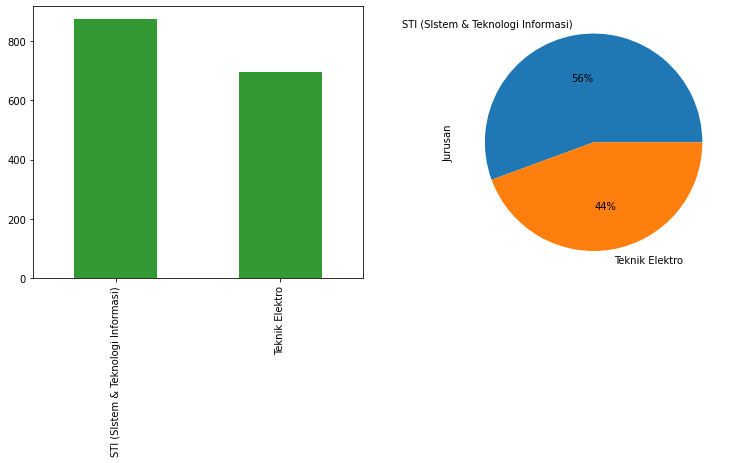

In [328]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
newdata.Jurusan.value_counts().plot(kind='bar',color='g',alpha=0.8,ax=ax[0])
newdata.Jurusan.value_counts(normalize=True).plot(kind='pie',autopct='%2.f%%')

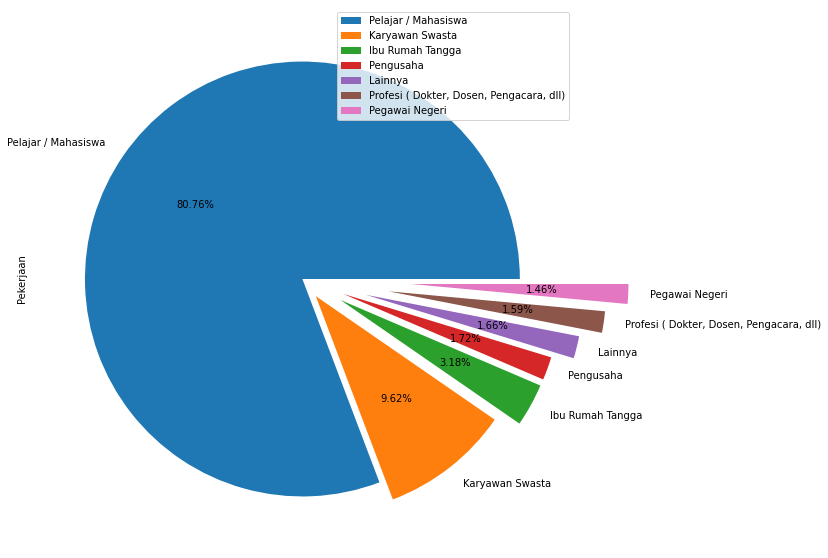

In [329]:
plt.figure(figsize=(10,10))
identitas.Pekerjaan.value_counts(normalize=True).plot(kind='pie',explode=[0,0.1,0.2,0.2,0.3,0.4,0.5],autopct='%1.2f%%')
plt.legend()

In [330]:
identitas.Usia.unique()
abc = identitas.Usia.astype('category').cat.codes
deff = identitas.Pekerjaan.astype('category').cat.codes
fgh = identitas['Penghasilan per Bulan'].astype('category').cat.codes
for i in range(len(deff)):
    print(i,identitas.Pekerjaan[i],deff[i],fgh[i])

0 Karyawan Swasta 1 1
1 Pelajar / Mahasiswa 4 0
2 Pelajar / Mahasiswa 4 0
3 Pelajar / Mahasiswa 4 0
4 Pelajar / Mahasiswa 4 0
5 Pelajar / Mahasiswa 4 0
6 Pelajar / Mahasiswa 4 0
7 Pelajar / Mahasiswa 4 0
8 Pelajar / Mahasiswa 4 0
9 Pelajar / Mahasiswa 4 0
10 Pelajar / Mahasiswa 4 0
11 Pelajar / Mahasiswa 4 0
12 Pelajar / Mahasiswa 4 0
13 Lainnya 2 3
14 Pelajar / Mahasiswa 4 0
15 Pelajar / Mahasiswa 4 0
16 Pelajar / Mahasiswa 4 0
17 Ibu Rumah Tangga 0 0
18 Pelajar / Mahasiswa 4 0
19 Karyawan Swasta 1 2
20 Pelajar / Mahasiswa 4 2
21 Pelajar / Mahasiswa 4 0
22 Lainnya 2 2
23 Pelajar / Mahasiswa 4 0
24 Lainnya 2 0
25 Pelajar / Mahasiswa 4 0
26 Pelajar / Mahasiswa 4 0
27 Pelajar / Mahasiswa 4 0
28 Pelajar / Mahasiswa 4 0
29 Pelajar / Mahasiswa 4 0
30 Pengusaha 5 1
31 Pelajar / Mahasiswa 4 0
32 Pelajar / Mahasiswa 4 0
33 Pelajar / Mahasiswa 4 0
34 Pelajar / Mahasiswa 4 0
35 Pelajar / Mahasiswa 4 0
36 Pelajar / Mahasiswa 4 0
37 Pelajar / Mahasiswa 4 0
38 Pelajar / Mahasiswa 4 0
39 Pelajar / M

476 Pelajar / Mahasiswa 4 0
477 Pelajar / Mahasiswa 4 0
478 Pengusaha 5 2
479 Pelajar / Mahasiswa 4 0
480 Pelajar / Mahasiswa 4 0
481 Pelajar / Mahasiswa 4 0
482 Pegawai Negeri 3 1
483 Pelajar / Mahasiswa 4 0
484 Pelajar / Mahasiswa 4 0
485 Pelajar / Mahasiswa 4 0
486 Pelajar / Mahasiswa 4 3
487 Pelajar / Mahasiswa 4 0
488 Lainnya 2 2
489 Pelajar / Mahasiswa 4 0
490 Pelajar / Mahasiswa 4 0
491 Pelajar / Mahasiswa 4 0
492 Karyawan Swasta 1 2
493 Pelajar / Mahasiswa 4 0
494 Pelajar / Mahasiswa 4 0
495 Lainnya 2 1
496 Pelajar / Mahasiswa 4 2
497 Pelajar / Mahasiswa 4 0
498 Profesi ( Dokter, Dosen, Pengacara, dll) 6 1
499 Pelajar / Mahasiswa 4 0
500 Ibu Rumah Tangga 0 2
501 Karyawan Swasta 1 3
502 Profesi ( Dokter, Dosen, Pengacara, dll) 6 2
503 Pelajar / Mahasiswa 4 0
504 Pelajar / Mahasiswa 4 0
505 Pengusaha 5 2
506 Ibu Rumah Tangga 0 3
507 Ibu Rumah Tangga 0 3
508 Pelajar / Mahasiswa 4 0
509 Pelajar / Mahasiswa 4 0
510 Pelajar / Mahasiswa 4 0
511 Pelajar / Mahasiswa 4 0
512 Pelajar / Ma

926 Pelajar / Mahasiswa 4 0
927 Pelajar / Mahasiswa 4 0
928 Pelajar / Mahasiswa 4 0
929 Pelajar / Mahasiswa 4 0
930 Pelajar / Mahasiswa 4 0
931 Pelajar / Mahasiswa 4 0
932 Pelajar / Mahasiswa 4 0
933 Pelajar / Mahasiswa 4 0
934 Pelajar / Mahasiswa 4 0
935 Pelajar / Mahasiswa 4 0
936 Pelajar / Mahasiswa 4 0
937 Pegawai Negeri 3 2
938 Lainnya 2 2
939 Pelajar / Mahasiswa 4 0
940 Pelajar / Mahasiswa 4 2
941 Pelajar / Mahasiswa 4 0
942 Pelajar / Mahasiswa 4 2
943 Pelajar / Mahasiswa 4 0
944 Pelajar / Mahasiswa 4 0
945 Pelajar / Mahasiswa 4 0
946 Ibu Rumah Tangga 0 1
947 Ibu Rumah Tangga 0 0
948 Pelajar / Mahasiswa 4 0
949 Lainnya 2 3
950 Pelajar / Mahasiswa 4 0
951 Karyawan Swasta 1 3
952 Pelajar / Mahasiswa 4 0
953 Pelajar / Mahasiswa 4 0
954 Pelajar / Mahasiswa 4 0
955 Pelajar / Mahasiswa 4 0
956 Pelajar / Mahasiswa 4 0
957 Karyawan Swasta 1 1
958 Pelajar / Mahasiswa 4 0
959 Pelajar / Mahasiswa 4 0
960 Karyawan Swasta 1 1
961 Pelajar / Mahasiswa 4 0
962 Karyawan Swasta 1 2
963 Pelajar / M

1410 Pelajar / Mahasiswa 4 0
1411 Pelajar / Mahasiswa 4 0
1412 Pelajar / Mahasiswa 4 2
1413 Pelajar / Mahasiswa 4 0
1414 Pelajar / Mahasiswa 4 0
1415 Pelajar / Mahasiswa 4 0
1416 Karyawan Swasta 1 2
1417 Pegawai Negeri 3 3
1418 Pelajar / Mahasiswa 4 1
1419 Pelajar / Mahasiswa 4 0
1420 Pelajar / Mahasiswa 4 0
1421 Pelajar / Mahasiswa 4 0
1422 Pelajar / Mahasiswa 4 0
1423 Pelajar / Mahasiswa 4 0
1424 Karyawan Swasta 1 2
1425 Pegawai Negeri 3 2
1426 Karyawan Swasta 1 3
1427 Karyawan Swasta 1 2
1428 Pelajar / Mahasiswa 4 0
1429 Pengusaha 5 2
1430 Pegawai Negeri 3 3
1431 Pelajar / Mahasiswa 4 0
1432 Karyawan Swasta 1 2
1433 Pelajar / Mahasiswa 4 0
1434 Pelajar / Mahasiswa 4 0
1435 Pelajar / Mahasiswa 4 0
1436 Pelajar / Mahasiswa 4 0
1437 Pelajar / Mahasiswa 4 0
1438 Pelajar / Mahasiswa 4 2
1439 Pelajar / Mahasiswa 4 0
1440 Pelajar / Mahasiswa 4 0
1441 Pelajar / Mahasiswa 4 0
1442 Pelajar / Mahasiswa 4 0
1443 Pelajar / Mahasiswa 4 0
1444 Pelajar / Mahasiswa 4 0
1445 Pelajar / Mahasiswa 4 0
1

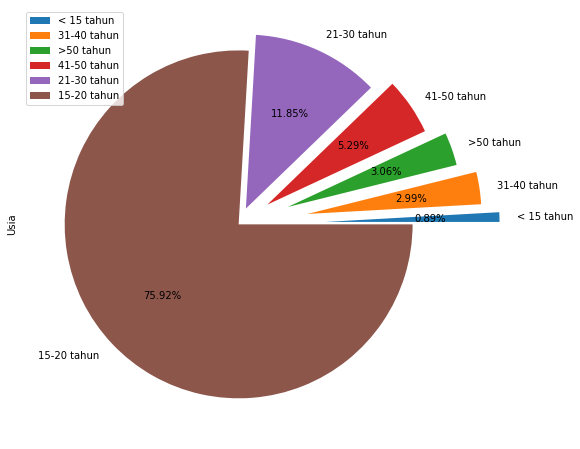

In [331]:
plt.figure(figsize=(12,8))
axx = (identitas.Usia.value_counts(ascending=True,normalize=True)*100).plot(kind='pie',explode=[0.5,0.4,0.3,0.2,0.1,0],autopct='%.2f%%')
plt.legend()

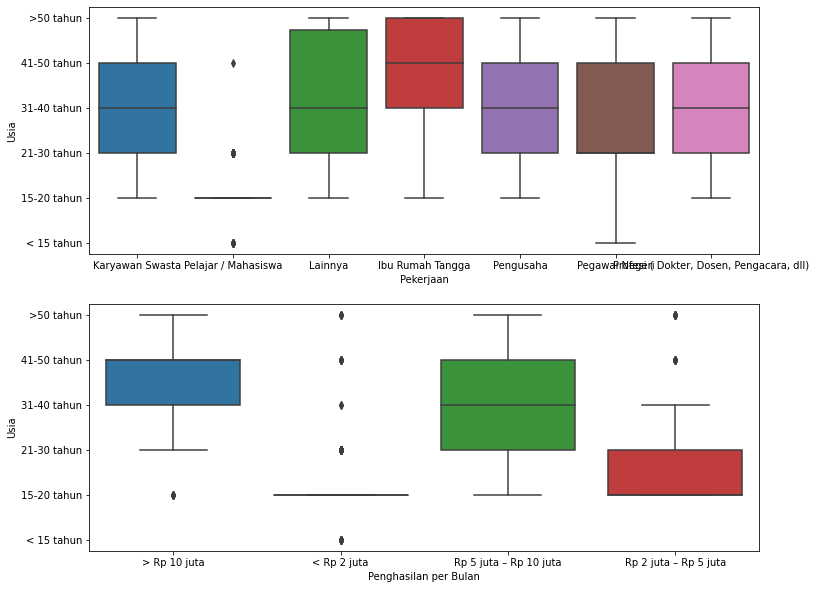

In [346]:
fig,ax = plt.subplots(2,1,figsize=(12,10))
deff = identitas['Usia'].map({
    '< 15 tahun' : 0,
    '15-20 tahun' : 1,
    '21-30 tahun' : 2,
    '31-40 tahun' : 3,
    '41-50 tahun' : 4,
    '>50 tahun' : 5
})

sns.boxplot(x=identitas['Pekerjaan'],y=deff,ax=ax[0])
ax[0].set_ylabel('Usia')
ax[0].set(yticks=np.arange(6),yticklabels=['< 15 tahun','15-20 tahun','21-30 tahun','31-40 tahun','41-50 tahun','>50 tahun'])

sns.boxplot(x=identitas['Penghasilan per Bulan'],y=deff,ax=ax[1])
ax[1].set_ylabel('Usia')
ax[1].set(yticks=np.arange(6),yticklabels=['< 15 tahun','15-20 tahun','21-30 tahun','31-40 tahun','41-50 tahun','>50 tahun'])

plt.show()

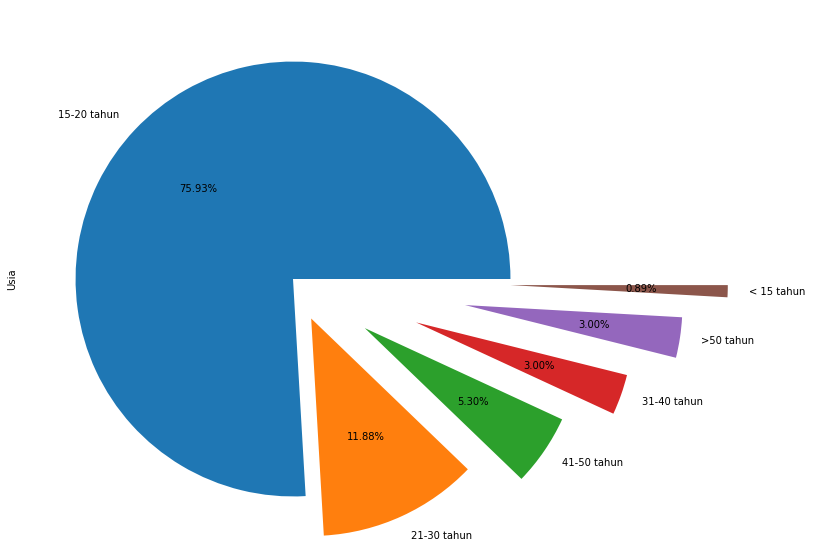

In [617]:
plt.figure(figsize=(10,10))
identitas.Usia.value_counts(normalize=True).plot(kind='pie',explode=[0,0.2,0.4,0.6,0.8,1],autopct='%.2f%%')

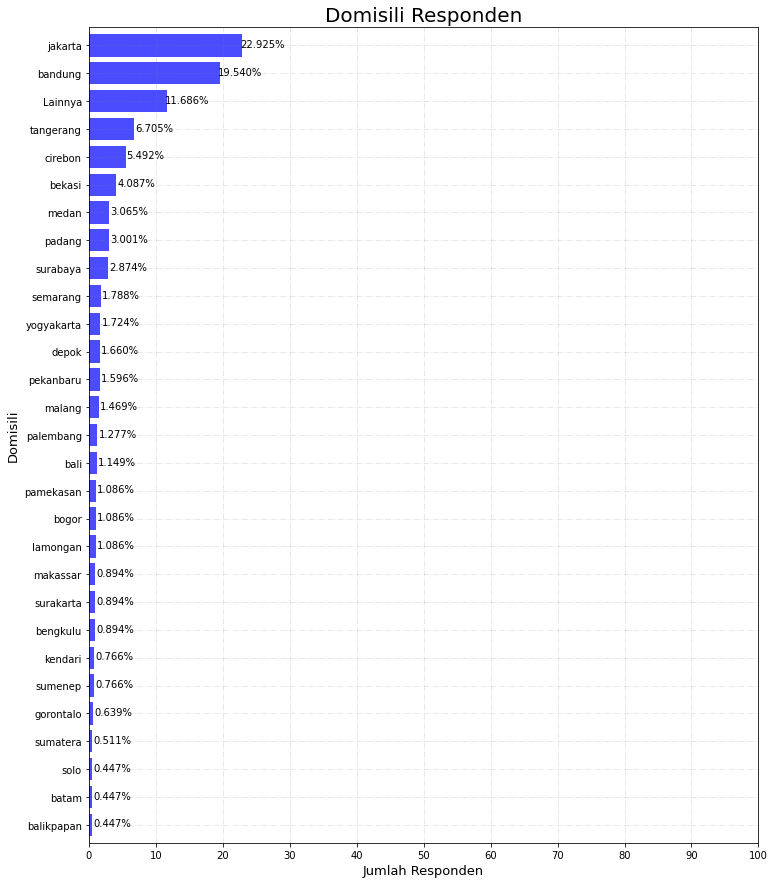

In [273]:
fig,ax = plt.subplots(figsize=(12,15))
bwidth = 0.8
axx = (identitas.Domisili.value_counts(ascending=True,normalize=True)*100).plot(kind='barh',width=bwidth,color='b',alpha=0.7)
plt.title('Domisili Responden',fontsize=20)
plt.xlabel('Jumlah Responden',fontsize=13)
plt.ylabel('Domisili',fontsize=13)
axx.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.3f}%'.format(width),
             ha='center', va='center')

(1570, 10)


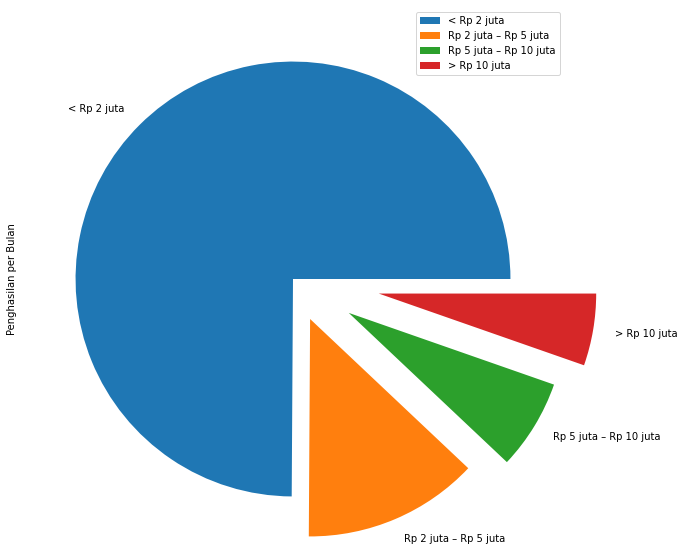

In [326]:
plt.figure(figsize=(10,10))
identitas['Penghasilan per Bulan'].value_counts(normalize=True).plot(kind='pie',explode=[0,0.2,0.3,0.4])
print(identitas.shape)
plt.legend()
plt.show()

## Visualisasi Halaman 2

#### Apakah aktivitas online meningkat?

In [402]:
hal2.columns

Index(['Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?',
       'Rata-rata durasi menggunakan internet Aktif tiap hari ?',
       'Akses atau provider internet yang digunakan selama ini?',
       'Nama Provider', 'Pengeluaran Mobile Data', 'Pengeluaran Broadband',
       'Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?',
       'Frekuensi berbelanja Online', 'Frekuensi Streaming video/ film',
       'Frekuensi Melakukan video conference', 'Frekuensi Delivery Makanan',
       'Frekuensi Mengikuti kelas olahraga secara online',
       'Frekuensi Mengikuti kelas online', 'Frekuensi Akses media sosial',
       'Frekuensi Game online', 'Frekuensi Menonton e-sport',
       'Frekuensi Membeli obat-obatan secara online',
       'FrekuensiMelakukan konsultasi kesehatan secara online',
       'Bekerja / belajar', 'Meeting', 'Mengikuti workshop/ seminar',
       'Menonton film', 'Menonton konser', 'Family/ social gathering',
       'Konsultasi ma

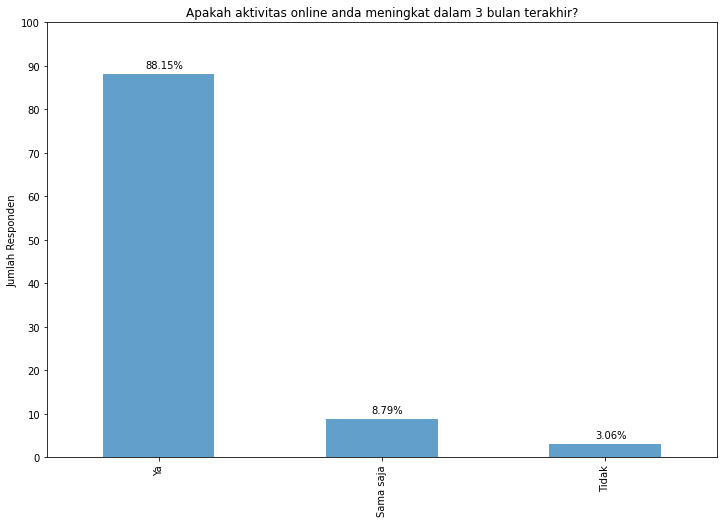

In [391]:
plt.figure(figsize=(12,8))
axy = (hal2[hal2.columns[0]].value_counts(normalize=True)*100).plot(kind='bar',alpha=0.7)
plt.title(str(hal2.columns[0]))
plt.ylabel('Jumlah Responden')
plt.yticks(np.arange(0,110,10))

for p in axy.patches:
    width = p.get_height()
    plt.text( p.get_x()+0.55*p.get_width(),2+p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [392]:
for i in range(hal2.shape[1]):
    print(i,hal2.columns[i])

0 Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?
1 Rata-rata durasi menggunakan internet Aktif tiap hari ?
2 Akses atau provider internet yang digunakan selama ini?
3 Nama Provider
4 Pengeluaran Mobile Data
5 Pengeluaran Broadband
6 Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?
7 Frekuensi berbelanja Online
8 Frekuensi Streaming video/ film
9 Frekuensi Melakukan video conference
10 Frekuensi Delivery Makanan
11 Frekuensi Mengikuti kelas olahraga secara online
12 Frekuensi Mengikuti kelas online
13 Frekuensi Akses media sosial
14 Frekuensi Game online
15 Frekuensi Menonton e-sport
16 Frekuensi Membeli obat-obatan secara online
17 FrekuensiMelakukan konsultasi kesehatan secara online
18 Bekerja / belajar
19 Meeting
20 Mengikuti workshop/ seminar
21 Menonton film
22 Menonton konser
23 Family/ social gathering
24 Konsultasi masalah kesehatan
25 Media komunikasi yang paling sering digunakan untuk Work From Home/ School From Home ?
26 Apli

#### Distribusi peningkatan aktivitas berdasarkan jenis pekerjaan

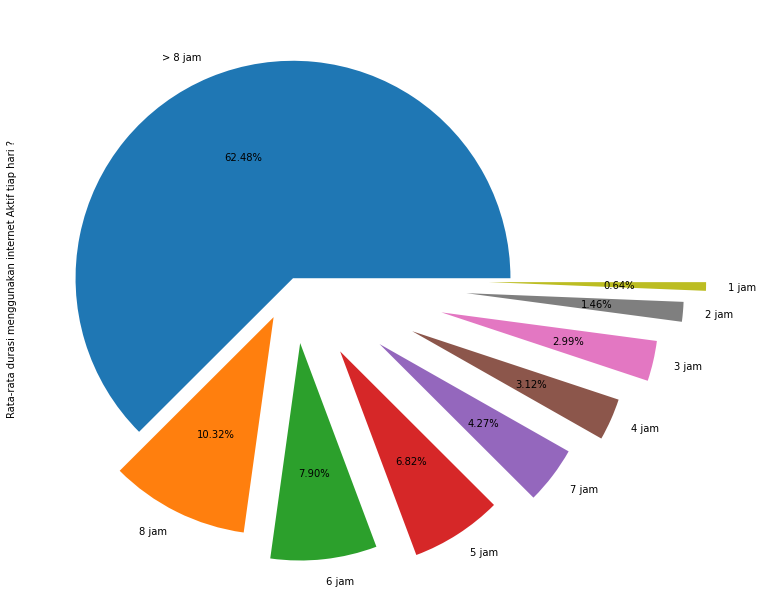

In [407]:
plt.figure(figsize=(10,10))
hal2[hal2.columns[1]].value_counts().plot(kind='pie',explode=[0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],autopct='%.2f%%')

Text(0.5, 1.0, 'Distribusi Frekuensi Penggunaan Internet')

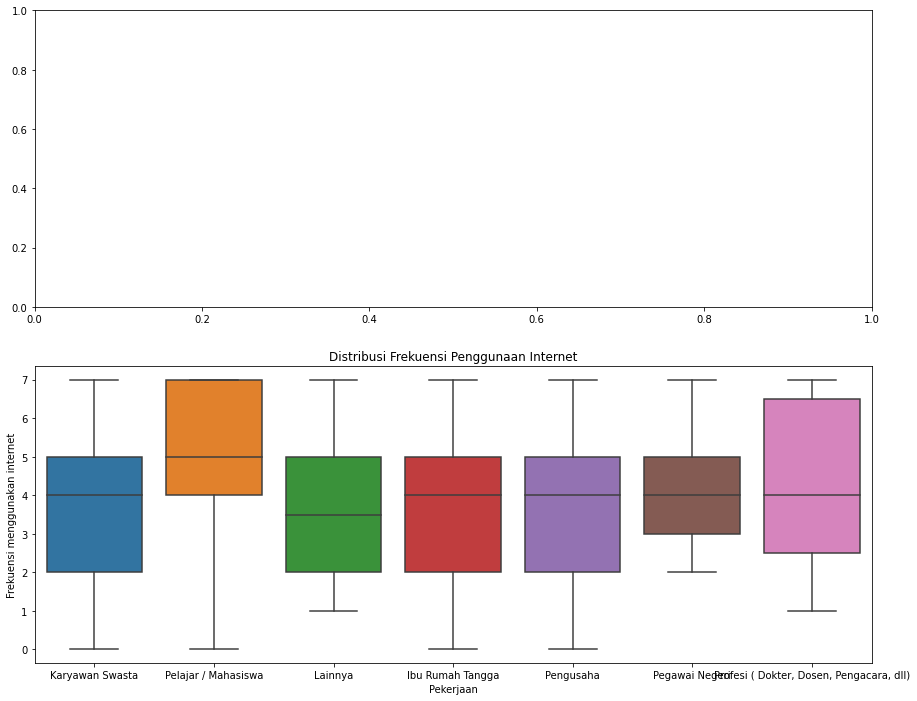

In [410]:
fig,ax = plt.subplots(2,1,figsize=(15,12))
acc = hal2[hal2.columns[1]].map({
    '1 jam' : 0,
    '2 jam' : 1,
    '3 jam' : 2,
    '4 jam' : 3,
    '5 jam' : 4,
    '6 jam' : 5,
    '7 jam' : 6,
    '8 jam' : 7,
    '>8 jam' : 8
})
sns.boxplot(identitas.Pekerjaan,y=acc)
plt.ylabel('Frekuensi menggunakan internet')
plt.xlabel('Pekerjaan')
plt.title('Distribusi Frekuensi Penggunaan Internet')

In [239]:
pd.DataFrame([hal2[hal2.columns[1]].unique(),acc.unique()])

0      1      2      3      4      5      6      7      8
0  > 8 jam  7 jam  8 jam  6 jam  4 jam  3 jam  5 jam  2 jam  1 jam
1        8      6      7      5      3      2      4      1      0

In [395]:
acc = hal2[hal2.columns[3]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print(abc)

acc = hal2[hal2.columns[3]].loc[hal2[hal2.columns[2]]=='Menggunakan Mobile Data']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc2 =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc2]
counts = sorted(count)
print(abc2)

acc = hal2[hal2.columns[3]].loc[hal2[hal2.columns[2]]=='Menggunakan Broadband']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc3 =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc3]
counts = sorted(count)
print(abc3)

['Lainnya', 'telkomsel', 'indosat', 'by.u', 'MNC', 'smartfren', 'oxygen', 'firstmedia', 'tri', 'cbn', 'myrepublic', 'indihome', 'biznet', 'axis', 'xl']
['Lainnya', 'telkomsel', 'indosat', 'by.u', 'smartfren', 'tri', 'firstmedia', 'myrepublic', 'indihome', 'axis', 'xl']
['Lainnya', 'telkomsel', 'indosat', 'MNC', 'smartfren', 'oxygen', 'firstmedia', 'cbn', 'xl', 'biznet', 'indihome', 'myrepublic']


Total pengguna Broadband :  1568


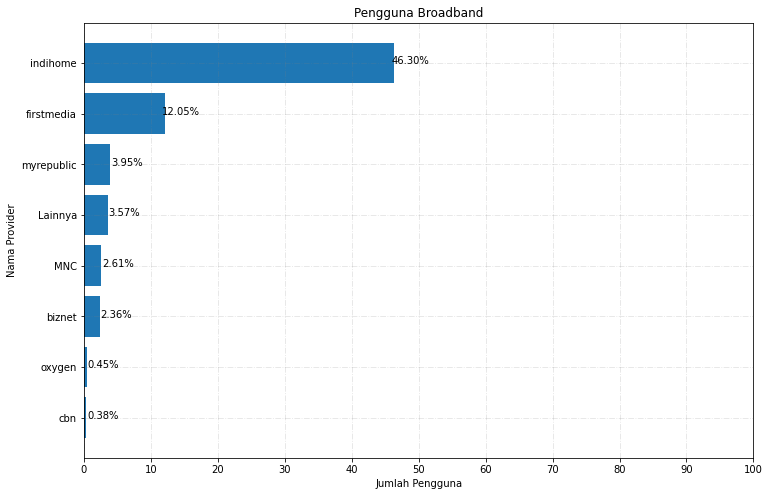

In [397]:
acc = hal2[hal2.columns[3]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc = ['MNC', 'oxygen', 'Lainnya', 'indihome', 'firstmedia', 'myrepublic', 'cbn', 'biznet']
count = [len([1 for i in acc if (re.search(x,i))]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,8))
axx = plt.barh(array,counts)
plt.title('Pengguna Broadband')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Provider')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
print('Total pengguna Broadband : ',acc.shape[0])

Total Pengguna provider sekaligus mobile data :  1568


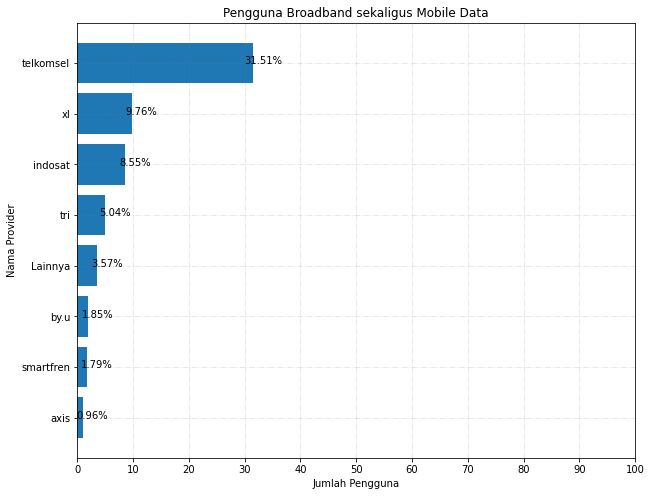

In [401]:
acc = hal2[hal2.columns[3]]
acc = acc.dropna()
acc = acc.fillna('Lainnya')
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  ['tri', 'by.u', 'Lainnya', 'axis', 'telkomsel','xl', 'smartfren', 'indosat']
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

fig,ax = plt.subplots(figsize=(10,8))
axx = plt.barh(array,counts)
plt.title('Pengguna Broadband sekaligus Mobile Data')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Provider')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(1.8+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
    
print('Total Pengguna provider sekaligus mobile data : ',acc.shape[0])

Total pengguna provider tertentu :  1568
131.13


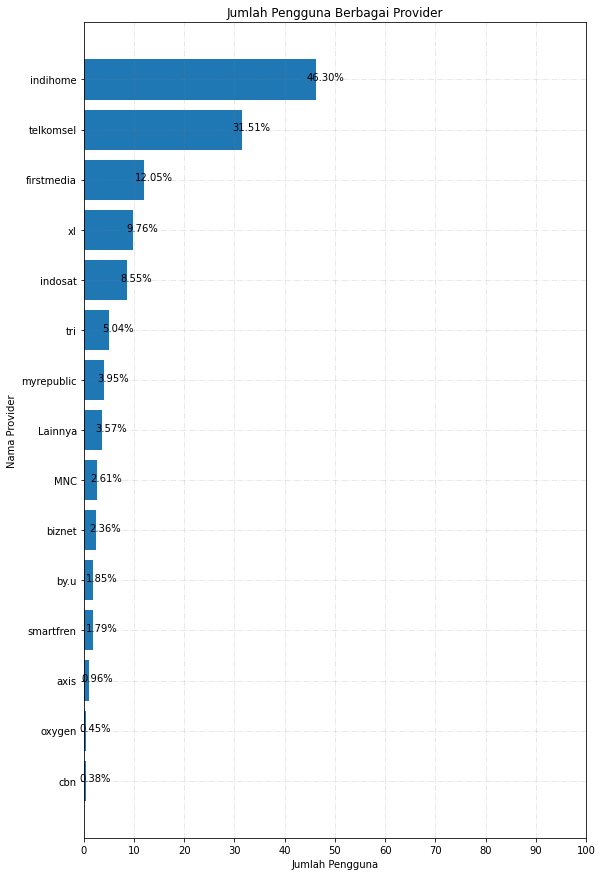

In [399]:
acc = hal2[hal2.columns[3]]
acc = acc.dropna()
acc = acc.fillna('Lainnya')
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

fig,ax = plt.subplots(figsize=(9,15))
axx = plt.barh(array,counts)
plt.title('Jumlah Pengguna Berbagai Provider')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Provider')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(1.8+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
    
print('Total pengguna provider tertentu : ',acc.shape[0])
print(sum(counts))

[[<matplotlib.axis.YTick at 0x25ee7edae48>,
 [Text(0, 0, 'Tidak Menggunakan Broadband'),
  Text(0, 0, '< Rp 100 ribu'),
  Text(0, 0, 'Rp 100 ribu - Rp 200 Ribu'),
  Text(0, 0, 'Rp 201 ribu - Rp 300 Ribu'),
  Text(0, 0, 'Rp 301 ribu - Rp 400 Ribu'),
  Text(0, 0, 'Rp 401 Ribu - Rp 500 Ribu'),
  Text(0, 0, '> Rp 500 Ribu')]]

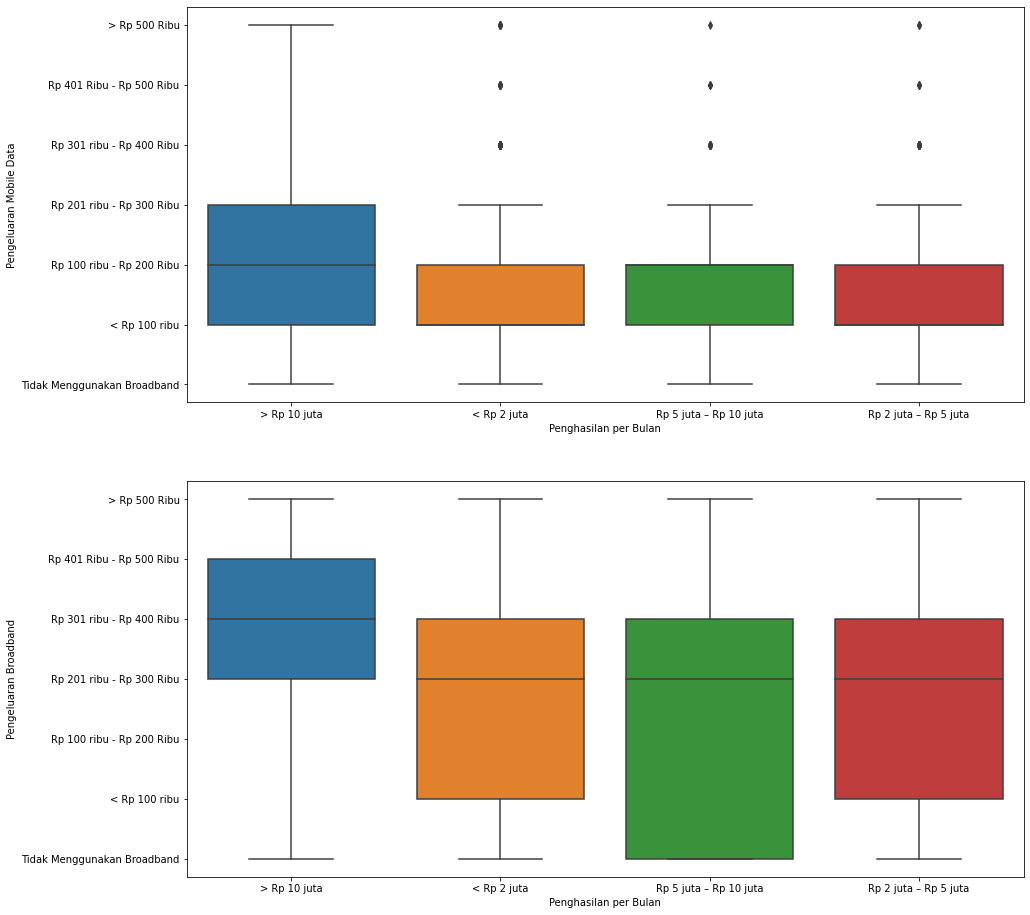

In [423]:
hal2[hal2.columns[5]] = hal2[hal2.columns[5]].fillna('Tidak Menggunakan Broadband')
array = hal2[hal2.columns[4]].map({
    'Tidak Menggunakan Mobile Data' : 0,
    'Mobile data - < Rp 100 ribu' : 1,
       'Mobile data - Rp 100 ribu - Rp 200 Ribu' : 2,
       'Mobile data - Rp 301 ribu - Rp 400 Ribu' : 3,
       'Mobile data - Rp 201 ribu - Rp 300 Ribu' : 4,
       'Mobile data - Rp 401 Ribu - Rp 500 Ribu' : 5,
        'Mobile data - > Rp 500 Ribu' : 6
})

result2 = hal2[hal2.columns[5]].map({
    'Tidak Menggunakan Broadband' : 0,
    'Broadband/ Paket wifi - Rp 401 Ribu - Rp 500 Ribu' : 5,
       'Broadband/ Paket wifi - Rp 201 ribu - Rp 300 Ribu' : 3,
       'Broadband/ Paket wifi - Rp 100 ribu - Rp 200 Ribu' : 2,
       'Broadband/ Paket wifi - Rp 301 ribu - Rp 400 Ribu' : 4,
       'Broadband/ Paket wifi - < Rp 100 ribu' : 1,
       'Broadband/ Paket wifi - > Rp 500 Ribu' : 6
})
axx = ['Tidak Menggunakan Broadband',
       '< Rp 100 ribu',
       'Rp 100 ribu - Rp 200 Ribu',
       'Rp 201 ribu - Rp 300 Ribu',
       'Rp 301 ribu - Rp 400 Ribu',
       'Rp 401 Ribu - Rp 500 Ribu',
       '> Rp 500 Ribu']

fig,ax=plt.subplots(2,1,figsize=(15,16))
sns.boxplot(x=identitas['Penghasilan per Bulan'],y=array,ax=ax[0])
sns.boxplot(x=identitas['Penghasilan per Bulan'],y=result2,ax=ax[1])

ax[0].set(yticks=np.arange(7),yticklabels=axx)
ax[1].set(yticks=np.arange(7),yticklabels=axx)

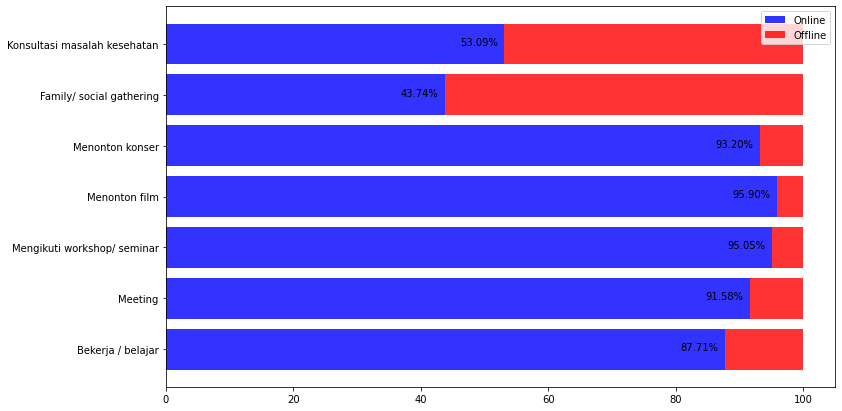

In [596]:
abc = hal2.iloc[:,np.arange(18,25)].replace('',np.nan)
abc = abc.dropna()
onlen = [round(len([1 for i in abc[x] if i=='Online/ Virtual'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='Offline (dengan protokol COVID-19)'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

fig,ax = plt.subplots(figsize=(12,7))
bwidth = 0.3
ticks = np.arange(len(onlen))
ticks1 = [0.4 + s for s in ticks]

axx = ax.barh(ticks,onlen,color='b',alpha=0.8,label='Online')
ax.barh(ticks,offline,left=onlen,color='r',alpha=0.8,label='Offline')

for p in axx.patches:
    width = p.get_width()
    plt.text(-4+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

plt.yticks(ticks,list(abc.columns))
plt.legend()
plt.show()


In [439]:
print('jumlah baris valid di Online/Offline : ', abc.shape[0])

jumlah baris valid di Online/Offline :  1298


In [425]:
hal2[hal2.columns[6]].unique()
tester = hal2.iloc[:,np.arange(7,18)]
tester.head()
tester[tester.columns[0]].unique()

array(['Beberapa kali dalam sebulan', '2-3 kali seminggu',
       'Beberapa bulan sekali', 'Beberapa kali dalam sehari/ setiap hari',
       'setiap bulan', '4-6 kali seminggu', 'Tidak pernah',
       'sekali seminggu'], dtype=object)

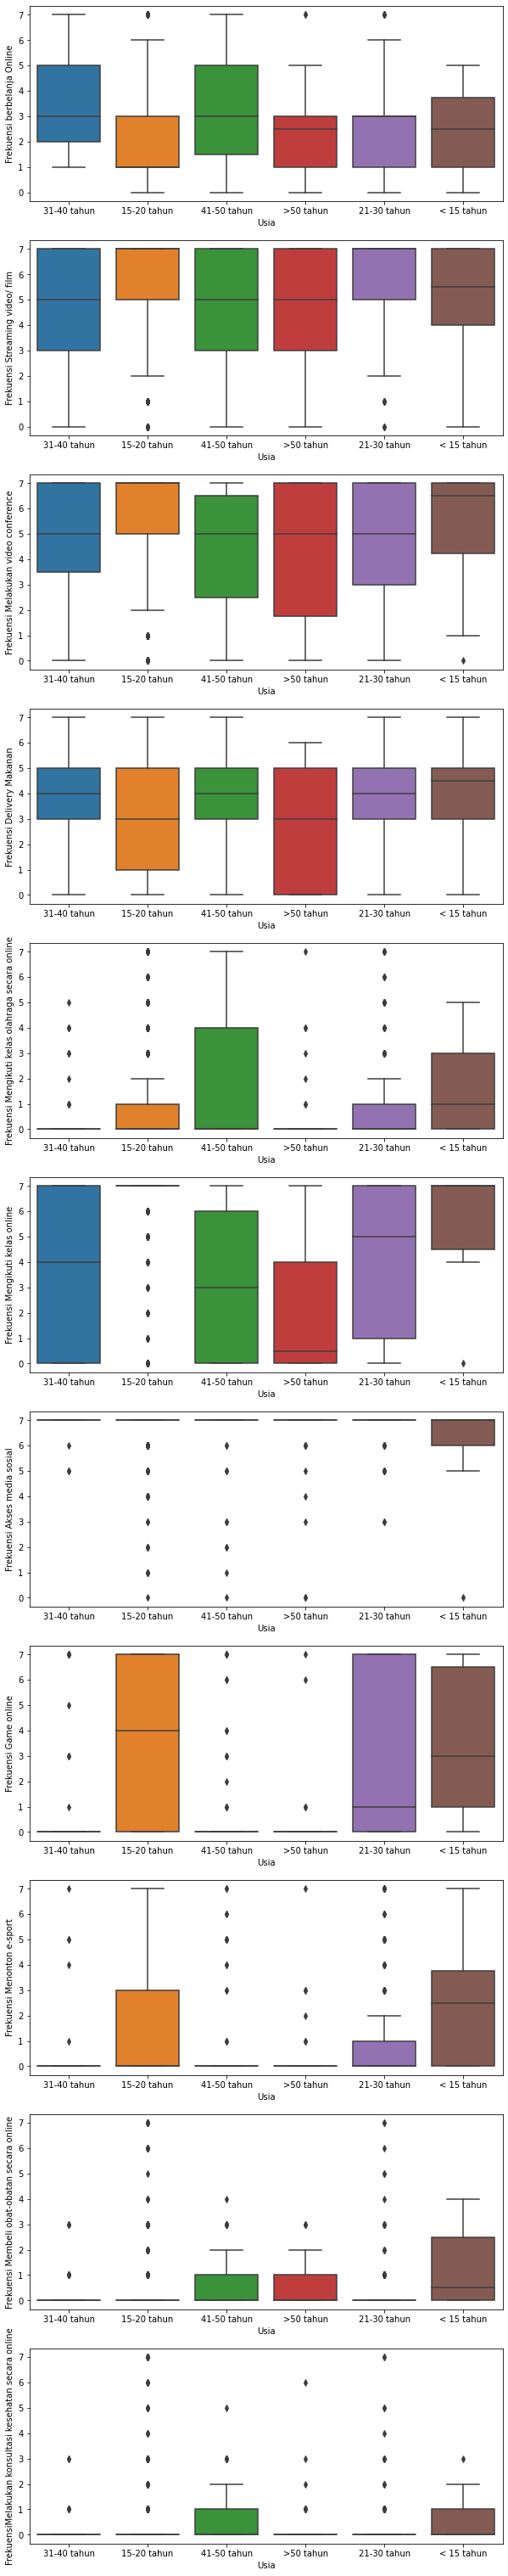

In [426]:
fig,ax = plt.subplots(tester.shape[1],1,figsize=(10,55))
for i in range(tester.shape[1]):
    res = tester[tester.columns[i]].map({
        'Beberapa kali dalam sebulan' :3, 
         '2-3 kali seminggu' : 5,
         'Beberapa bulan sekali' : 1, 
         'Beberapa kali dalam sehari/ setiap hari' : 7,
         'setiap bulan' : 2, 
         '4-6 kali seminggu' : 6, 
         'Tidak pernah' : 0,
         'sekali seminggu' : 4
    })
    
    sns.boxplot(identitas['Penghasilan per Bulan'],y=res,ax=ax[i])

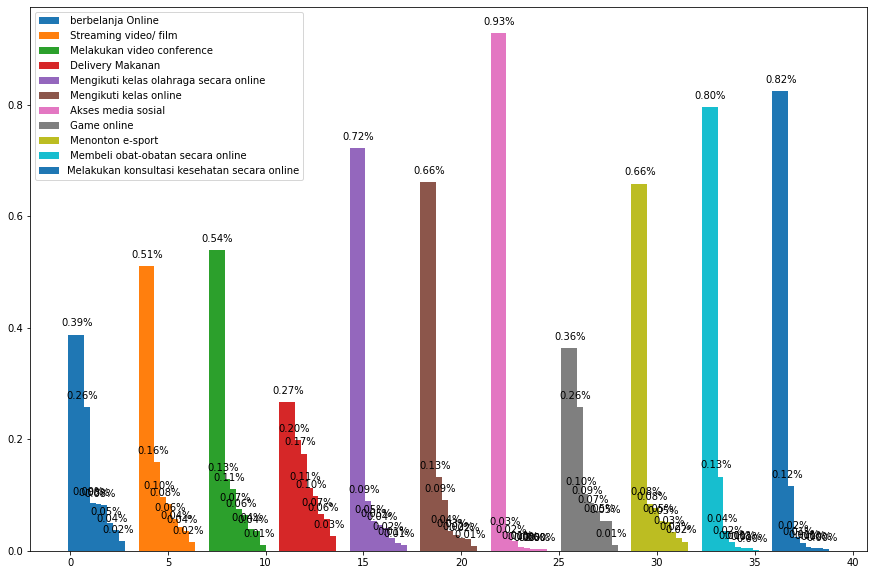

In [469]:
fig,ax = plt.subplots(figsize=(15,10))
bwidth= 0.3

for i in range(tester.shape[1]):
    a = [0.3 for j in range(len(tester[tester.columns[i]].unique()))]
    a = [0.3+n*bwidth for n in range(len(tester[tester.columns[i]].unique()))]
    a = [x+(1.5*i*bwidth*len(a)) for x in a]
    axx = ax.bar(a,tester[tester.columns[i]].value_counts(normalize=True),label=re.sub('(Frekuensi)','',tester.columns[i]))
    
    for p in axx.patches:
        width = p.get_height()
        plt.text(p.get_x()+0.55*p.get_width(),0.02+p.get_height(), 
             '{:1.2f}%'.format(width),
             ha='center', va='center')
    
plt.legend()
plt.show()

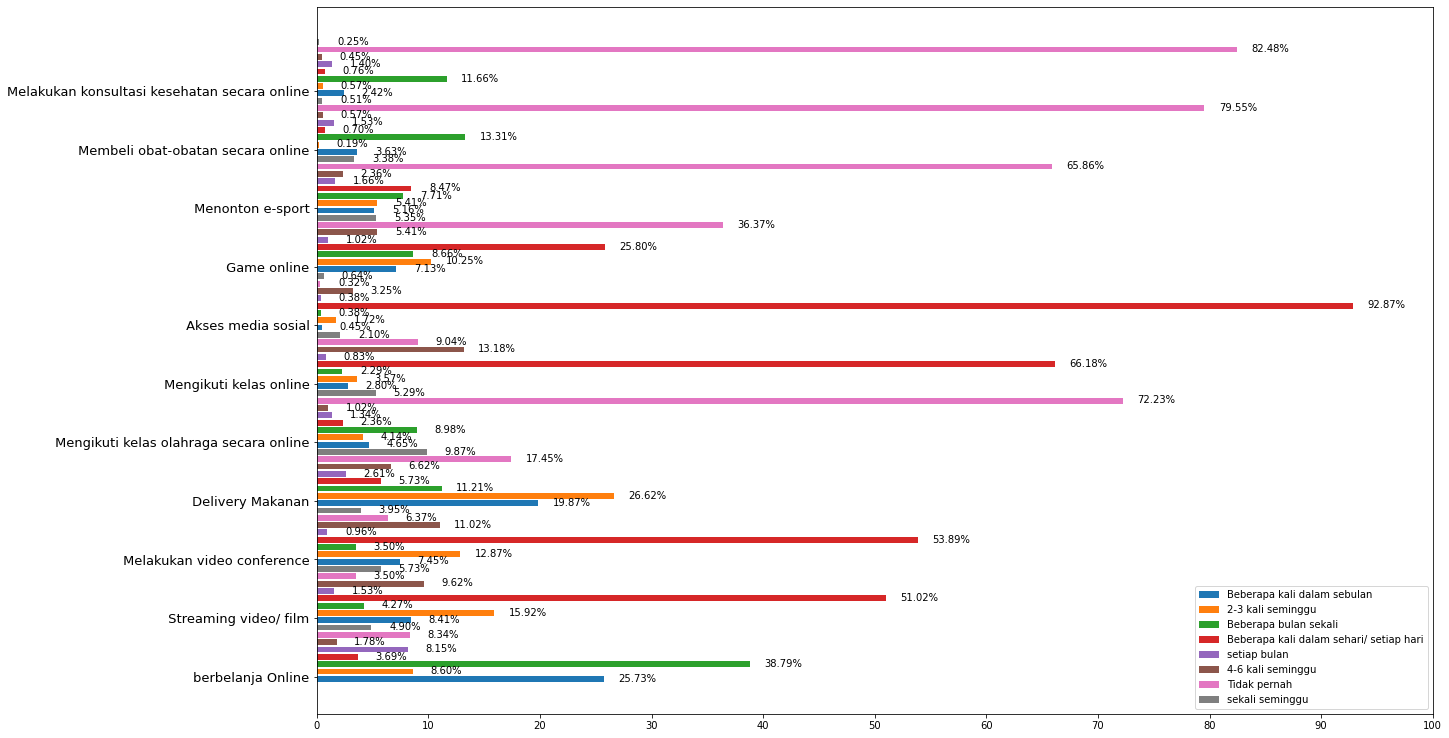

In [581]:
fig,ax = plt.subplots(figsize=(20,13))
bwidth= 2
xx = list(tester[tester.columns[0]].unique())
a = np.arange(0,len(tester.columns),1)
a2 = [x+bwidth for x in a]
a3 = [x+bwidthfor x in a]
a4 = [x+bwidth for x in a]
a5 = [x+bwidthfor x in a3]
a6 = [x+bwidth for x in a]
a7 = [x+bwidthfor x in a3]
a8 = [x+bwidth for x in a]
a9 = [x+bwidthfor x in a3]
a10 = [x+bwidth for x in a]
a11 = [x+bwidthfor x in a3]

for i in range(len(xx)):
    a = [x+(bwidth*i) for x in a]
    axx = ax.barh(a,[round(len([1 for n in tester[j] if re.search(xx[i],n)])*100/tester.shape[0],2) for j in tester.columns],label=xx[i])
    ax.set_xticks(np.arange(0,110,10))
    for p in axx.patches:
        width = p.get_width()
        plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
ax.set(xticks = [r+bwidth for r in a])
ax.set_xticklabels([re.sub('Frekuensi','',x) for x in tester.columns],fontsize=13)
plt.legend()
plt.show()

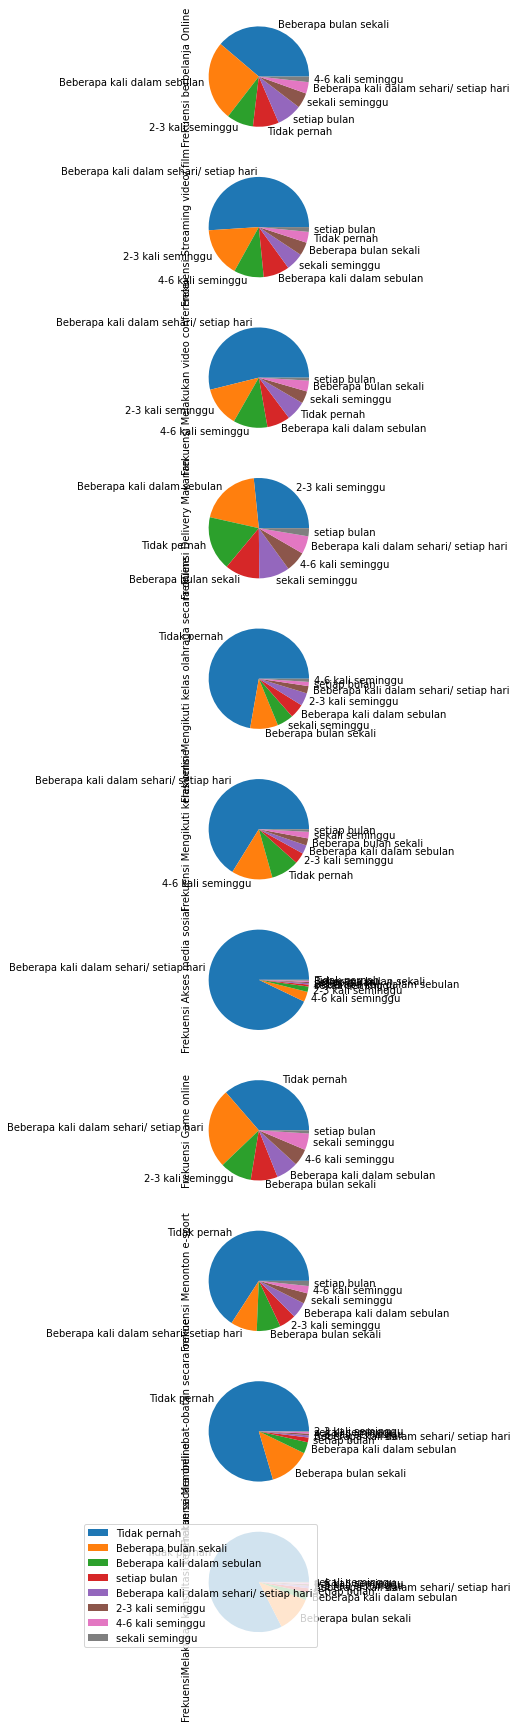

In [587]:
fig,ax = plt.subplots(tester.shape[1],1,figsize=(15,30))
bwidth= 0.3
ticks = np.arange(0.3,2.4,8)
for i in range(tester.shape[1]):
    axx = tester[tester.columns[i]].value_counts(normalize=True).plot(kind='pie',ax=ax[i])
    
plt.legend()
plt.show()

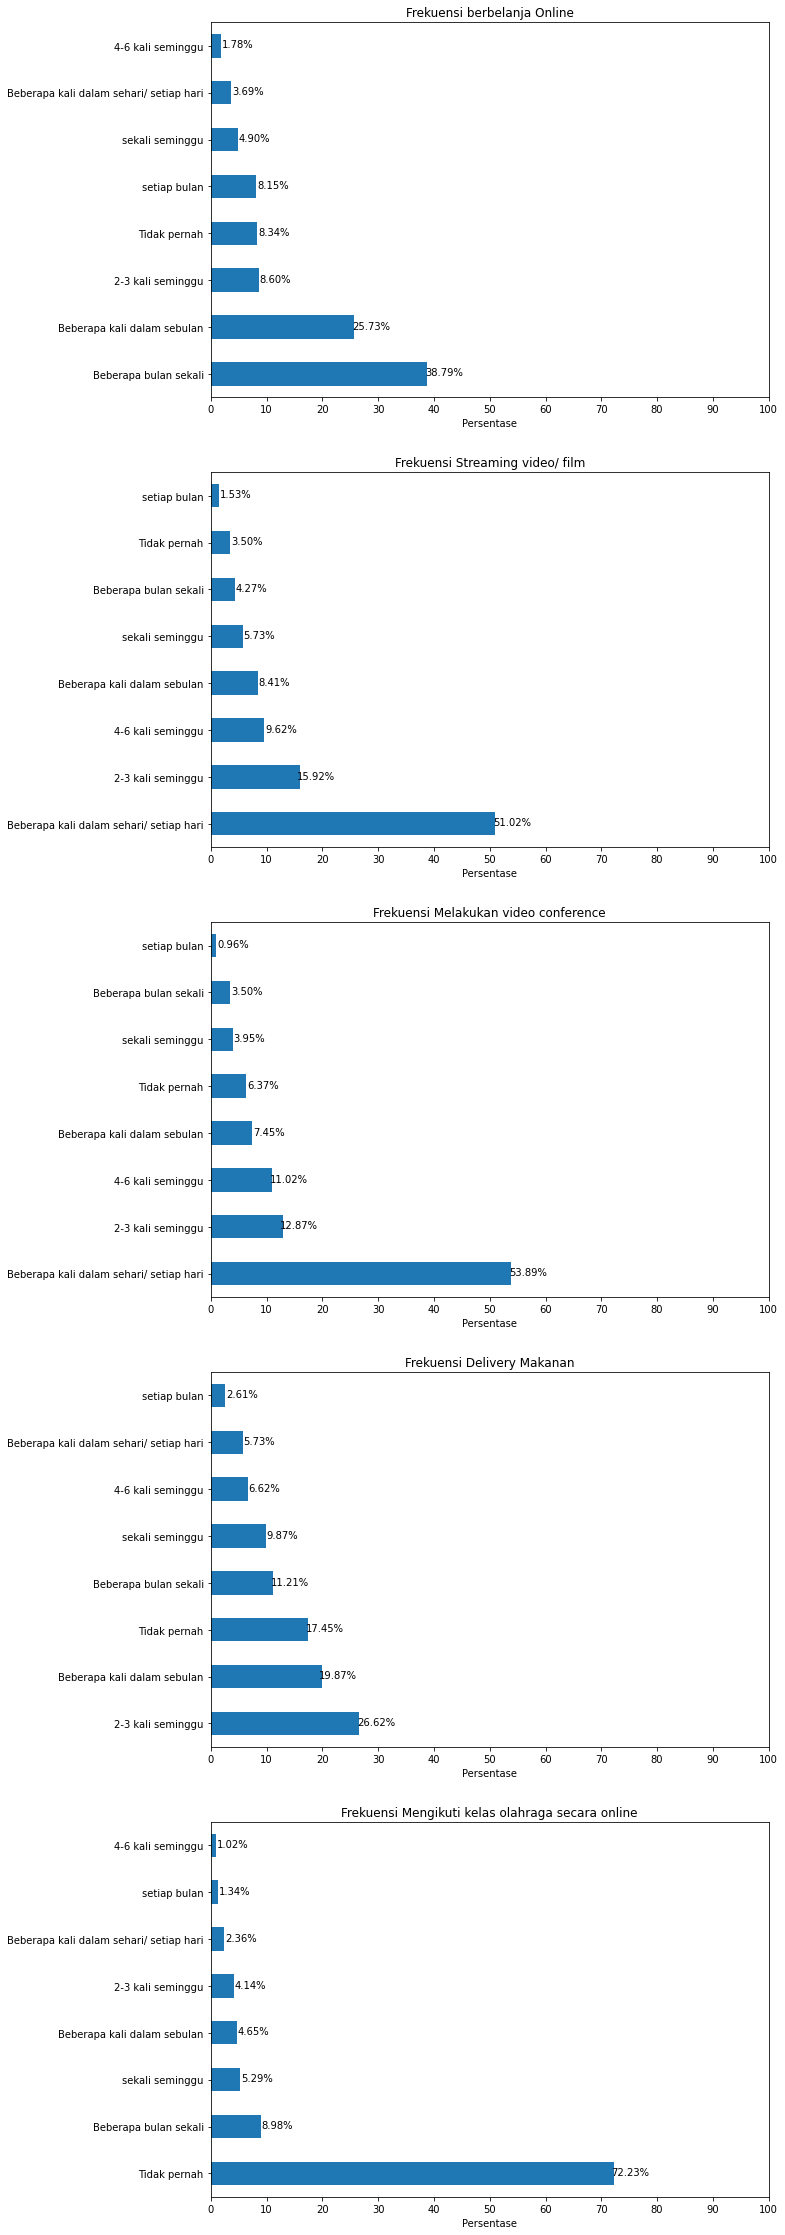

In [612]:
fig,ax = plt.subplots(5,1,figsize=(10,40))
for i in range(int((tester.shape[1]-1)/2)):
    axx = round(tester[tester.columns[i]].value_counts(normalize=True)*100,2).plot(kind='barh',ax=ax[i])
    
    for p in axx.patches:
        width = p.get_width()
        ax[i].text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
    axx.set_xticks(np.arange(0,110,10))
    axx.set_title(re.sub('(Frekuensi |Frekuensi)','Frekuensi ',tester.columns[i]))
    ax[i].set_xlabel('Persentase')

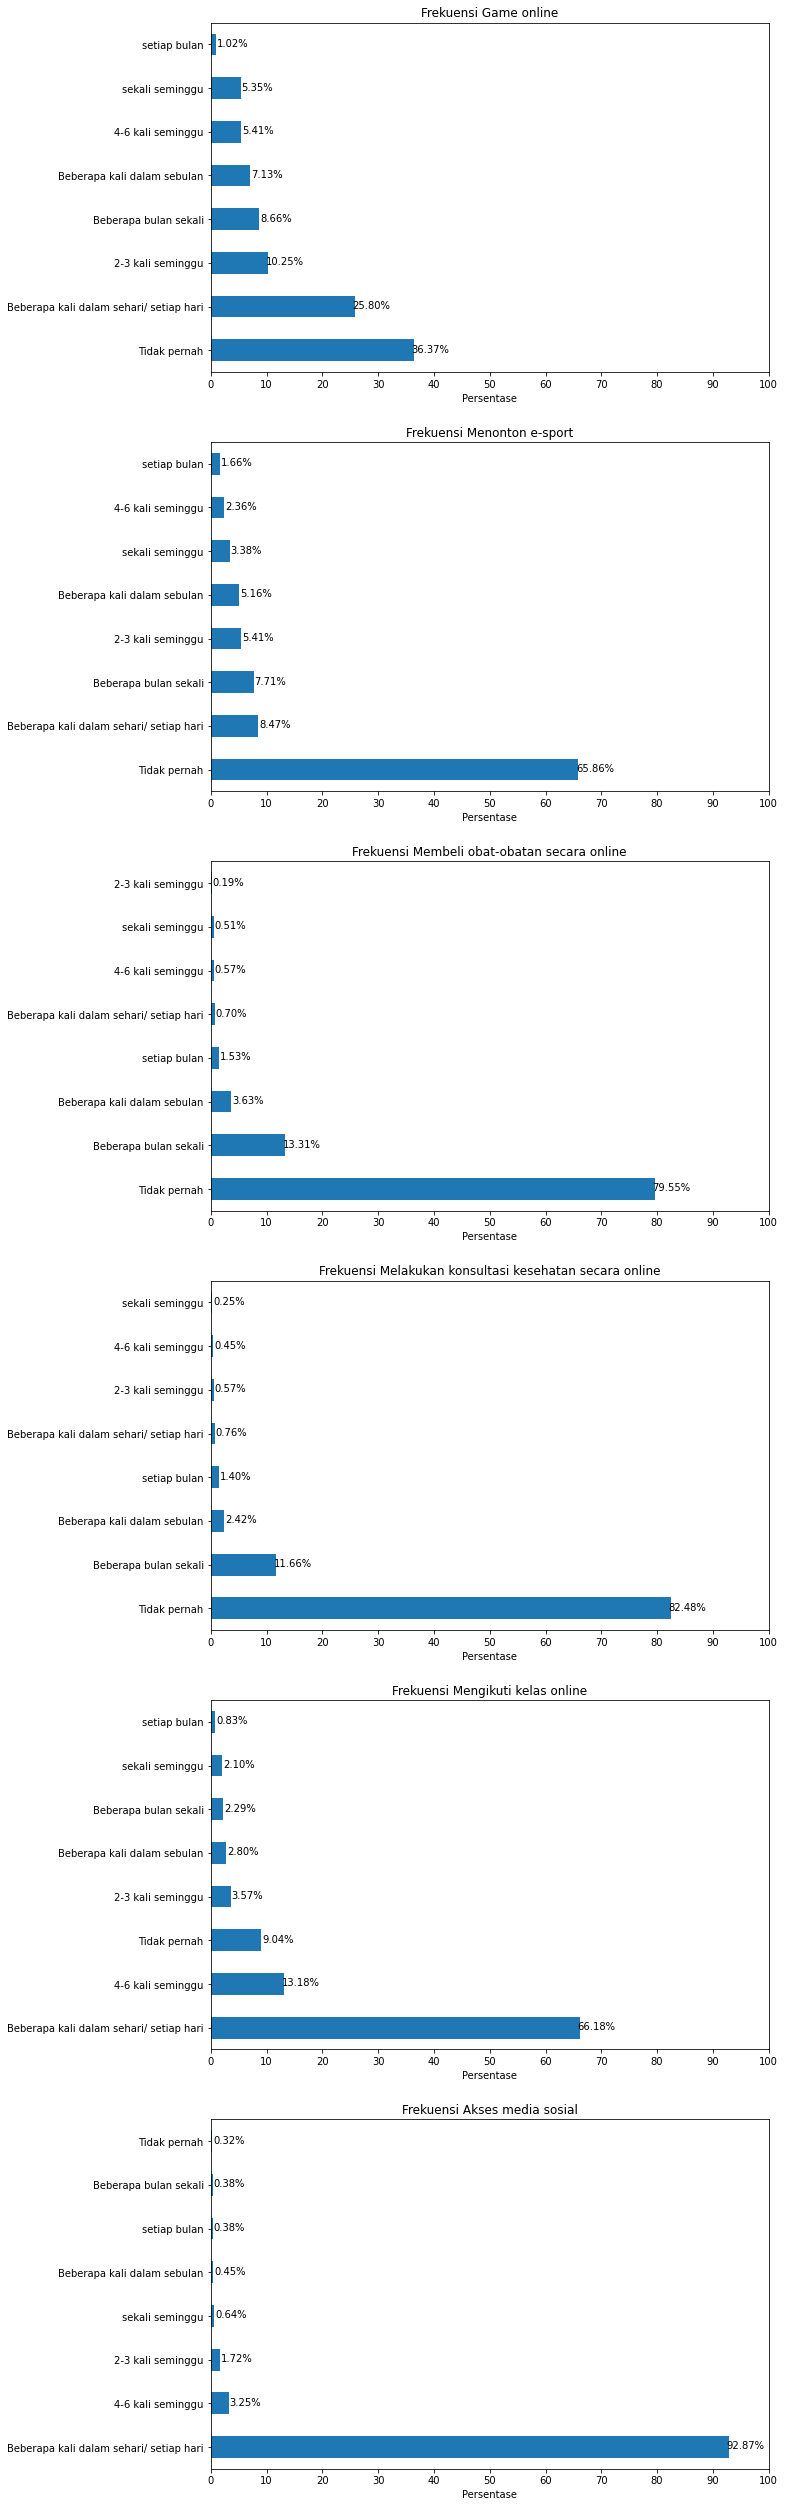

In [613]:
fig,ax = plt.subplots(6,1,figsize=(10,45))
for i in range(int((tester.shape[1]-1)/2),len(tester.columns)):
    axx = round(tester[tester.columns[i]].value_counts(normalize=True)*100,2).plot(kind='barh',ax=ax[i-7])
    
    for p in axx.patches:
        width = p.get_width()
        ax[i-7].text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
    axx.set_xticks(np.arange(0,110,10))
    axx.set_title(re.sub('(Frekuensi |Frekuensi)','Frekuensi ',tester.columns[i]))
    ax[i-7].set_xlabel('Persentase')

In [470]:
tester[tester.columns[0]].unique()

array(['Beberapa kali dalam sebulan', '2-3 kali seminggu',
       'Beberapa bulan sekali', 'Beberapa kali dalam sehari/ setiap hari',
       'setiap bulan', '4-6 kali seminggu', 'Tidak pernah',
       'sekali seminggu'], dtype=object)

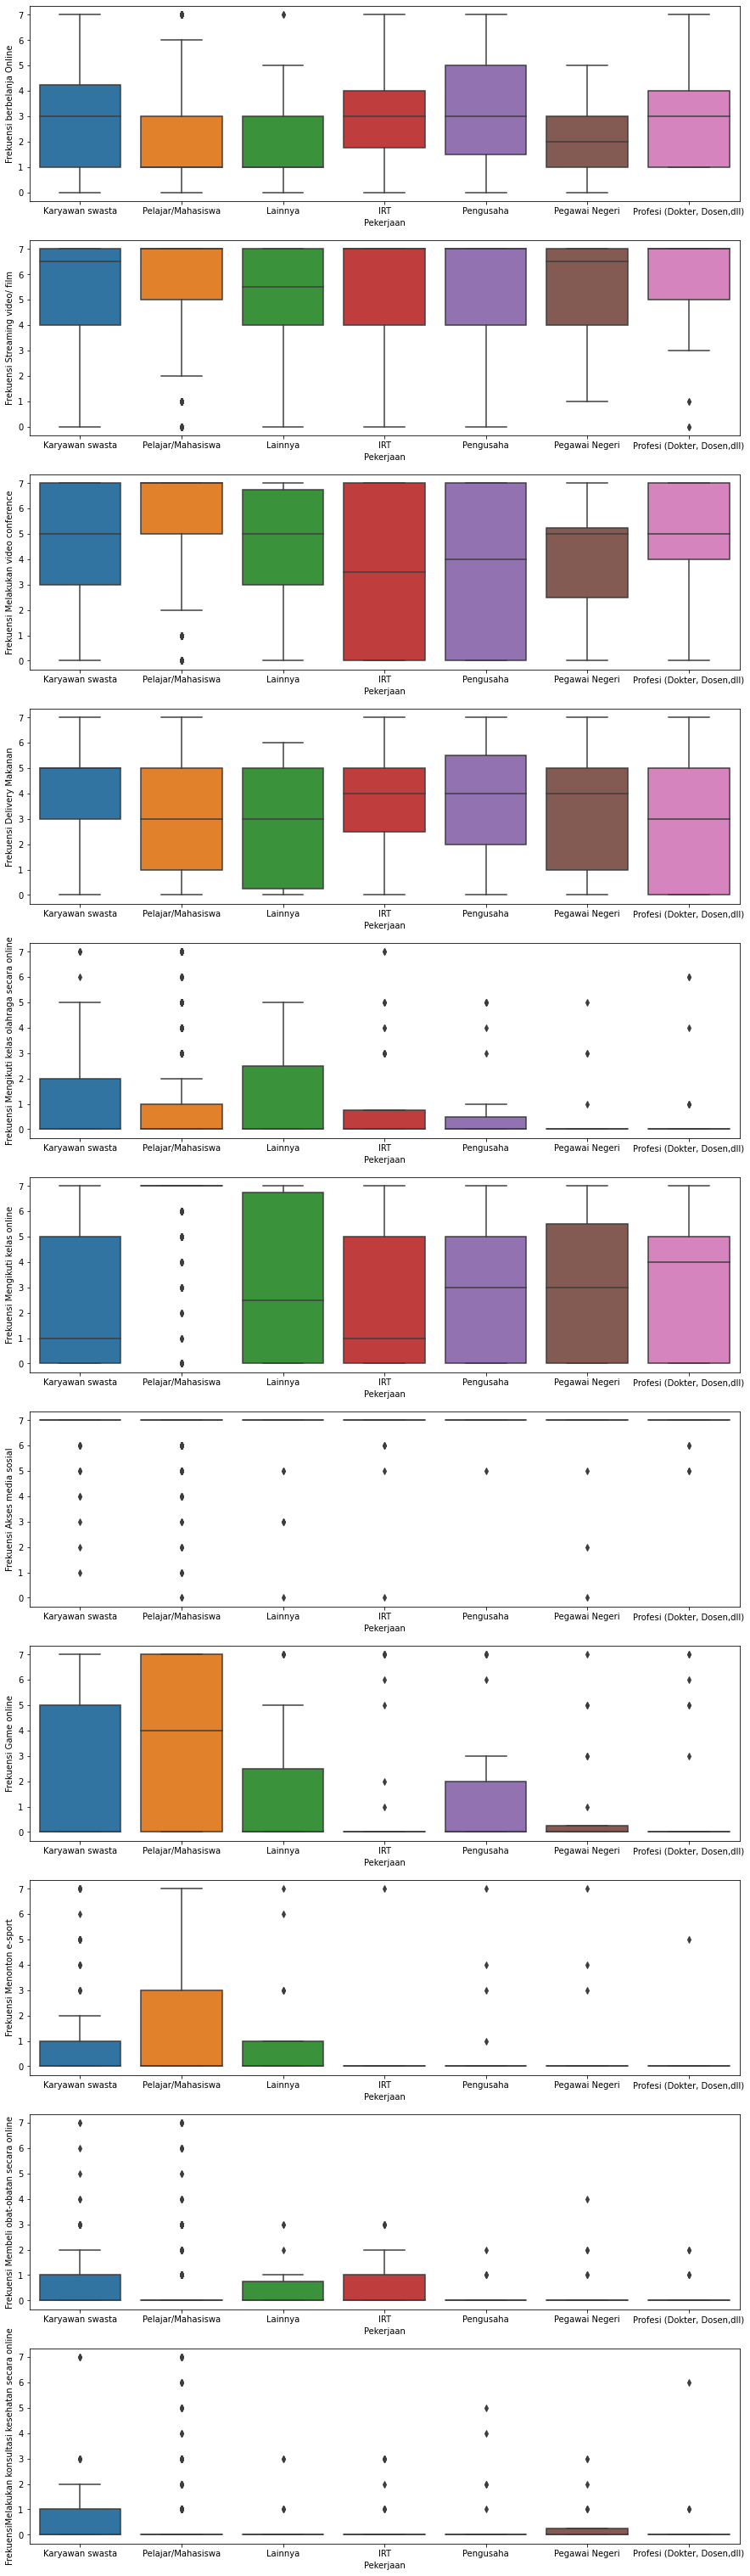

In [613]:
fig,ax = plt.subplots(tester.shape[1],1,figsize=(15,55))
for i in range(tester.shape[1]):
    res = tester[tester.columns[i]].map({
        'Beberapa kali dalam sebulan' :3, 
         '2-3 kali seminggu' : 5,
         'Beberapa bulan sekali' : 1, 
         'Beberapa kali dalam sehari/ setiap hari' : 7,
         'setiap bulan' : 2, 
         '4-6 kali seminggu' : 6, 
         'Tidak pernah' : 0,
         'sekali seminggu' : 4
    })
    
    sns.boxplot(identitas.Pekerjaan,y=res,ax=ax[i])
    ax[i].set_xticklabels(['Karyawan swasta','Pelajar/Mahasiswa','Lainnya','IRT','Pengusaha','Pegawai Negeri','Profesi (Dokter, Dosen,dll)'])


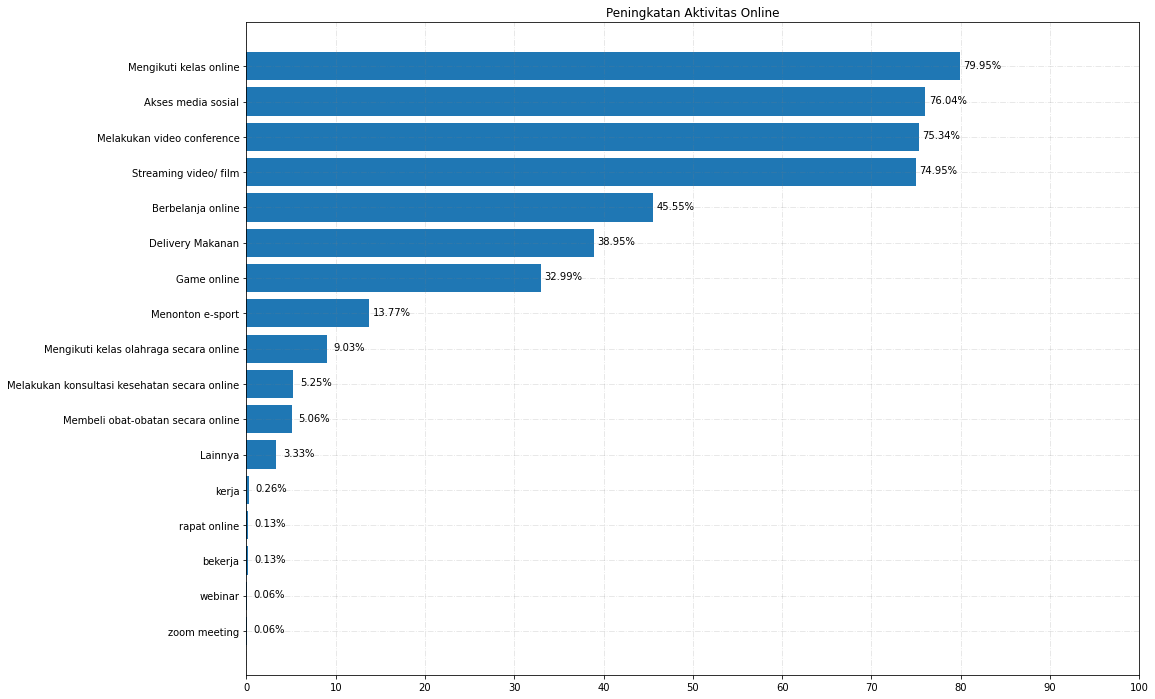

In [580]:
acc = hal2[hal2.columns[6]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

plt.figure(figsize=(16,12))
axx = plt.barh(array,counts)
plt.title('Peningkatan Aktivitas Online')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [548]:
hal2.columns

Index(['Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?',
       'Rata-rata durasi menggunakan internet Aktif tiap hari ?',
       'Akses atau provider internet yang digunakan selama ini?',
       'Nama Provider', 'Pengeluaran Mobile Data', 'Pengeluaran Broadband',
       'Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?',
       'Frekuensi berbelanja Online', 'Frekuensi Streaming video/ film',
       'Frekuensi Melakukan video conference', 'Frekuensi Delivery Makanan',
       'Frekuensi Mengikuti kelas olahraga secara online',
       'Frekuensi Mengikuti kelas online', 'Frekuensi Akses media sosial',
       'Frekuensi Game online', 'Frekuensi Menonton e-sport',
       'Frekuensi Membeli obat-obatan secara online',
       'FrekuensiMelakukan konsultasi kesehatan secara online',
       'Bekerja / belajar', 'Meeting', 'Mengikuti workshop/ seminar',
       'Menonton film', 'Menonton konser', 'Family/ social gathering',
       'Konsultasi ma

In [618]:
hal2.columns[25]

'Media komunikasi yang paling sering digunakan untuk Work From Home/\xa0School From Home ?'

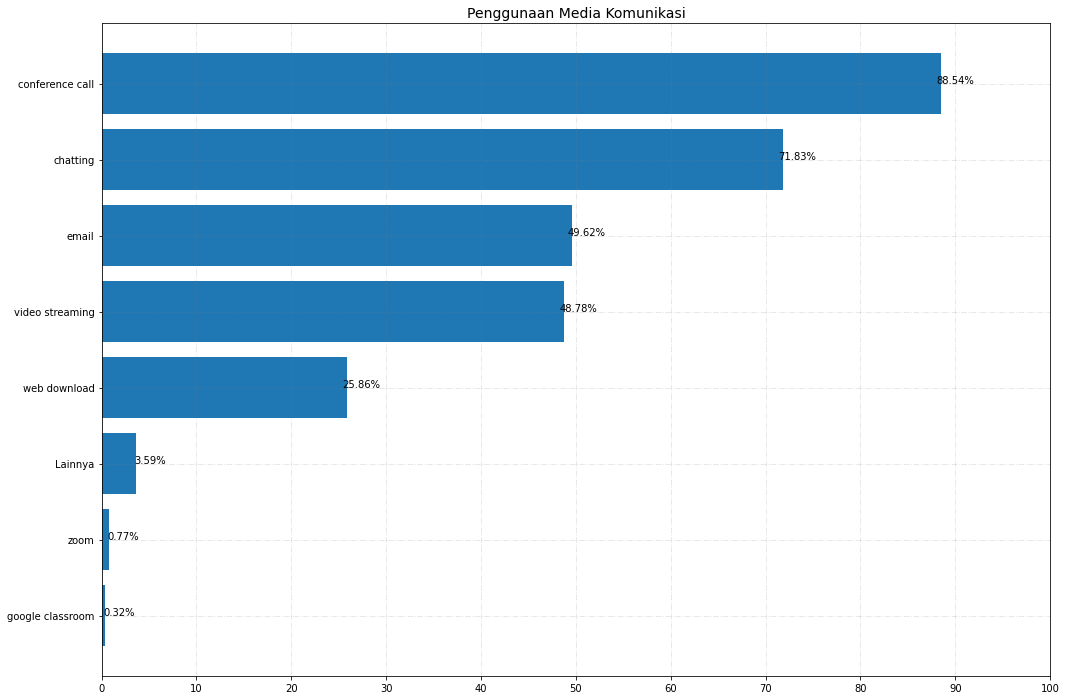

In [614]:
acc = hal2[hal2.columns[25]]
acc = acc.dropna()
acc = [re.sub('conference call \(video\/ audio\)','conference call',x) for x in acc]
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(17,12))
axx = plt.barh(array,counts)
plt.title('Penggunaan Media Komunikasi',fontsize=14)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(1.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

jumlah data :  1563


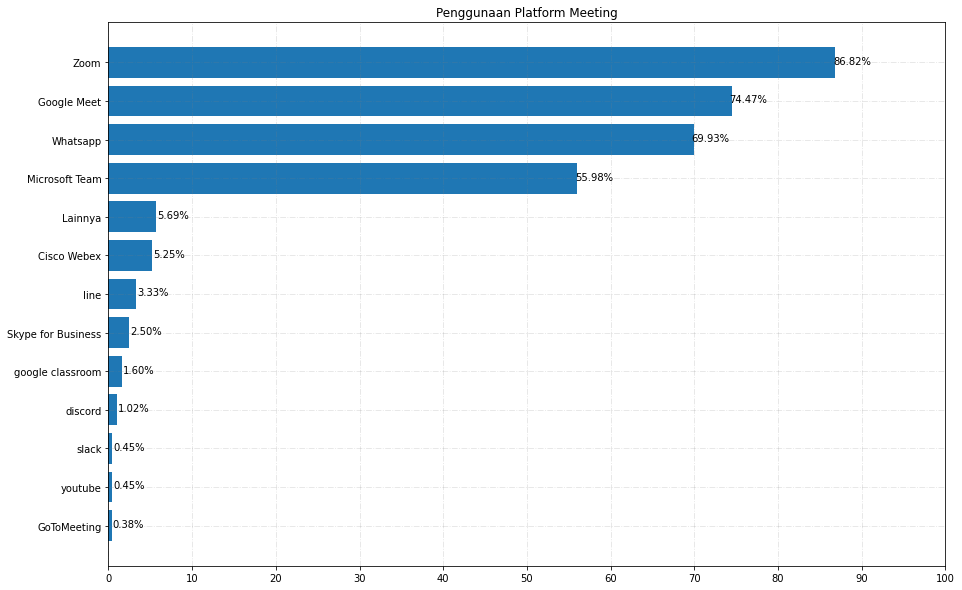

In [619]:
acc = hal2[hal2.columns[26]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print('jumlah data : ',acc.shape[0])
plt.figure(figsize=(15,10))
axx = plt.barh(array,counts)
plt.title('Penggunaan Platform Meeting')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [535]:
mobiledata = abcc.loc[abcc[abcc.columns[2]]=='Menggunakan Mobile Data']
uniq = list(set([i for x in [p.split(',') for p in mobiledata[mobiledata.columns[3]]] for i in x]))
count = [len([1 for x in mobiledata[mobiledata.columns[3]] if re.search(a,x)]) for a in uniq]
counts = sorted(count)

In [536]:
array = []
for j in counts:
    for i in range(len(uniq)):
        if count[i]==j:
            array.append(uniq[i])
            
counts = [round(x*100/sum(count),2) for x in counts]

In [537]:
counts

[0.24, 0.71, 0.95, 1.65, 2.36, 3.55, 8.51, 9.93, 11.11, 13.71, 47.28]

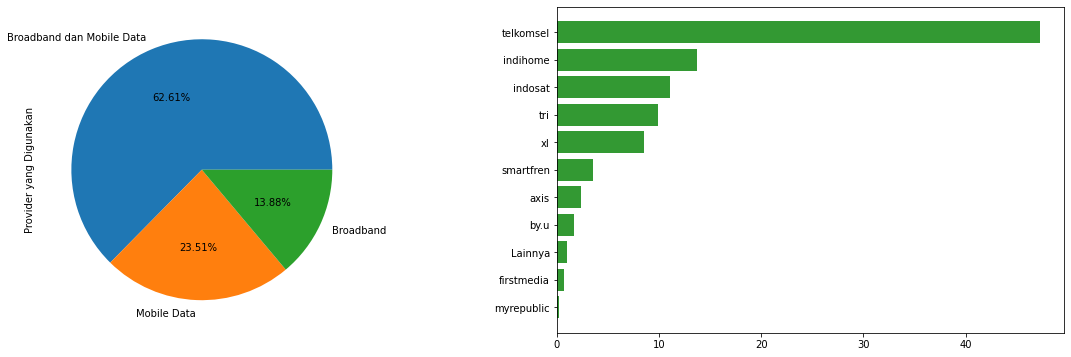

In [538]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

bwidth = 0.3
ticks = np.arange(len(array))

hal2[hal2.columns[2]].value_counts(normalize=True).plot(kind='pie',labels=['Broadband dan Mobile Data','Mobile Data','Broadband'],autopct='%.2f%%',ax=ax[0])
ax[1].barh(ticks,counts,color='g',alpha=0.8)
ax[0].set_ylabel('Provider yang Digunakan')
ax[1].set(yticks=ticks,yticklabels=array)

plt.show()

## Visualisasi Halaman 3

In [291]:
hal3.head()

Apakah Anda menggunakan layanan-layanan bank berikut?  \
0                     ATM,Mobile Banking,SMS Banking      
1                                 ATM,Mobile Banking      
2                                     Mobile Banking      
3                                 ATM,Mobile Banking      
4                                     Mobile Banking      

                         Bank ATM Bank Internet Banking Bank Mobile Banking  \
0                    Bank Mandiri                   NaN        Bank Mandiri   
1  Bank BNI,Bank Mandiri,Bank BCA                   NaN            Bank BCA   
2                             NaN                   NaN            Bank BCA   
3                        Bank BCA              Bank BCA            Bank BCA   
4                        Bank BNI                   NaN            Bank BNI   

  Bank SMS Banking Bank Kartu Kredit Bank Kantor Cabang Unnamed: 248  \
0     Bank Mandiri               NaN                NaN          NaN   
1              NaN               NaN                NaN          NaN   
2              NaN               NaN                NaN          NaN   
3              NaN               NaN                NaN          NaN   
4              NaN               NaN                NaN          NaN   

                              Frekuensi ATM Frekuensi Internet Banking  ...  \
0                        2-5 kali per bulan                        NaN  ...   
1                        6-9 kali per bulan                        NaN  ...   
2                                       NaN                        NaN  ...   
3  Kurang dari/ setidaknya 1 kali per bulan               Tidak Pernah  ...   
4  Kurang dari/ setidaknya 1 kali per bulan                        NaN  ...   

  Layanan ketika Pembayaran Tagihan  \
0                               ATM   
1                    Mobile Banking   
2                    Mobile Banking   
3                  Internet Banking   
4                    Mobile Banking   

             Keluhan Menggunakan eChannel Bank  \
0  Proses tidak berhasil namun saldo terpotong   
1                         Layanan/ Sistem down   
2                         Layanan/ Sistem down   
3                                          NaN   
4                         Layanan/ Sistem down   

  Apakah Anda pernah melakukan pendaftaran rekening melalui full online (sama sekali tidak datang ke kantor cabang bank) ?  \
0                                       Tidak Pernah                                                                         
1                                       Tidak Pernah                                                                         
2                                       Tidak Pernah                                                                         
3                                       Tidak Pernah                                                                         
4                                       Tidak Pernah                                                                         

  Jika Pernah membuka layanan rekening bank secara online, bank apakah yang Anda daftar secara online?  \
0                                       Tidak Pernah                                                     
1                                       Tidak Pernah                                                     
2                                       Tidak Pernah                                                     
3                                       Tidak Pernah                                                     
4                                       Tidak Pernah                                                     

  Apakah yang menjadi alasan Anda menggunakan bank full online / digital bank tersebut?  \
0             Tidak memiliki rekening di bank online                                      
1             Tidak memiliki rekening di bank online                                      
2                                kemudahan transaksi         

In [658]:
hal3['Unnamed: 248'].value_counts()

Jenius                                           13
Bank Mandiri Syariah                              8
BTPN                                              7
Bank Muamalat                                     6
BJB                                               4
maybank                                           3
DBS Bank                                          3
jppost                                            2
bri syariah                                       2
BNI Syariah                                       2
atm, mobile banking,BJB                           1
maybank, panin bank (kartu kredit)                1
bank bpr                                          1
Bank MuamalatdanBank Mandiri Syariah              1
Jenius.                                           1
link aja                                          1
Jenius,  (bank nobu national),  ,BJB              1
bank sumut                                        1
ゆちょ銀行                                             1
bank mon    

In [255]:
for i in range(hal3.shape[1]):
    print(i,hal3.columns[i])

0 Apakah Anda menggunakan layanan-layanan bank berikut?
1 Bank ATM
2 Bank Internet Banking
3 Bank Mobile Banking
4 Bank SMS Banking
5 Bank Kartu Kredit
6 Bank Kantor Cabang
7 Unnamed: 248
8 Frekuensi ATM
9 Frekuensi Internet Banking
10 Frekuensi Mobile Banking
11 Frekuensi SMS Banking
12 Frekuensi Datang ke cabang bank
13 Layanan ketika Cek Saldo
14 Layanan ketika Mutasi Rekening
15 Layanan ketika Transfer antar rekening (sesama bank)
16 Layanan ketika Transfer antar bank
17 Layanan ketika Pembelian Pulsa, eMoney atau voucher-voucher lain
18 Layanan ketika Pembayaran Tagihan
19 Keluhan Menggunakan eChannel Bank
20 Apakah Anda pernah melakukan pendaftaran rekening melalui full online (sama sekali tidak datang ke kantor cabang bank) ?
21 Jika Pernah membuka layanan rekening bank secara online, bank apakah yang Anda daftar secara online?
22 Apakah yang menjadi alasan Anda menggunakan bank full online / digital bank tersebut?
23 Fitur yang paling sering digunakan saat menggunakan bank full

In [256]:
hal3.isnull().sum()

Apakah Anda menggunakan layanan-layanan bank berikut?                                                                          0
Bank ATM                                                                                                                     165
Bank Internet Banking                                                                                                        968
Bank Mobile Banking                                                                                                          408
Bank SMS Banking                                                                                                            1228
Bank Kartu Kredit                                                                                                           1281
Bank Kantor Cabang                                                                                                          1075
Unnamed: 248                                                                                     

jumlah data :  1404


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

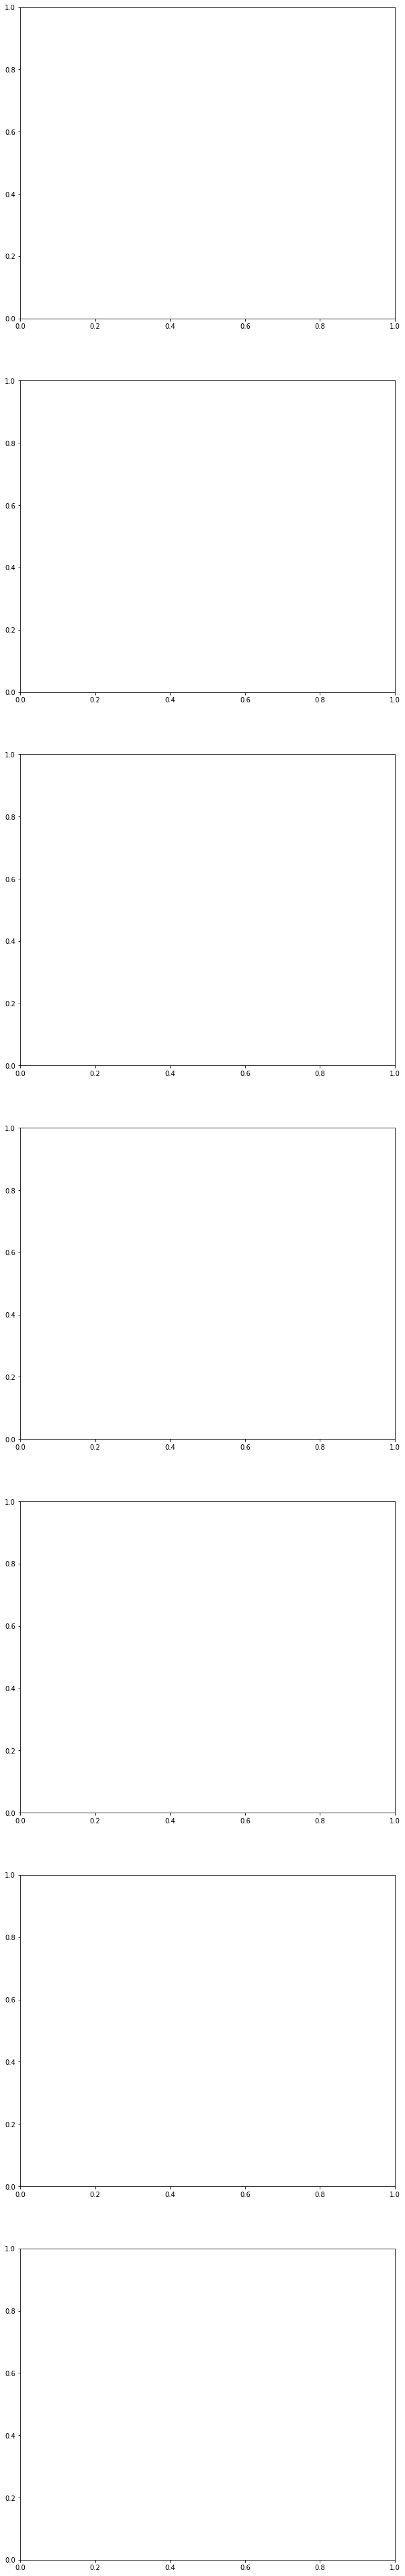

In [641]:
adc = hal3.iloc[:,np.arange(1,8)]
fig,ax = plt.subplots(adc.shape[1],1,figsize=(10,70))

for i in range(adc.shape[1]-1):
    acc = adc[adc.columns[i]]
    acc = acc.dropna()
    string = [x.split(',') for x in acc]
    [i.join(',') if len(x)>1 else x for x in string for i in x]
    abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
    count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
    counts = sorted(count)

    abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
    array = []
    for i in abc:
        if i not in array:
            array.append(i)
    counts = [round(x*100/acc.shape[0],2) for x in counts]
    print('jumlah data : ',acc.shape[0])
    
    plt.pie(counts,ax=ax[i])

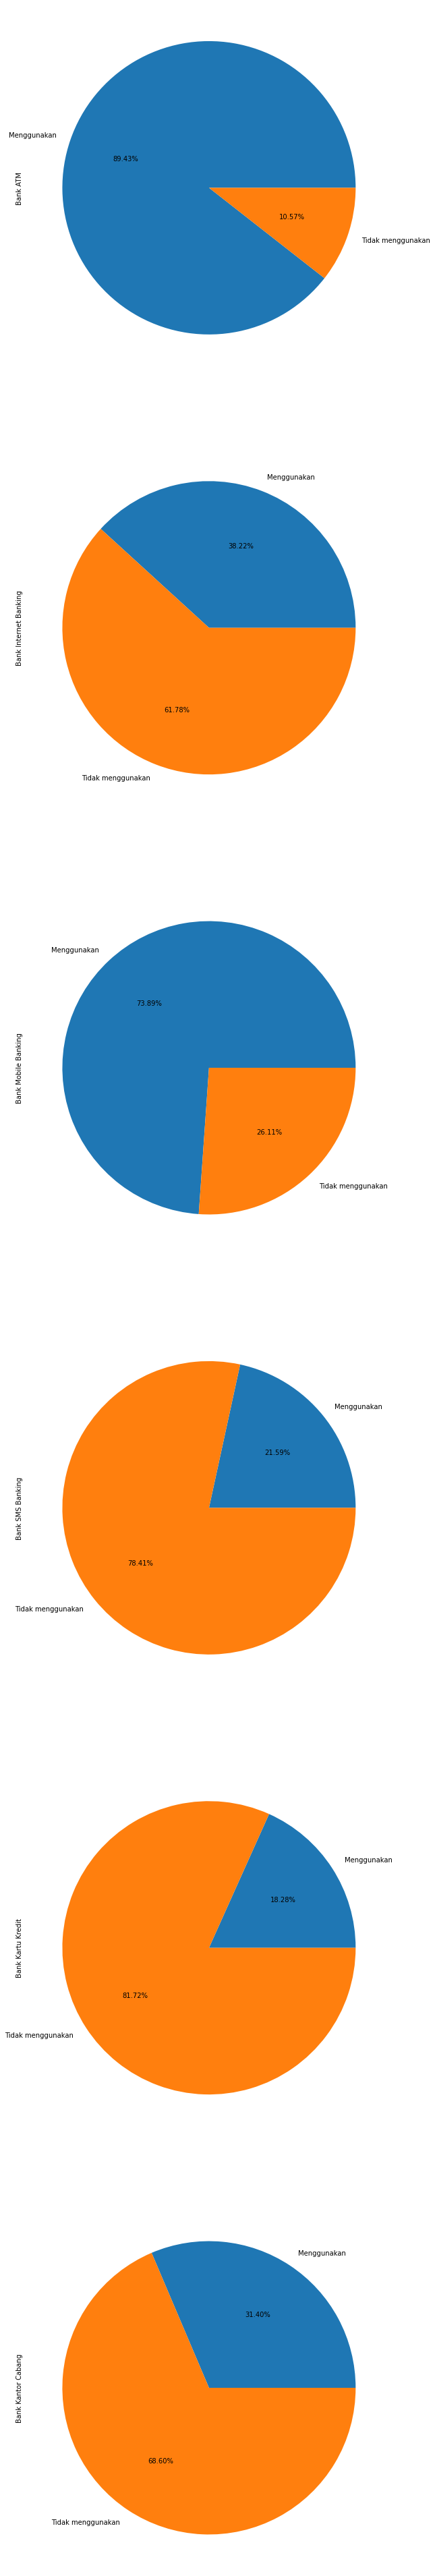

In [654]:
fig,ax = plt.subplots(adc.shape[1]-1,1,figsize=(10,70))
for i in range(adc.shape[1]-1):
    acc = adc[adc.columns[i]]
    acc = acc.fillna('temp')
    count = [len([1 for x in acc if (not re.search('(temp)',x))]),(len(acc)-len([1 for x in acc if not re.search('(temp)',x)]))]
    ax[i].pie(count,labels=['Menggunakan','Tidak menggunakan'],autopct='%.2f%%')
    ax[i].set_ylabel(adc.columns[i])

jumlah data :  1404
jumlah data :  600
jumlah data :  1160
jumlah data :  339
jumlah data :  287
jumlah data :  493


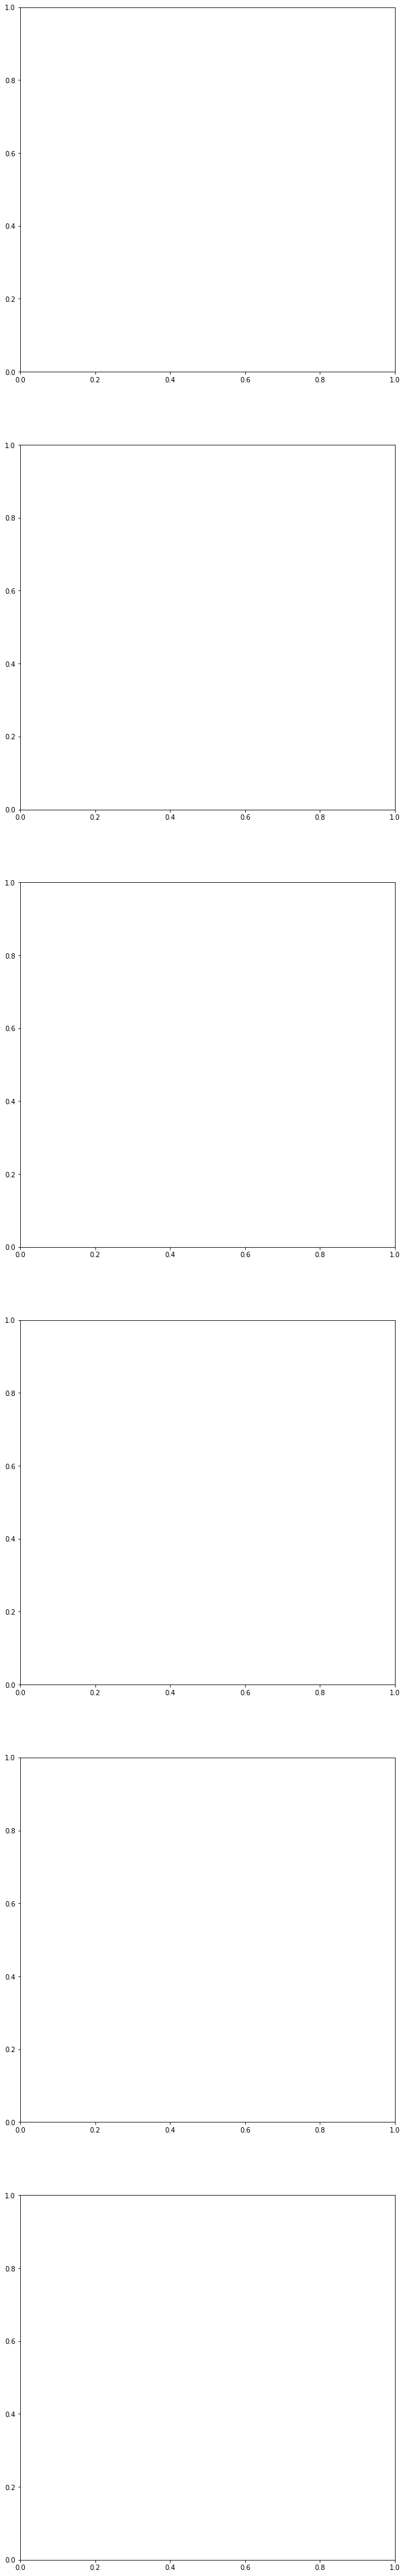

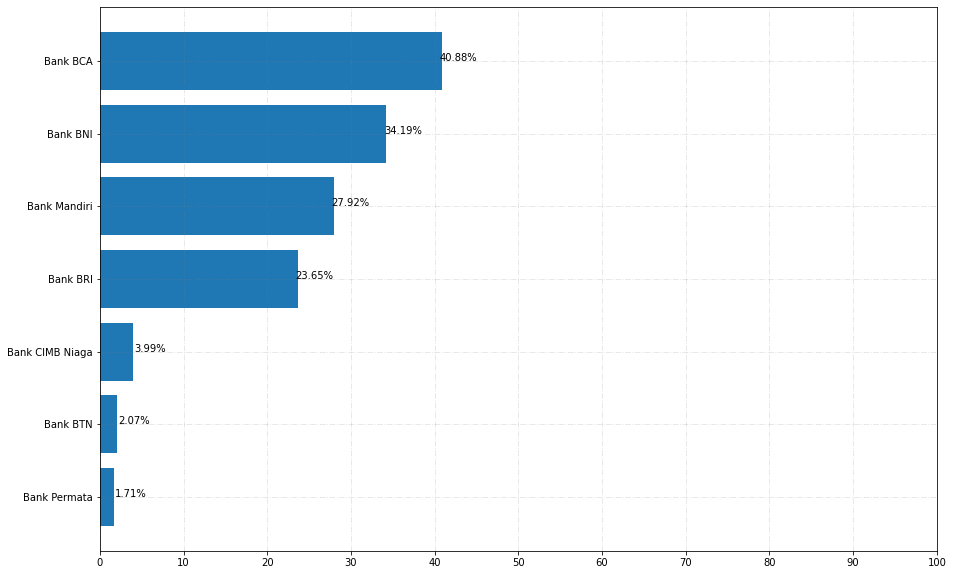

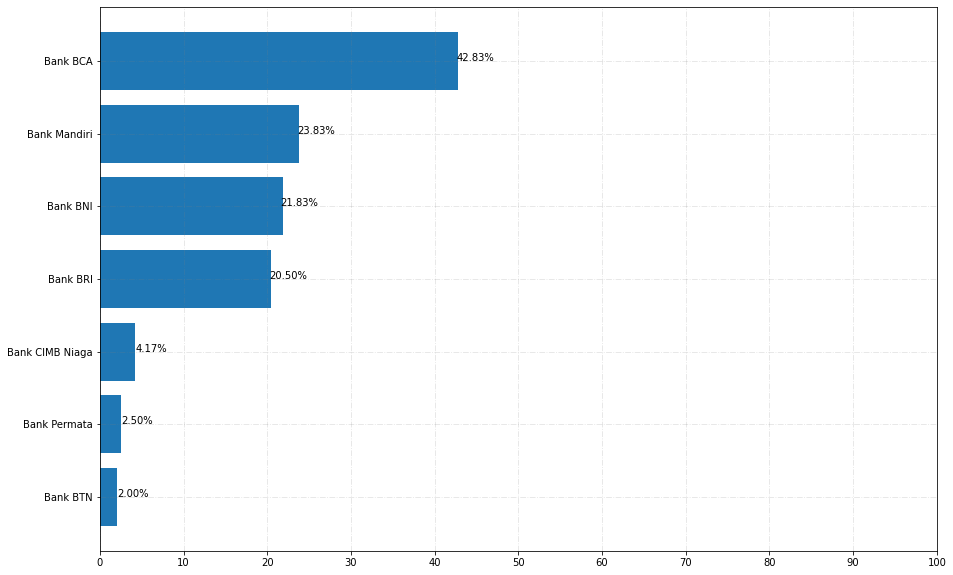

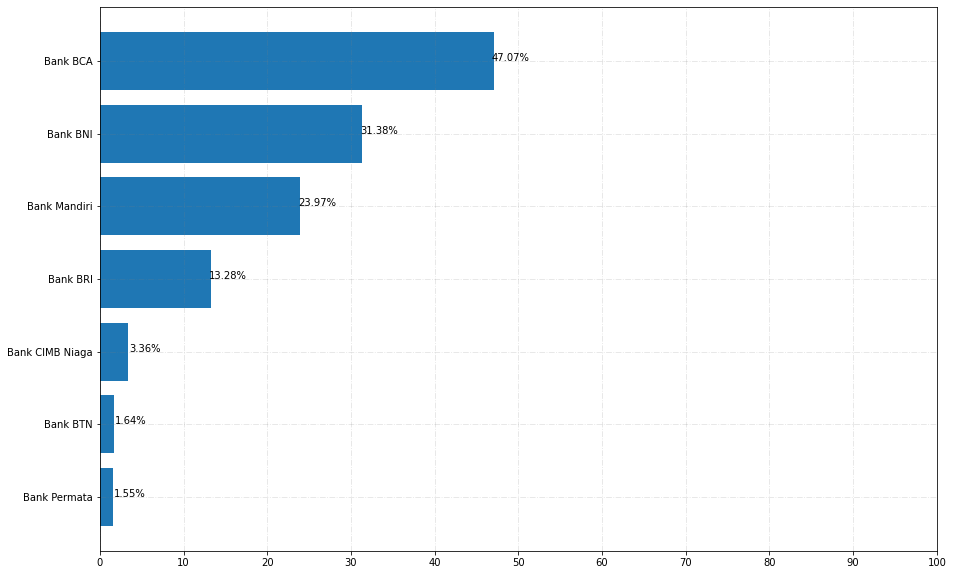

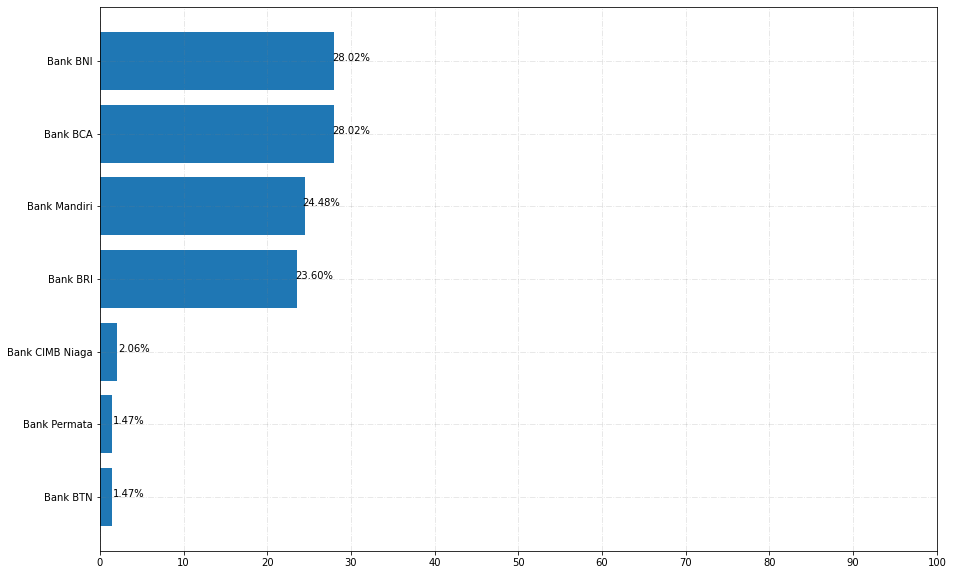

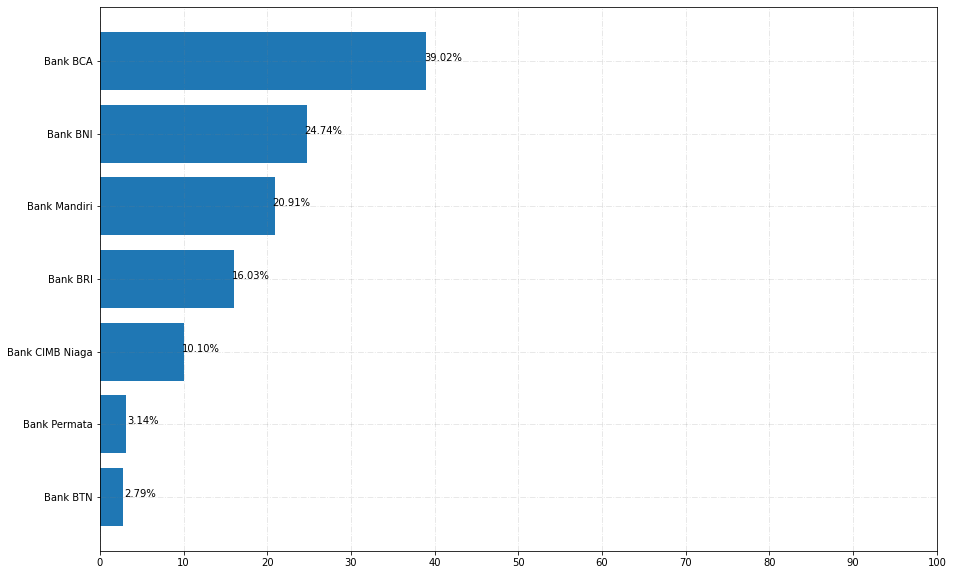

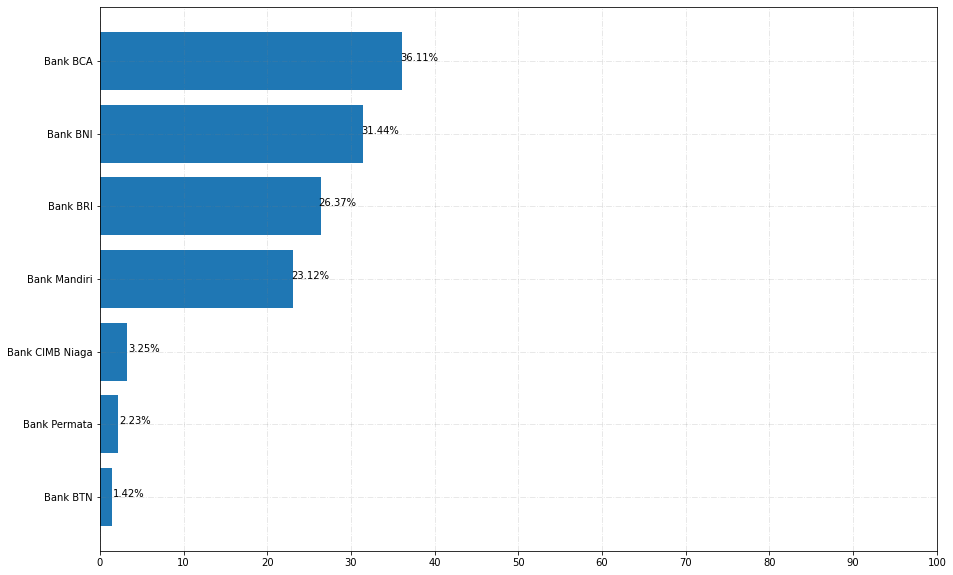

In [674]:
fig,ax = plt.subplots(adc.shape[1]-1,1,figsize=(10,70))
for i in range(adc.shape[1]-1):
    acc = adc[adc.columns[i]]
    acc = acc.dropna()
    string = [x.split(',') for x in acc]
    [i.join(',') if len(x)>1 else x for x in string for i in x]
    abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
    count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
    counts = sorted(count)

    abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
    array = []
    for i in abc:
        if i not in array:
            array.append(i)
    counts = [round(x*100/acc.shape[0],2) for x in counts]
    print('jumlah data : ',acc.shape[0])
    plt.figure(figsize=(15,10))
    axx = plt.barh(array,counts)
    plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
    plt.xticks(np.arange(0,110,10))

    for p in axx.patches:
        width = p.get_width()
        plt.text(2 + p.get_width(), p.get_y()+0.55*p.get_height(),
                 '{:1.2f}%'.format(width),
                 ha='center', va='center')

jumlah data :  77


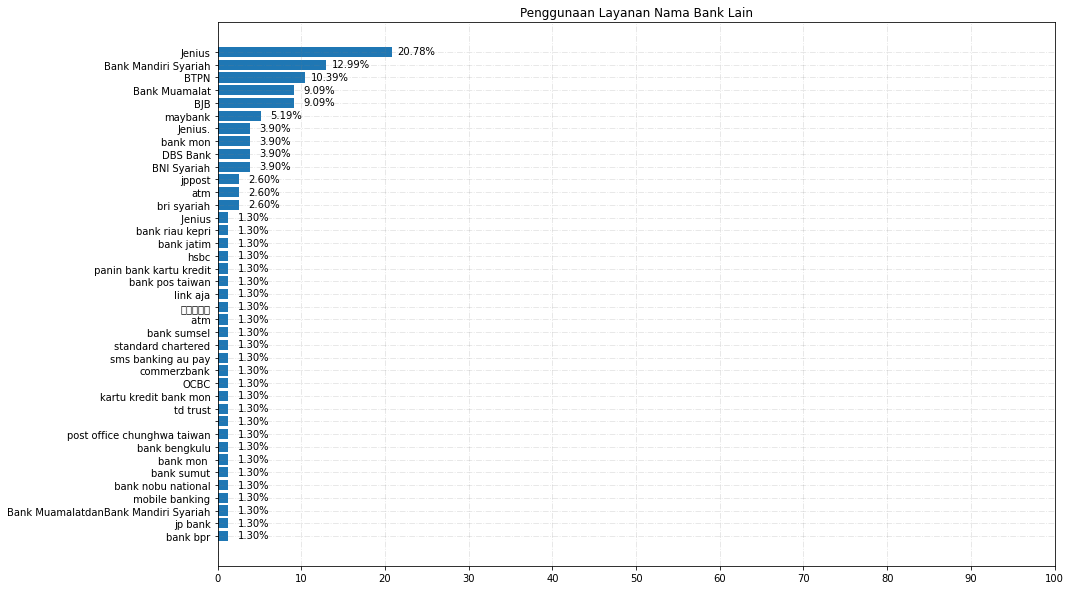

In [672]:
acc = hal3['Unnamed: 248']
acc = acc.dropna()
string = [x.split(',') for x in acc]
acc = [re.sub('[\(\)]','',x) for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(15,10))
axx = plt.barh(array,counts)
plt.title('Penggunaan Layanan Nama Bank Lain')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(3 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

jumlah data :  1570


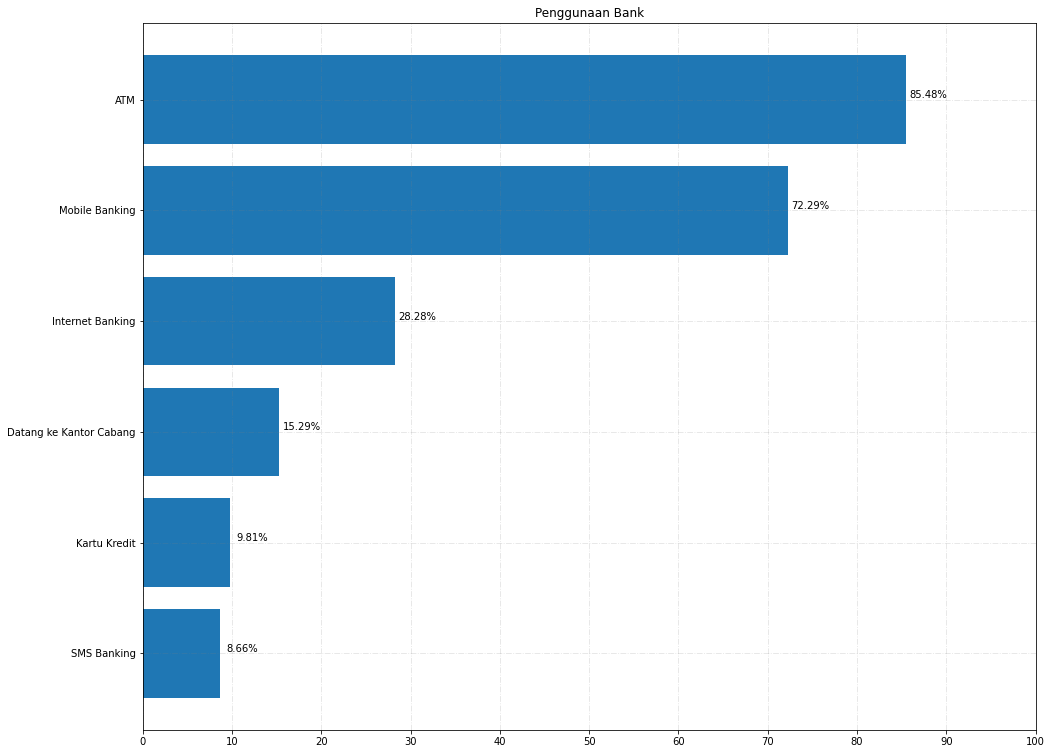

In [625]:
acc = hal3[hal3.columns[0]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print('jumlah data : ',acc.shape[0])
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Penggunaan Bank')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [680]:
acc = hal3.iloc[:,np.arange(8,13)]
for i in range (acc.shape[1]):
    acc[acc.columns[i]].loc[ (hal3[hal3.columns[i+1]].isna()==True) &(acc[acc.columns[i]].isna()==True)] =  'Tidak Pernah'
    
for i in range(acc.shape[1]):
    acc[acc.columns[i]].loc[ (hal3[hal3.columns[i+1]].isna()==False) &(acc[acc.columns[i]].isna()==True)] =  'Kurang dari/ setidaknya 1 kali per bulan'

C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Muhammad Ridlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


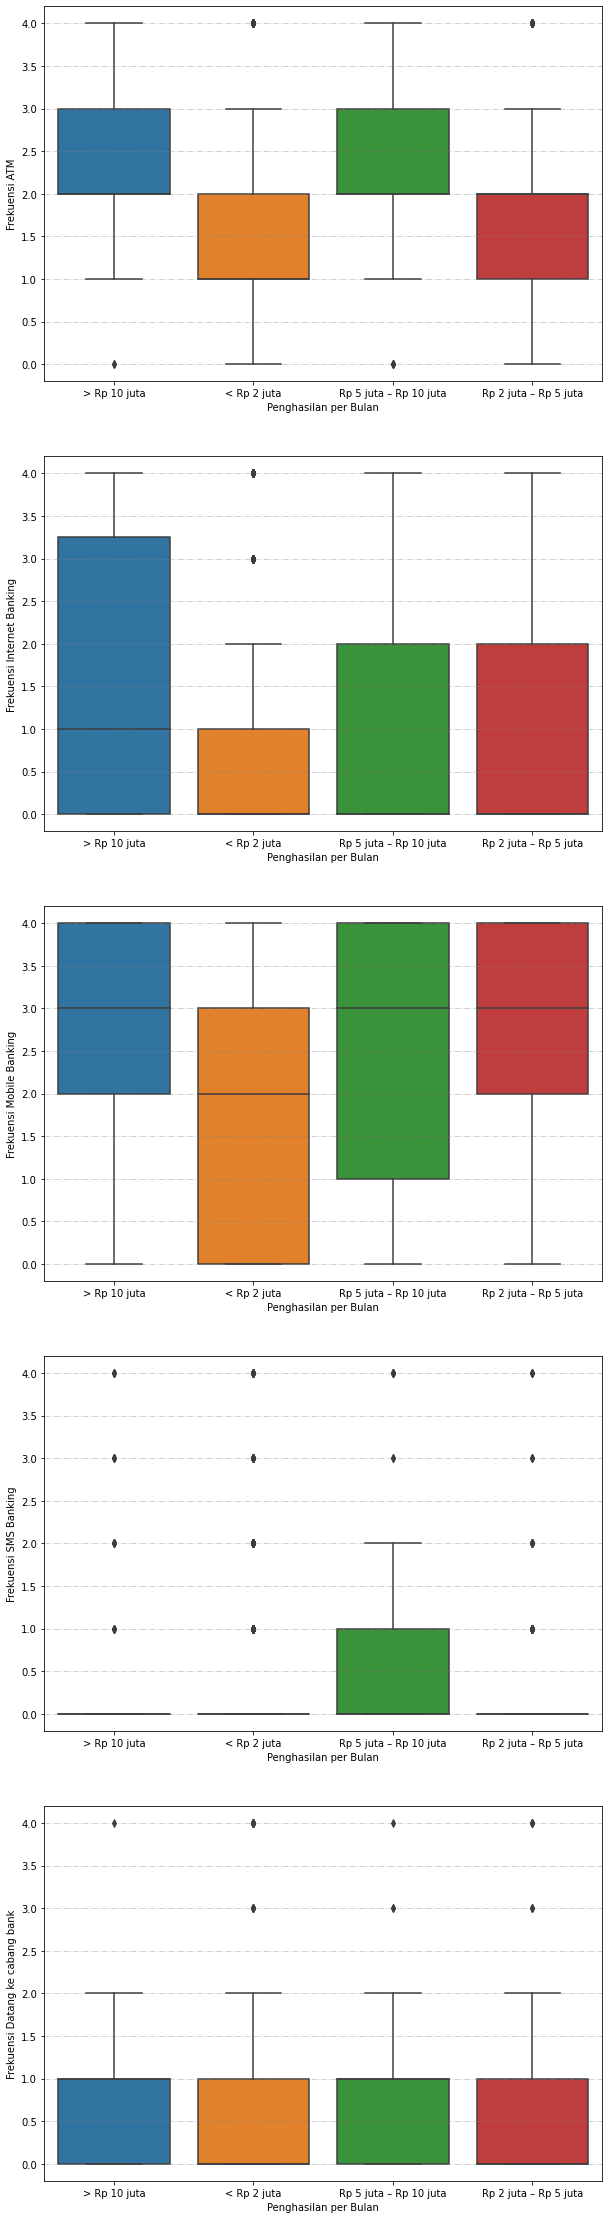

In [681]:
fig,ax = plt.subplots(acc.shape[1],1,figsize=(10,40))
for i in range(acc.shape[1]):
    res = acc[acc.columns[i]].map({
        '2-5 kali per bulan' : 2, 
        '6-9 kali per bulan' : 3,
        'Kurang dari/ setidaknya 1 kali per bulan' : 1, 
        'Tidak Pernah' : 0,
        '> 10 kali per bulan' : 4 
    })
    ax[i].grid(b=True,color='gray',ls='-.',alpha=0.4,linewidth=0.9)
    sns.boxplot(identitas['Penghasilan per Bulan'],y=res,ax=ax[i])

In [683]:
hal3.columns

Index(['Apakah Anda menggunakan layanan-layanan bank berikut?', 'Bank ATM',
       'Bank Internet Banking', 'Bank Mobile Banking', 'Bank SMS Banking',
       'Bank Kartu Kredit', 'Bank Kantor Cabang', 'Unnamed: 248',
       'Frekuensi ATM', 'Frekuensi Internet Banking',
       'Frekuensi Mobile Banking', 'Frekuensi SMS Banking',
       'Frekuensi Datang ke cabang bank', 'Layanan ketika Cek Saldo',
       'Layanan ketika Mutasi Rekening',
       'Layanan ketika Transfer antar rekening (sesama bank)',
       'Layanan ketika Transfer antar bank',
       'Layanan ketika Pembelian Pulsa, eMoney atau voucher-voucher lain',
       'Layanan ketika Pembayaran Tagihan',
       'Keluhan Menggunakan eChannel Bank',
       'Apakah Anda pernah melakukan pendaftaran rekening melalui full online (sama sekali tidak datang ke kantor cabang bank) ?',
       'Jika Pernah membuka layanan rekening bank secara online, bank apakah yang Anda daftar secara online?',
       'Apakah yang menjadi alasan Anda mengg

Jumlah data:  1570


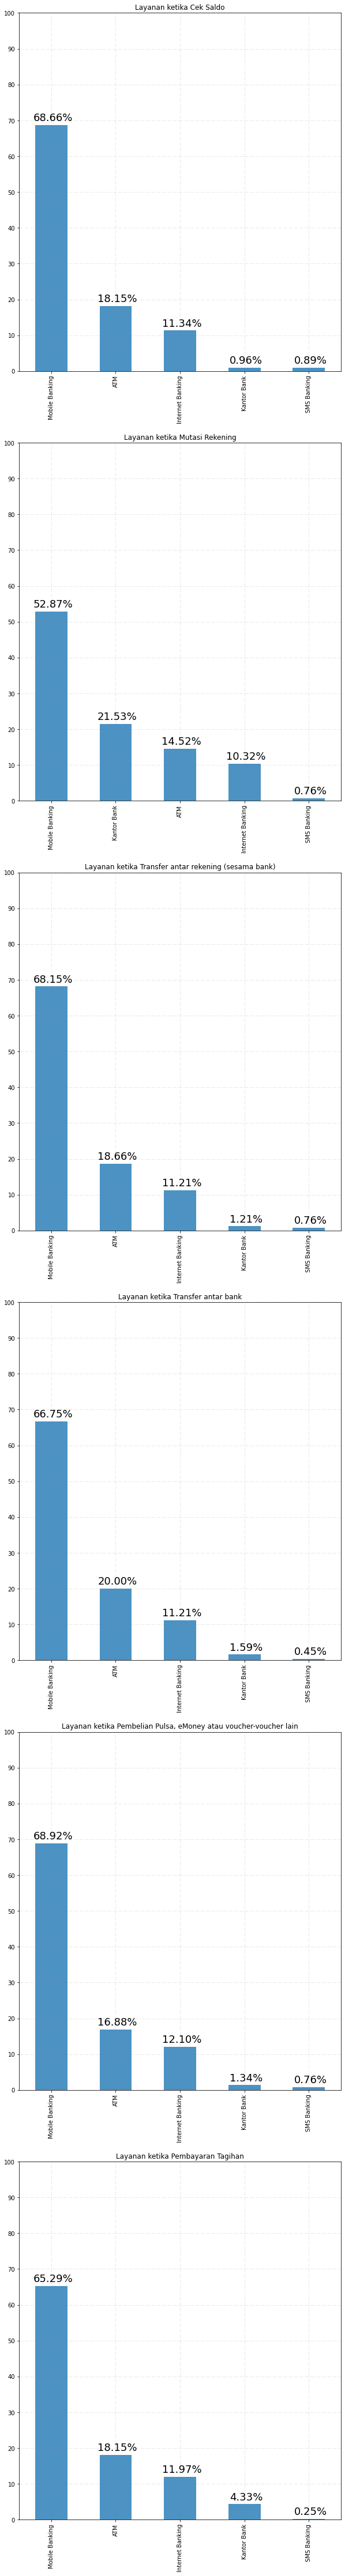

In [685]:
acc = hal3.iloc[:,np.arange(13,19)]
acc = acc.dropna()
print('Jumlah data: ',acc.shape[0])
fig,ax = plt.subplots(acc.shape[1],1,figsize=(10,80))      
for i in range (acc.shape[1]):
    acc[acc.columns[i]] = [re.sub('Datang ke cabang bank','Kantor Bank',x) for x in acc[acc.columns[i]]]
    axx = (acc[acc.columns[i]].value_counts(normalize=True)*100).plot(kind='bar',alpha=0.8,ax=ax[i])
    axx.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
    axx.set_yticks(np.arange(0,110,10))
    axx.set_title(acc.columns[i])
    
    for p in axx.patches:
        width = p.get_height()
        ax[i].text(p.get_x()+0.55*p.get_width(), 2+p.get_height(),
             '{:1.2f}%'.format(width),fontsize=18,
             ha='center', va='center') 


In [621]:
for i in range(len(hal3.columns)):
    print(i,hal3.columns[i])

0 Apakah Anda menggunakan layanan-layanan bank berikut?
1 Bank ATM
2 Bank Internet Banking
3 Bank Mobile Banking
4 Bank SMS Banking
5 Bank Kartu Kredit
6 Bank Kantor Cabang
7 Unnamed: 248
8 Frekuensi ATM
9 Frekuensi Internet Banking
10 Frekuensi Mobile Banking
11 Frekuensi SMS Banking
12 Frekuensi Datang ke cabang bank
13 Layanan ketika Cek Saldo
14 Layanan ketika Mutasi Rekening
15 Layanan ketika Transfer antar rekening (sesama bank)
16 Layanan ketika Transfer antar bank
17 Layanan ketika Pembelian Pulsa, eMoney atau voucher-voucher lain
18 Layanan ketika Pembayaran Tagihan
19 Keluhan Menggunakan eChannel Bank
20 Apakah Anda pernah melakukan pendaftaran rekening melalui full online (sama sekali tidak datang ke kantor cabang bank) ?
21 Jika Pernah membuka layanan rekening bank secara online, bank apakah yang Anda daftar secara online?
22 Apakah yang menjadi alasan Anda menggunakan bank full online / digital bank tersebut?
23 Fitur yang paling sering digunakan saat menggunakan bank full

jumlah data :  244


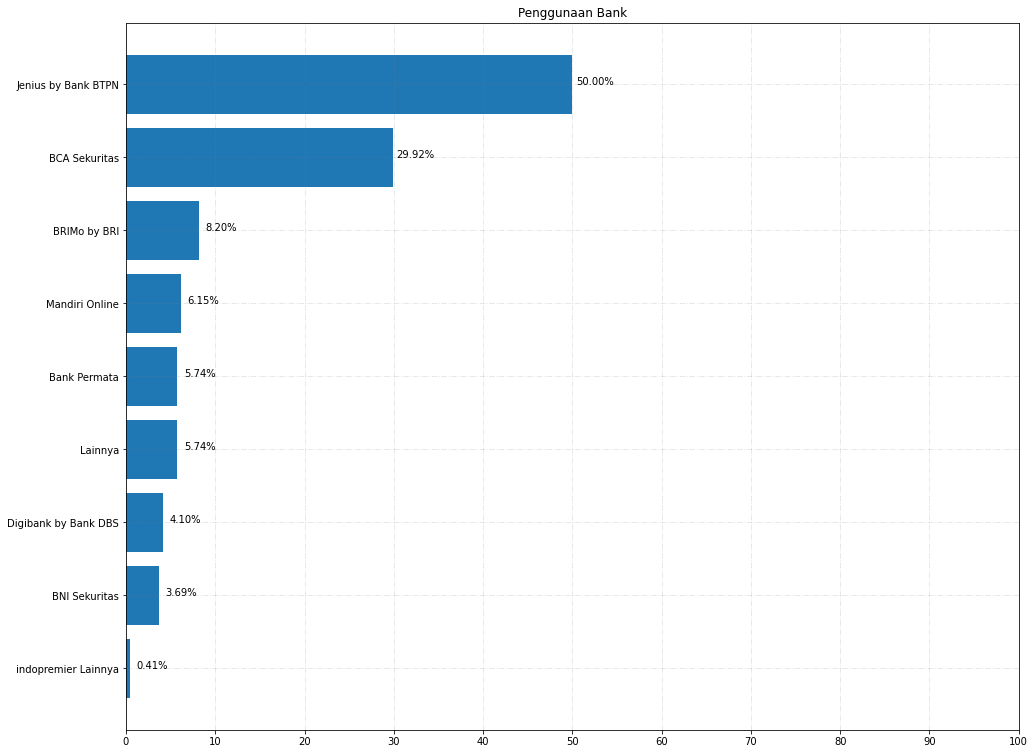

In [749]:
acc = hal3[hal3.columns[21]]
acc = acc.dropna()
acc = [x for x in acc if (not re.search('(Tidak Pernah|Tidak pernah)',x))]
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Penggunaan Bank')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

Text(0, 0.5, 'Rekening full online')

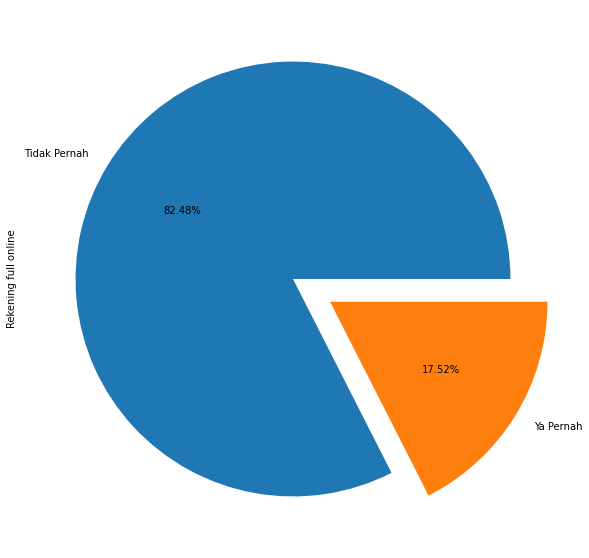

In [750]:
plt.figure(figsize=(10,10))
hal3[hal3.columns[20]].value_counts(normalize=True).plot(kind='pie',explode=[0,0.2],autopct='%.2f%%')
plt.ylabel('Rekening full online')

jumlah data :  1330


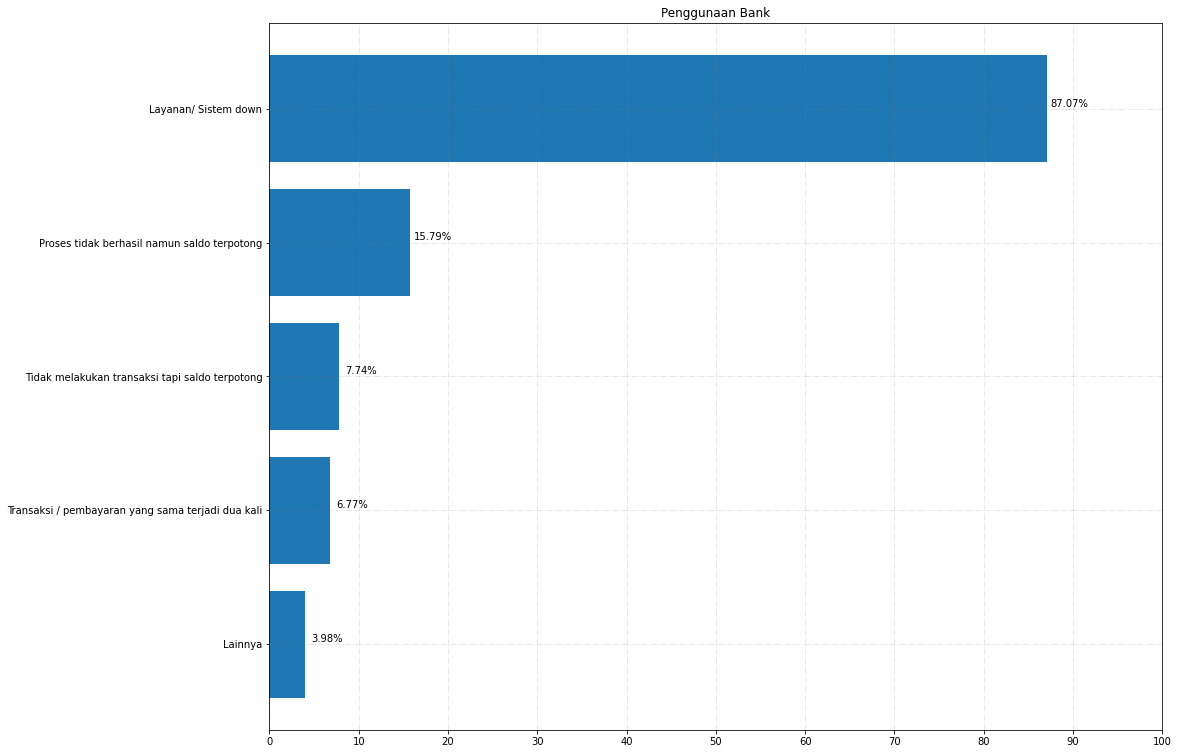

In [753]:
acc = hal3[hal3.columns[19]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print('jumlah data : ',acc.shape[0])
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Penggunaan Bank')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

jumlah data :  728


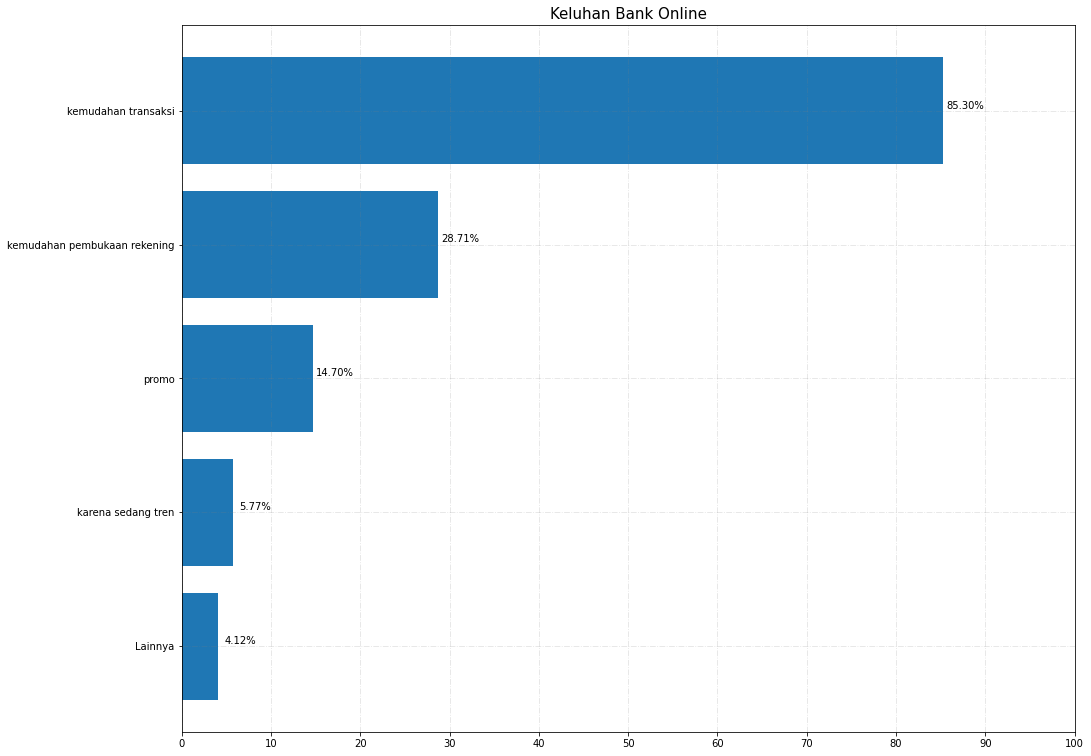

In [781]:
acc = hal3[hal3.columns[22]]
acc = acc.dropna()
acc = [x for x in acc if (not re.search('Tidak memiliki rekening di bank online',x))]
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Keluhan Bank Online',fontsize=15)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

jumlah data :  778


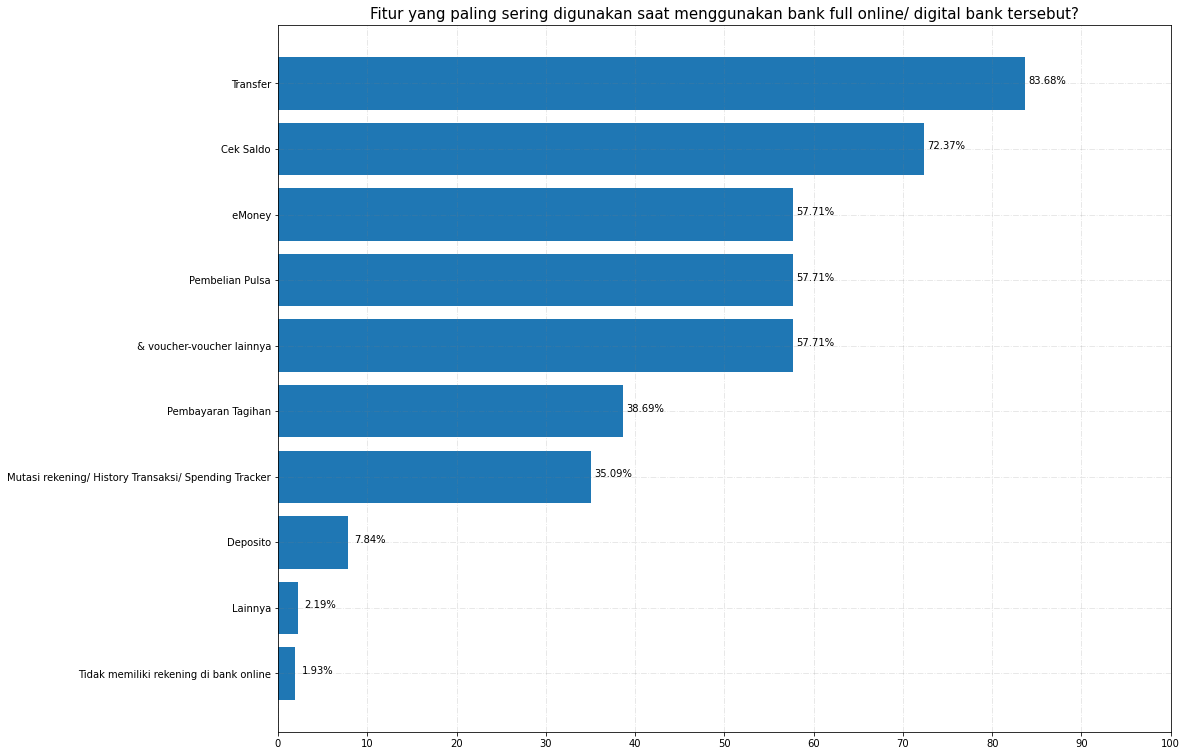

In [783]:
acc = hal3[hal3.columns[23]]
acc = acc.dropna()
acc = [x for x in acc if x!='Tidak memiliki rekening di bank online']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title(hal3.columns[23],fontsize=15)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

jumlah data :  265


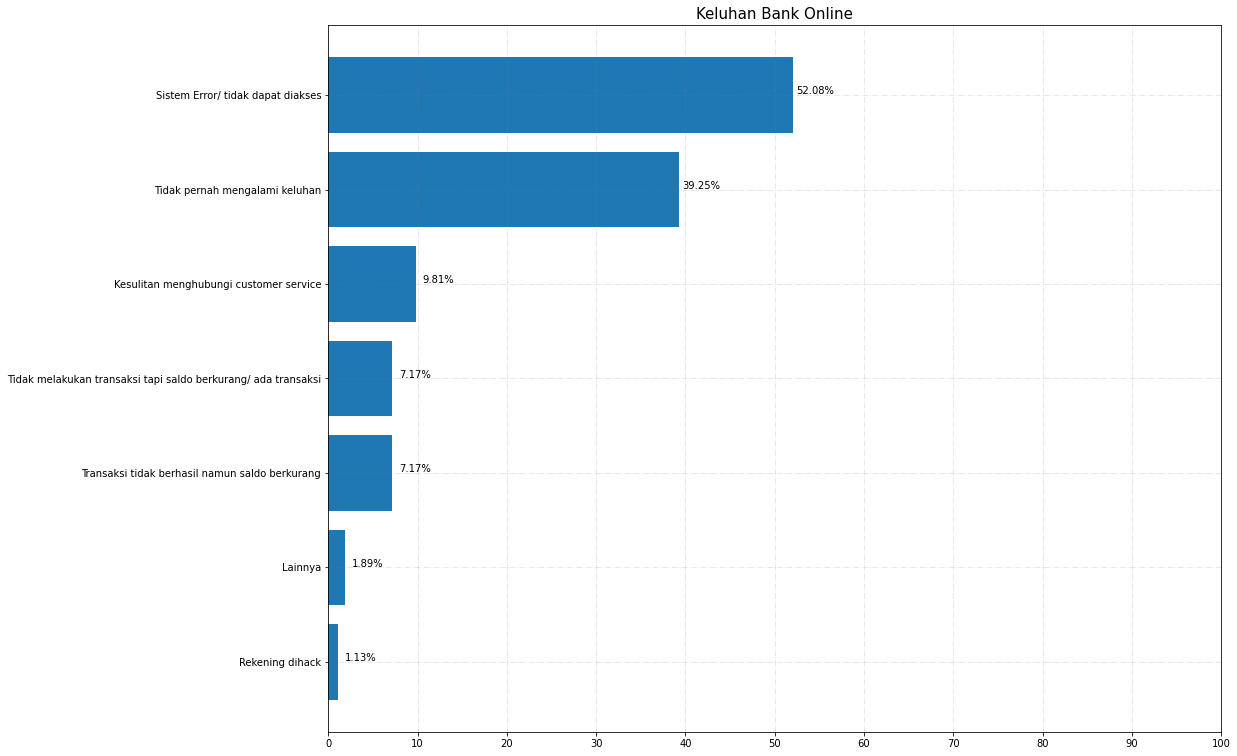

In [774]:
acc = hal3[hal3.columns[24]]
acc = acc.dropna()
acc = [x for x in acc if x!='Tidak memiliki rekening di bank online']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Keluhan Bank Online',fontsize=15)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

jumlah data :  1426


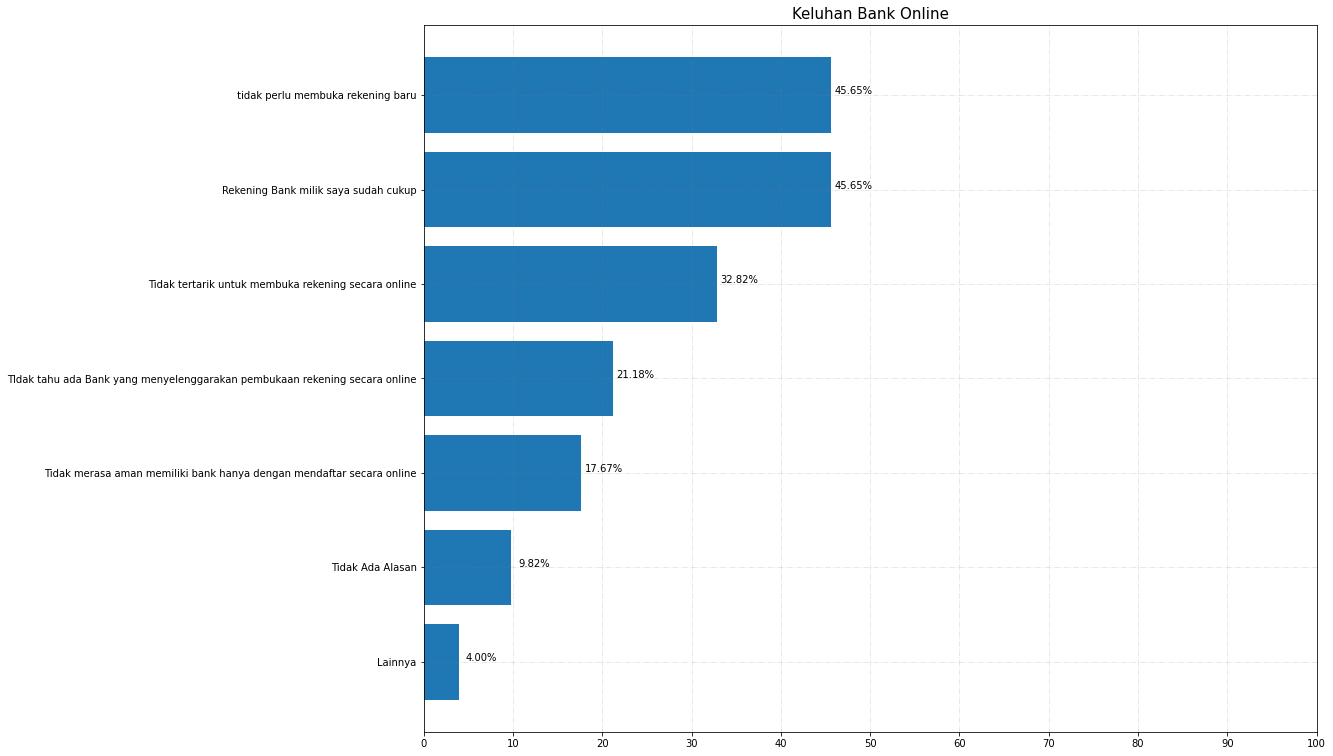

In [765]:
acc = hal3[hal3.columns[25]]
acc = acc.dropna()
acc = [re.sub('pernah','Lainnya',x) for x in acc]
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Keluhan Bank Online',fontsize=15)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

Text(0, 0.5, 'Rekening full online')

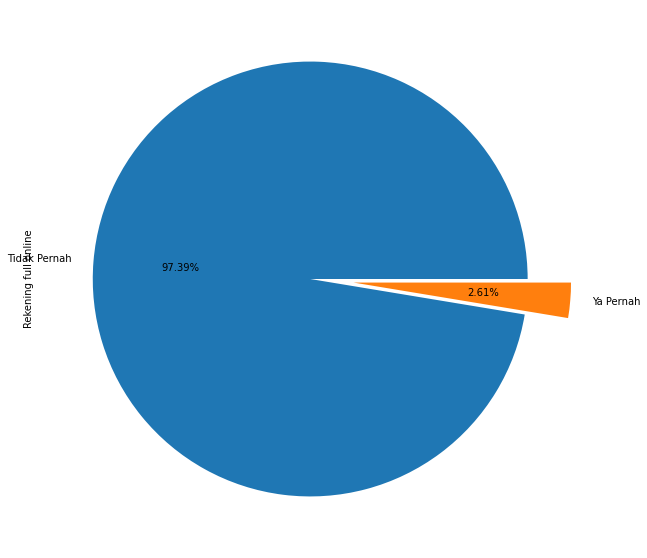

In [768]:
plt.figure(figsize=(10,10))
hal3[hal3.columns[26]].value_counts(normalize=True).plot(kind='pie',explode=[0,0.2],autopct='%.2f%%')
plt.ylabel('Rekening full online')

jumlah data :  14


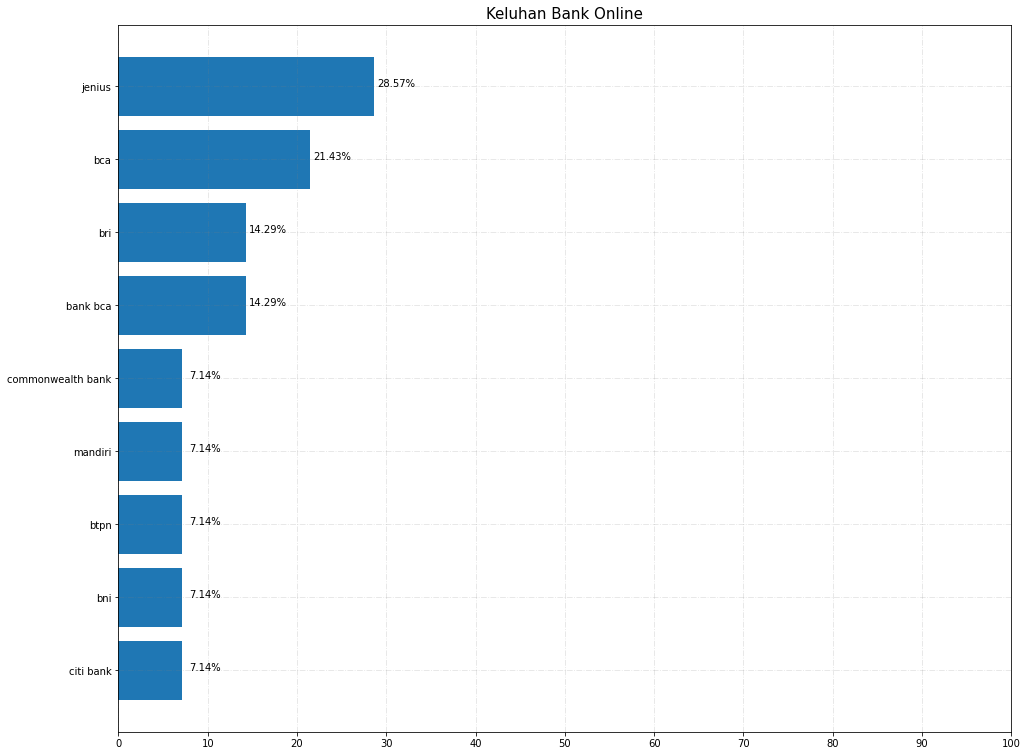

In [771]:
acc = hal3[hal3.columns[27]]
acc = acc.dropna()
acc = [x for x in acc if x!='Tidak punya kartu kredit online']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
print('jumlah data : ',len(acc))
plt.figure(figsize=(16,13))
axx = plt.barh(array,counts)
plt.title('Penggunaan Kartu Kredit',fontsize=15)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [773]:
hal3[hal3.columns[27]]

0       Tidak punya kartu kredit online
1       Tidak punya kartu kredit online
2       Tidak punya kartu kredit online
3       Tidak punya kartu kredit online
4       Tidak punya kartu kredit online
                     ...               
1565    Tidak punya kartu kredit online
1566    Tidak punya kartu kredit online
1567    Tidak punya kartu kredit online
1568    Tidak punya kartu kredit online
1569    Tidak punya kartu kredit online
Name: Unnamed: 347, Length: 1570, dtype: object

## Visualisasi Halaman 4

In [362]:
hal4.head()

Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1)  \
0                                  GoPay,OVO,LinkAja                     
1             OVO,ShopeePay,Flazz BCA,eMoney Mandiri                     
2                           GoPay,OVO,Dana,ShopeePay                     
3         GoPay,OVO,LinkAja,Dana,ShopeePay,Flazz BCA                     
4                                          GoPay,OVO                     

          Mengapa Anda menggunakan layanan tersebut?  \
0                                             Simple   
1                        Simple,Efisien secara waktu   
2  Simple,Efisien secara waktu,Tidak perlu datang...   
3                                              Promo   
4                                             Simple   

  Untuk keperluan apa Anda biasanya menggunakan layanan tersebut?  \
0                      Pembayaran e-commerce,Lainnya                
1  Pembayaran transportasi online,Pembayaran tol,...                
2  Pembayaran transportasi online,Pembayaran tol,...                
3      Pembayaran di restauran/ cafe,Pembelian pulsa                
4                         Pembelian delivery makanan                

      Bagaimana cara top up yang biasa Anda lakukan?           Nominal top up  \
0                                 ATM,Mobile Banking             > Rp 300.000   
1  ATM,Mobile Banking,Melalui Driver,Top up di mi...  Rp 100.001 – Rp 150.000   
2                                     Mobile Banking  Rp 100.001 – Rp 150.000   
3                                 ATM,Mobile Banking  Rp 100.001 – Rp 150.000   
4                                     Mobile Banking   Rp 50.001 – Rp 100.000   

                               Frekuensi top up  \
0          Jarang (kurang lebih 1 kali sebulan)   
1           Hanya mengisi jika akan menggunakan   
2  Sangat Sering (beberapa kali dalam seminggu)   
3         Sering (kurang lebih 1 kali seminggu)   
4           Hanya mengisi jika akan menggunakan   

                           Kendala eMoney  \
0  Aplikasi tidak bisa digunakan/ diakses   
1  Aplikasi tidak bisa digunakan/ diakses   
2  Aplikasi tidak bisa digunakan/ diakses   
3                        Tidak Disebutkan   
4  Aplikasi tidak bisa digunakan/ diakses   

  Apakah Anda pernah menggunakan layanan pembayaran melalui QR Code?  \
0                                       Tidak Pernah                   
1                                          Ya Pernah                   
2                                          Ya Pernah                   
3                                          Ya Pernah                   
4                                       Tidak Pernah                   

  Jika Pernah, layanan QR Code apa yang Anda gunakan ?  \
0                                       Tidak Pernah     
1                                                OVO     
2                                          GoPay,OVO     
3                                            Lainnya     
4                                               dana     

  Jika Pernah, dimana Anda menggunakan pembayaran melalui QR Code tersebut?  
0                                       Tidak Pernah                         
1  Cafe/  restaurant,Tempat hiburan/ rekreasi (se...                         
2  Mini market,Cafe/  restaurant,Tempat hiburan/ ...                         
3                                  Cafe/  restaurant                         
4                                  Cafe/  restaurant

1570


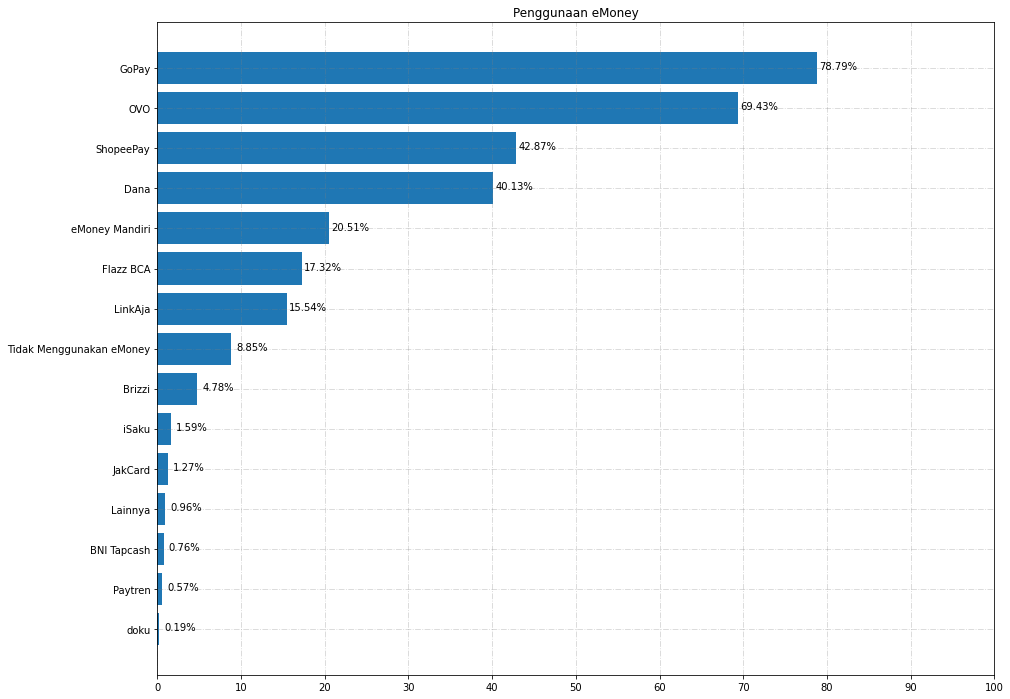

In [784]:
acc = hal4[hal4.columns[0]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print(acc.shape[0])
plt.figure(figsize=(15,12))
axx = plt.barh(array,counts)
plt.title('Penggunaan eMoney')
plt.grid(b=True,color='gray',ls='-.',alpha=0.3,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [364]:
from wordcloud import WordCloud, STOPWORDS 

In [365]:
acc = hal4[hal4.columns[1]]

string = [p for i in [re.split(',',x) for x in acc] for p in i]
comm = ''
for i in string:
    comm+= i + ' '

In [366]:
str(string).split()

["['Simple',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Tidak",
 'perlu',
 'datang',
 'ke',
 "bank',",
 "'Promo',",
 "'Aman',",
 "'Promo',",
 "'Simple',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Tidak",
 'perlu',
 'datang',
 'ke',
 "bank',",
 "'Promo',",
 "'Aman',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Tidak",
 'perlu',
 'datang',
 'ke',
 "bank',",
 "'Promo',",
 "'Aman',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Tidak",
 'perlu',
 'datang',
 'ke',
 "bank',",
 "'Promo',",
 "'Aman',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Tidak",
 'perlu',
 'datang',
 'ke',
 "bank',",
 "'Promo',",
 "'Aman',",
 "'Tidak",
 'Menggunakan',
 "eMoney',",
 "'Tidak",
 'Menggunakan',
 "eMoney',",
 "'Simple',",
 "'Efisien",
 'secara',
 "waktu',",
 "'Tidak",
 'perlu',
 'datang',
 'ke',
 "bank',",
 "'Promo',",
 "'Promo',",
 "'Simple',",
 "'Efisien",


1436


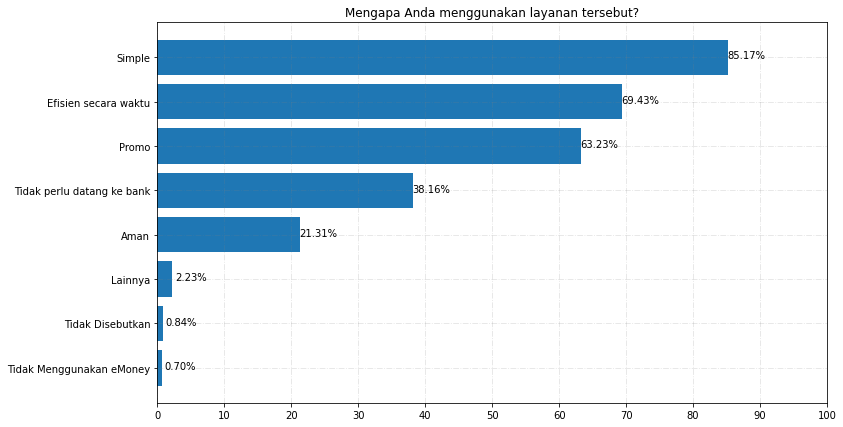

In [835]:
acc = hal4[hal4.columns[1]]
acc = acc.dropna()
acc = [x for x in acc if x!='Tidak Menggunakan eMoney']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]
print(len(acc))
plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[1])
for p in axx.patches:
    width = p.get_width()
    plt.text(2.75+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [368]:
hal4[hal4.columns[2]].unique()

array(['Pembayaran e-commerce,Lainnya',
       'Pembayaran transportasi online,Pembayaran tol,Pembayaran transportasi umum,Pembayaran tiket parkir,Pembelian delivery makanan,Pembayaran di restauran/ cafe,Pembayaran di minimarket,Pembayaran e-commerce,Pembelian pulsa',
       'Pembayaran transportasi online,Pembayaran tol,Pembayaran transportasi umum,Pembayaran tiket parkir,Pembelian delivery makanan,Pembayaran di restauran/ cafe,Pembayaran di minimarket,Pembayaran e-commerce,Pembelian pulsa,Pembayaran utilitas (PLN, PDAM, dll)',
       'Pembayaran di restauran/ cafe,Pembelian pulsa',
       'Pembelian delivery makanan',
       'Pembelian delivery makanan,Pembayaran di restauran/ cafe,Pembayaran di minimarket,Pembelian pulsa',
       'Pembayaran tol,Pembayaran transportasi umum',
       'Tidak Menggunakan eMoney',
       'Pembayaran transportasi online,Pembayaran tiket parkir,Pembelian delivery makanan,Pembelian pulsa,Pembayaran utilitas (PLN, PDAM, dll)',
       'Pembayaran e-commerce'

1440


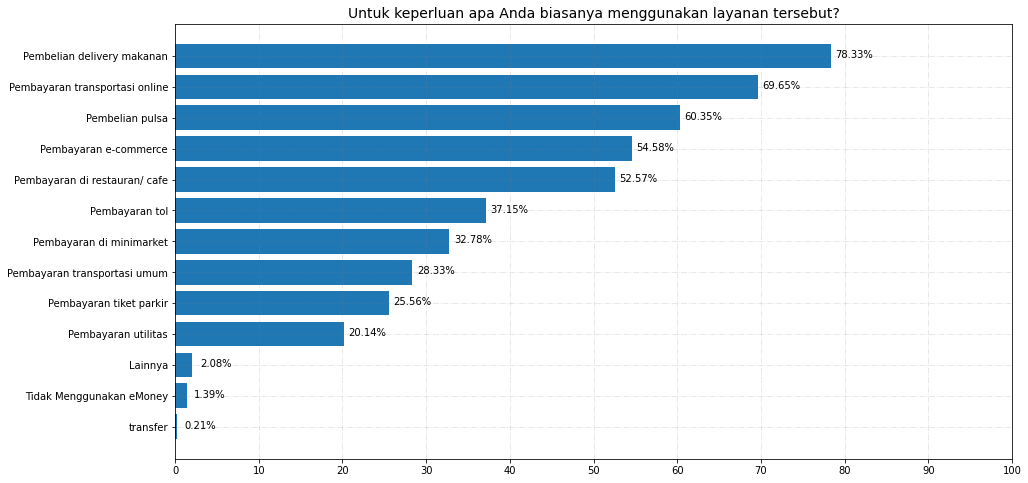

In [833]:
acc = hal4[hal4.columns[2]]
acc = [x for x in acc if x!='Tidak Menggunakan eMoney']
acc = [re.sub('(Pembayaran utilitas \(PLN, PDAM, dll\))','Pembayaran utilitas',x) for x in acc]
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [x.split(',') for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]
print(len(acc))
plt.figure(figsize=(15,8))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[2],fontsize=14)
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1434


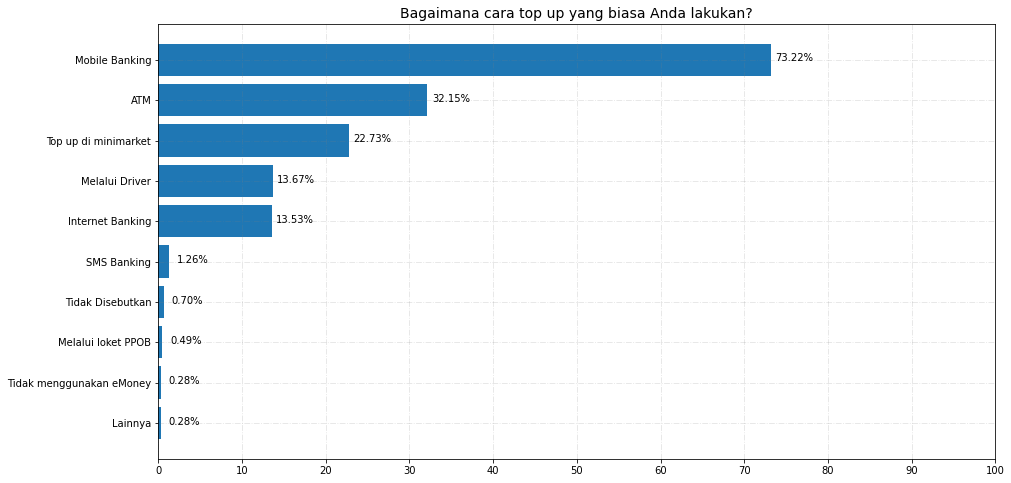

In [829]:
acc = hal4[hal4.columns[3]]
acc = [re.sub('(Pembayaran utilitas \(PLN, PDAM, dll\))','Pembayaran utilitas',x) for x in acc]
acc = [x for x in acc if x!='Tidak menggunakan eMoney']
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [x.split(',') for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]
print(len(acc))
plt.figure(figsize=(15,8))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[3],fontsize=14)
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [803]:
hal4[hal4.columns[4]].value_counts()

Rp 50.001 – Rp 100.000      532
Rp 100.001 – Rp 150.000     289
Rp 25.000 – Rp 50.000,-     235
Rp 150.001 – Rp 300.000     185
Tidak menggunakan eMoney    143
> Rp 300.000                137
< Rp 25.000,-                42
Tidak Disebutkan              7
Name: Nominal top up, dtype: int64

1427


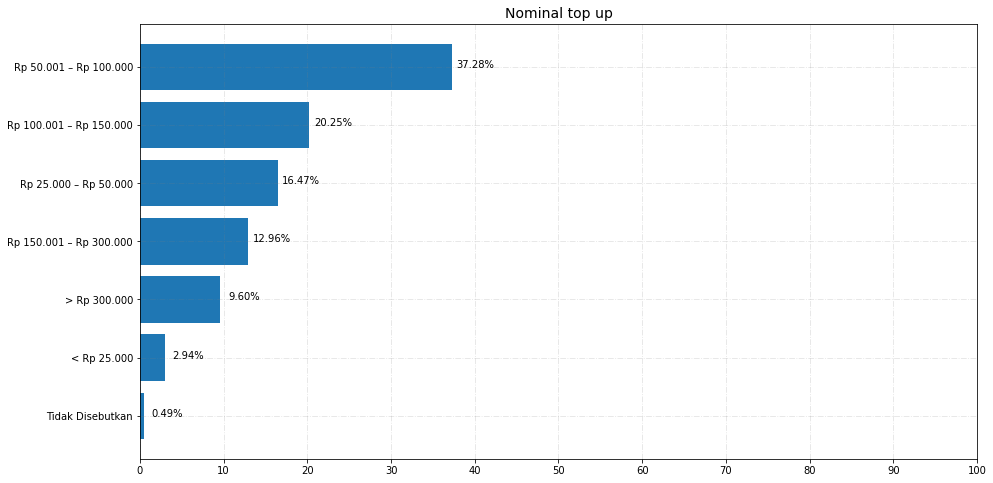

In [827]:
acc = hal4[hal4.columns[4]]
acc = [x for x in acc if x!='Tidak menggunakan eMoney']
abc =  list(set([p for i in [x.split(',') for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]

for i in range(len(array)):
    if array[i]=='-':
        array.remove(array[i])
        counts.remove(counts[i])
        break
        
plt.figure(figsize=(15,8))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[4],fontsize=14)
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1422


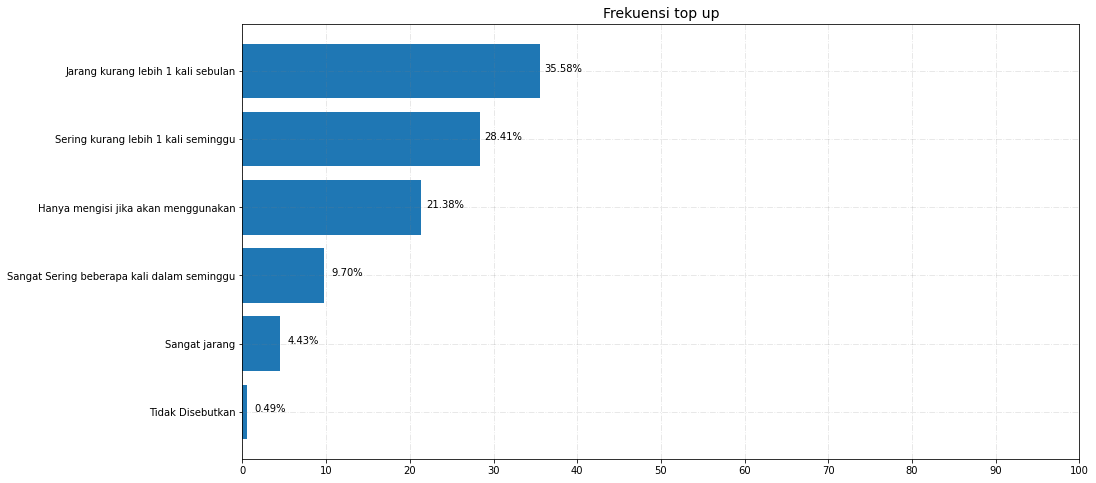

In [826]:
acc = hal4[hal4.columns[5]]
acc = [re.sub('[\(\)]','',x) for x in acc]
acc = [x for x in acc if x!='Tidak menggunakan eMoney']
abc =  list(set([p for i in [x.split(',') for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]

for i in range(len(array)):
    if array[i]=='-':
        array.remove(array[i])
        counts.remove(counts[i])
        break
        
plt.figure(figsize=(15,8))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[5],fontsize=14)
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1439


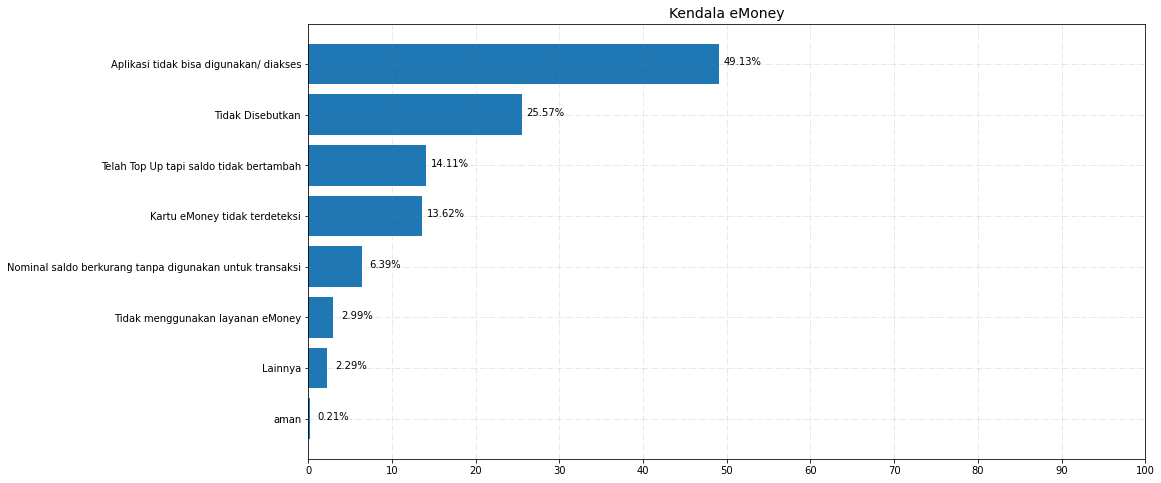

In [825]:
acc = hal4[hal4.columns[6]]
acc = [x for x in acc if x!='Tidak menggunakan eMoney']
abc =  list(set([p for i in [x.split(',') for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]

for i in range(len(array)):
    if array[i]=='-':
        array.remove(array[i])
        counts.remove(counts[i])
        break
        
plt.figure(figsize=(15,8))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[6],fontsize=14)
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1175.93


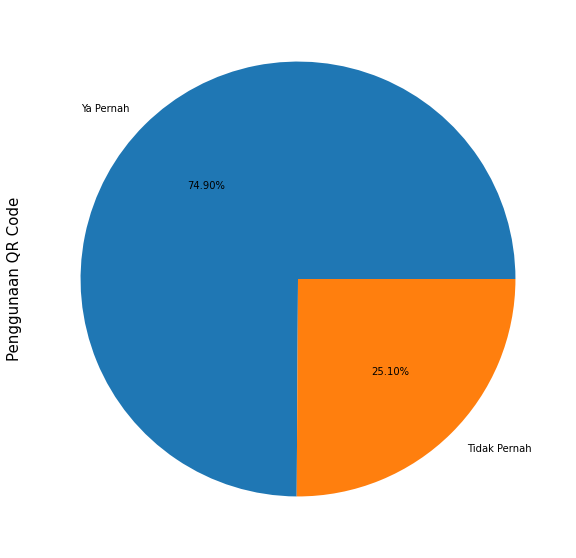

In [845]:
plt.figure(figsize=(10,10))
hal4[hal4.columns[7]].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Penggunaan QR Code',fontsize=15)
print(0.749*1570)

1243


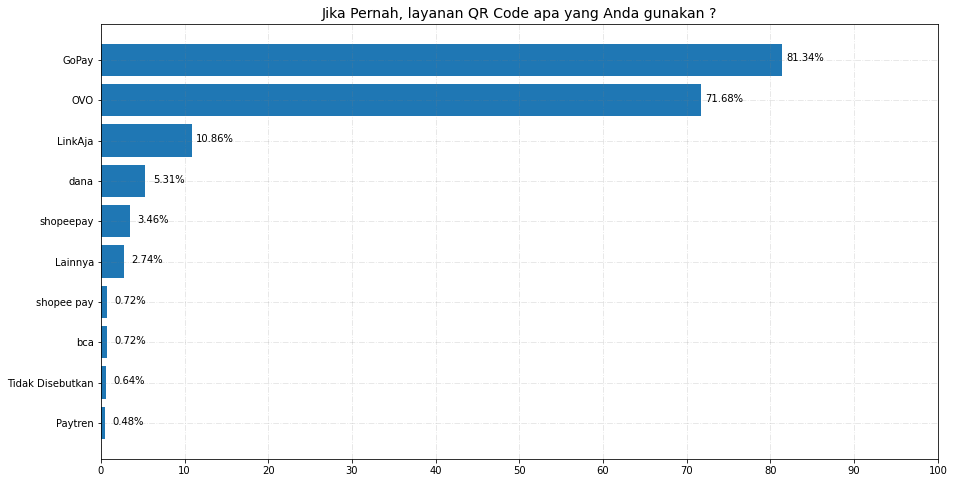

In [839]:
acc = hal4[hal4.columns[8]]
acc = [x for x in acc if x!='Tidak Pernah']
abc =  list(set([p for i in [x.split(',') for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]

for i in range(len(array)):
    if array[i]=='-':
        array.remove(array[i])
        counts.remove(counts[i])
        break
        
plt.figure(figsize=(15,8))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
plt.title(hal4.columns[8],fontsize=14)
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

## Visualisasi Halaman 5


In [392]:
hal5.columns

Index(['Frekuensi belanja 6 bulan terakhir',
       'Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modebuku & koleksi',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modepulsa',
       'Bagaimana kecenderungan 

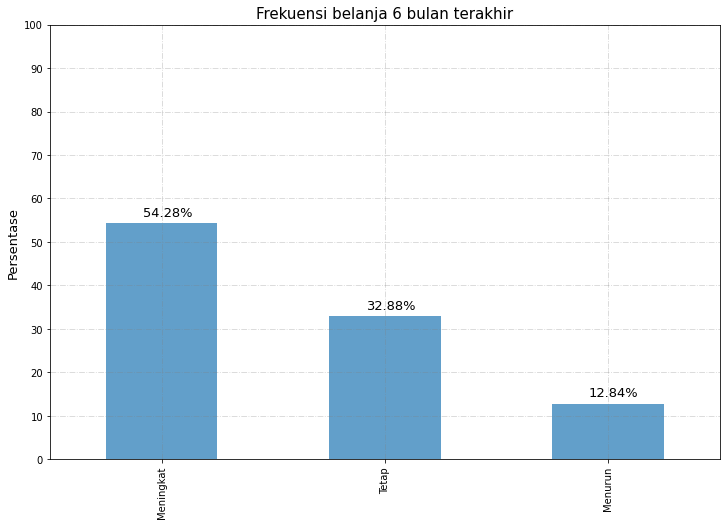

In [604]:
plt.figure(figsize=(12,8))
axx = (hal5[hal5.columns[0]].value_counts(normalize=True)*100).plot(kind='bar',alpha=0.7)
plt.title(hal5.columns[0],fontsize=15)
plt.ylabel('Persentase',fontsize=13)
plt.grid(b=True,color='gray',ls='-.',alpha=0.3,linewidth=0.9)
plt.yticks(np.arange(0,110,10))
for p in axx.patches:
    width = p.get_height()
    plt.text(p.get_x()+0.55*p.get_width(),2.5 + p.get_height(),
             '{:1.2f}%'.format(width),fontsize=13,
             ha='center', va='center')

1455
734.0474999999999


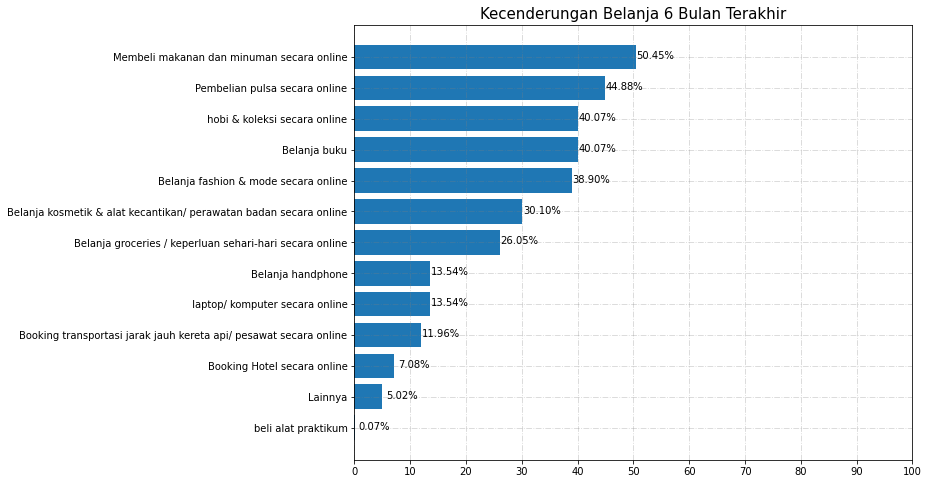

In [847]:
acc = hal5[hal5.columns[1]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print(acc.shape[0])
plt.figure(figsize=(10,8))
axx = plt.barh(array,counts)
plt.title('Kecenderungan Belanja 6 Bulan Terakhir',fontsize=15)
plt.grid(b=True,color='gray',ls='-.',alpha=0.3,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
for p in axx.patches:
    width = p.get_width()
    plt.text(3.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
print(0.5045*1455)

In [399]:
hal5.isnull().sum()

Frekuensi belanja 6 bulan terakhir                                                                               24
Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?                111
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode                                 70
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries                        82
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone                        99
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer                 109
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga    107
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik                        118
Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashio

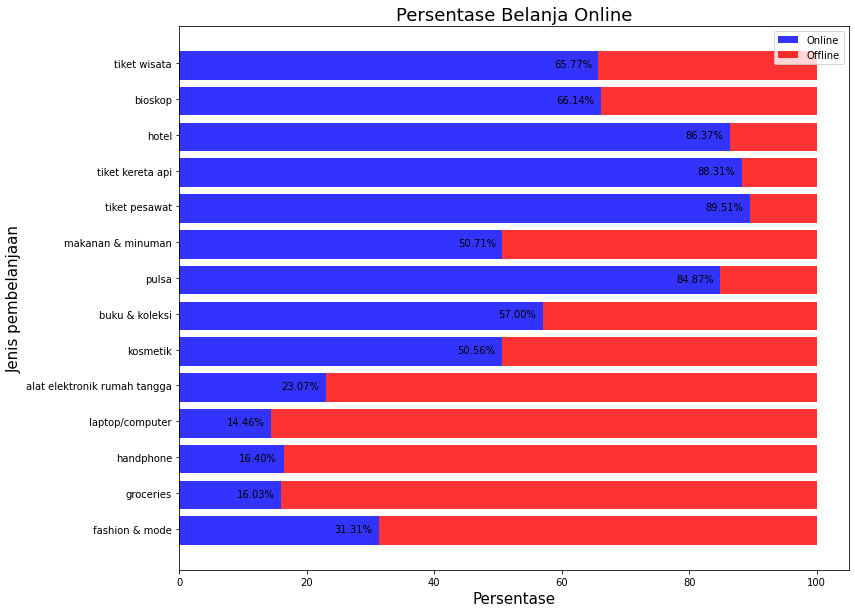

In [867]:
abc = hal5.iloc[:,np.arange(2,16)].replace('',np.nan)
abc = abc.dropna()
onlen = [round(len([1 for i in abc[x] if i=='online'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='offline/ langsung datang ke toko fisik'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

fig,ax = plt.subplots(figsize=(12,10))
bwidth = 0.3
ticks = np.arange(len(onlen))
ticks1 = [0.4 + s for s in ticks]

axx = ax.barh(ticks1,onlen,color='b',alpha=0.8,label='Online')
ax.barh(ticks1,offline,left=onlen,color='r',alpha=0.8,label='Offline')

for p in axx.patches:
    width = p.get_width()
    plt.text(-4+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
xx = ['fashion & mode','groceries','handphone','laptop/computer','alat elektronik rumah tangga'
     ,'kosmetik','buku & koleksi','pulsa','makanan & minuman','tiket pesawat','tiket kereta api'
     ,'hotel','bioskop','tiket wisata']
plt.yticks([x+bwidth/5 for x in ticks1],xx)
plt.xlabel('Persentase',fontsize=15)
plt.ylabel('Jenis pembelanjaan',fontsize=15)
plt.title('Persentase Belanja Online',fontsize=18)
plt.legend()
plt.show()


Jumlah baris valid untuk frekuensi :  1335


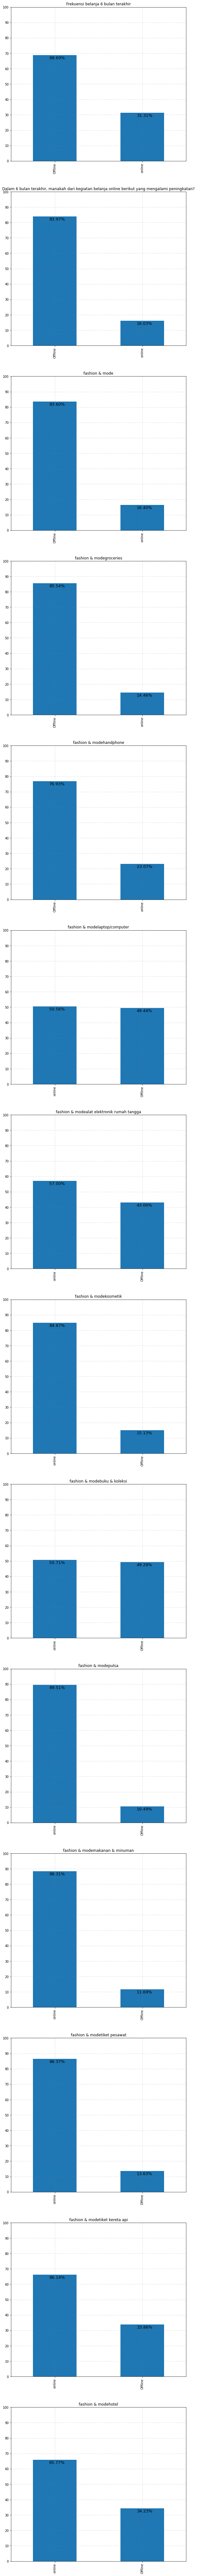

In [429]:
abx = hal5.iloc[:,np.arange(2,16)]
abx = abx.dropna()
fig,ax = plt.subplots(abx.shape[1],1,figsize=(10,150))
for i in range(abx.shape[1]):
    abx[abx.columns[i]] = [re.sub('(offline/ langsung datang ke toko fisik)','Offline',x) for x in abx[abx.columns[i]]]
    
    acc = (abx[abx.columns[i]].value_counts(normalize=True)*100).plot(kind='bar',ax=ax[i])
    acc.set_yticks(np.arange(0,110,10))
    acc.grid(b=True,color='gray',ls='-.',alpha=0.3,linewidth=0.9)
    ax[i].set_title(re.sub('Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut\?','',hal5.columns[i]))
    
    for p in acc.patches:
        width = p.get_height()
        ax[i].text( p.get_x()+0.55*p.get_width(),-1.8+p.get_height(),
            '{:1.2f}%'.format(width),fontsize=13,
             ha='center', va='center')

print('Jumlah baris valid untuk frekuensi : ',abx.shape[0])



1531


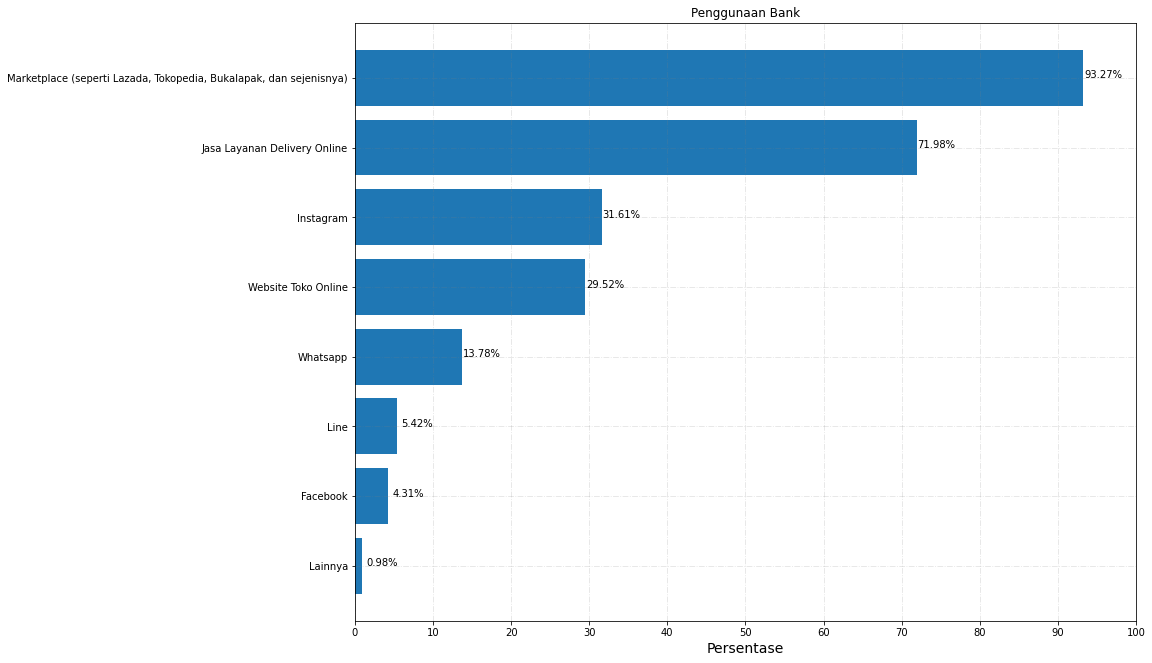

In [874]:
acc = hal5[hal5.columns[16]]
acc = acc.dropna()
acc = [re.sub('(Marketplace \(seperti Lazada, Tokopedia, Bukalapak, dan sejenisnya\))','Marketplace',x) for x in acc]
acc = [re.sub('(Jasa Layanan Delivery Online \(seperti Happyfresh, GoFood- GoJek, GoMart-Gojek, klik-eat.com dan sejenisnya\))','Jasa Layanan Delivery Online',x) for x in acc]
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(14,11))
axx = plt.barh(array,counts)
plt.title('Penggunaan Bank')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.yticks(np.arange(8),reversed(['Marketplace (seperti Lazada, Tokopedia, Bukalapak, dan sejenisnya)',
                     'Jasa Layanan Delivery Online',
                    'Instagram','Website Toko Online','Whatsapp','Line','Facebook','Lainnya']))
plt.xticks(np.arange(0,110,10))
plt.xlabel('Persentase',fontsize=14)
for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
print(len(acc))

In [449]:
hal5.columns

Index(['Frekuensi belanja 6 bulan terakhir',
       'Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modebuku & koleksi',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modepulsa',
       'Bagaimana kecenderungan 

Jumlah data valid :  1525


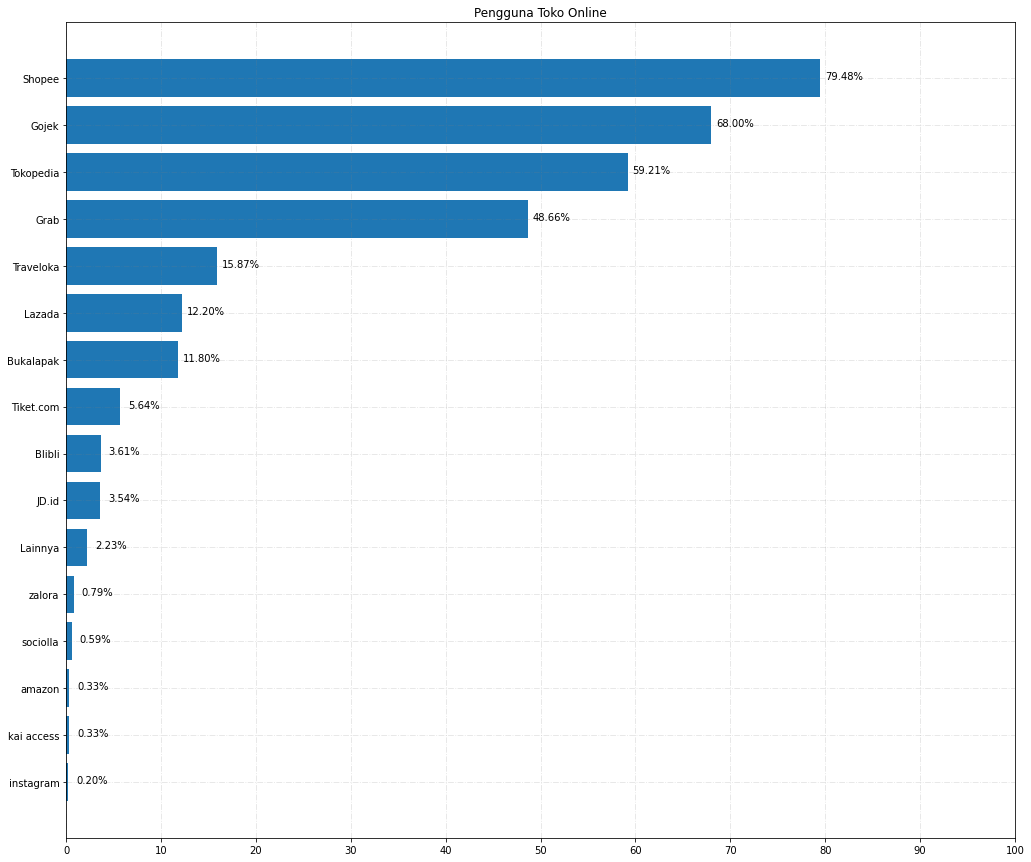

In [876]:
acc = hal5[hal5.columns[17]]
acc = acc.dropna()
acc = [re.sub('Gojek \(GoFood, GoShop, dll\)','Gojek',x) for x in acc]
acc = [re.sub('Grab \(GrabFood, Grabmart, dll\)','Grab',x) for x in acc]

print('Jumlah data valid : ',len(acc))
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(17,15))
axx = plt.barh(array,counts)
plt.title('Pengguna Toko Online')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

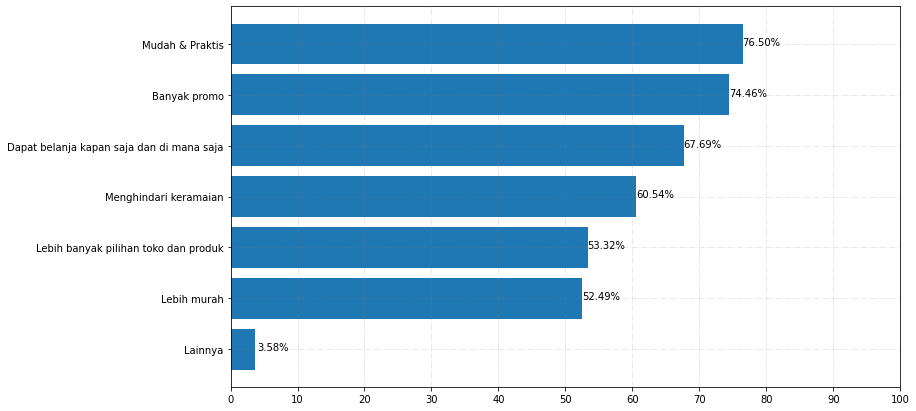

In [609]:
acc = hal5[hal5.columns[18]]
acc = acc.fillna('Lainnya')
acc = [re.sub('Menghindari keramaian \(karena COVID-19\)','Menghindari keramaian',x) for x in acc]

string = [x.split(',') for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

In [470]:
hal5.columns

Index(['Frekuensi belanja 6 bulan terakhir',
       'Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & mode',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modegroceries',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modehandphone',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modelaptop/computer',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modealat elektronik rumah tangga',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modekosmetik',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modebuku & koleksi',
       'Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut?fashion & modepulsa',
       'Bagaimana kecenderungan 

In [472]:
hal5[hal5.columns[19]]

0       Dapat memilih barang langsung,Langsung dapat m...
1       Dapat memilih barang langsung,Langsung dapat m...
2       Lebih murah,Dapat memilih barang langsung,Lang...
3       Dapat memilih barang langsung,Dapat mengecek k...
4                           Dapat memilih barang langsung
                              ...                        
1561    Dapat memilih barang langsung,Dapat mengecek k...
1562    Dapat memilih barang langsung,Langsung dapat m...
1563    Dapat memilih barang langsung,Dapat mengecek k...
1564    Langsung dapat membawa pulang barang dan mengg...
1565    Dapat memilih barang langsung,Langsung dapat m...
Name: Alasan belanja offline, Length: 1566, dtype: object

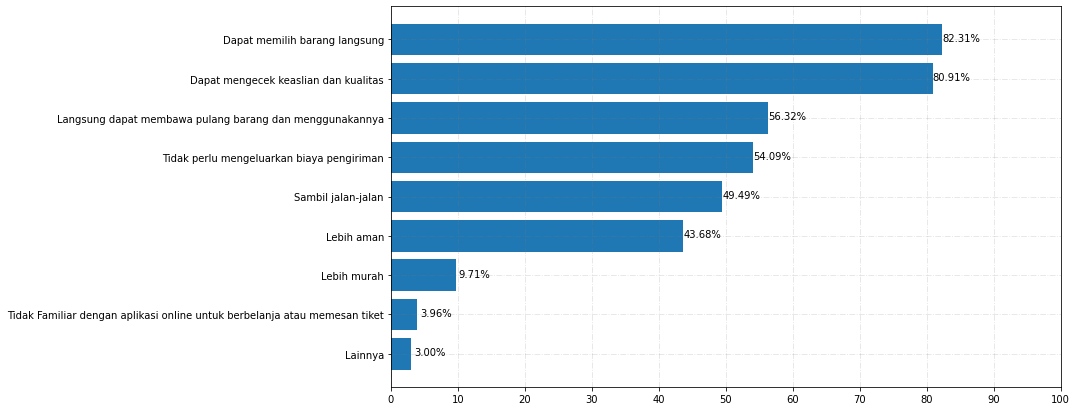

In [610]:
acc = hal5[hal5.columns[19]]
acc = acc.fillna('Lainnya')
acc = [re.sub('Menghindari keramaian \(karena COVID-19\)','Menghindari keramaian',x) for x in acc]

string = [x.split(',') for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)

counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

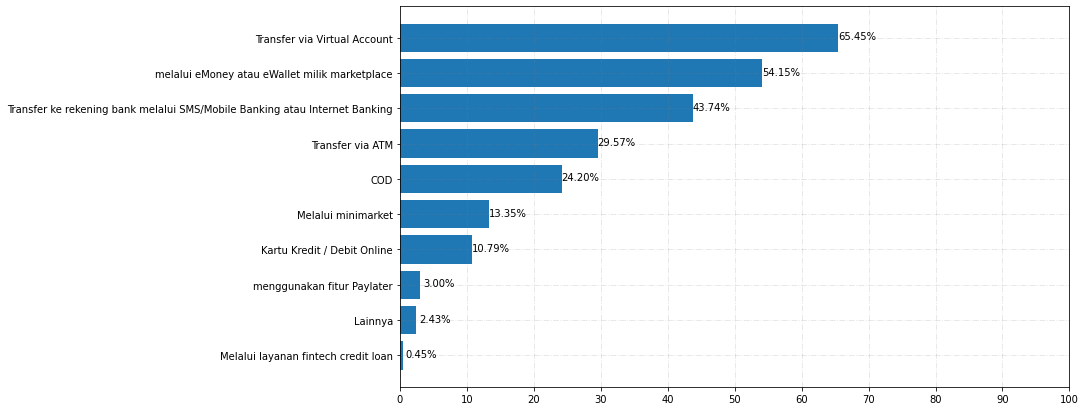

In [611]:
acc = hal5[hal5.columns[20]]
acc = acc.fillna('Lainnya')
acc = [re.sub('(COD \(Cash on Delivery\))','COD',x) for x in acc]
acc = [re.sub('(melalui eMoney atau eWallet milik marketplace \(seperti shopeepay, dana, OVO, dll\))','melalui eMoney atau eWallet milik marketplace',x) for x in acc]
acc = [re.sub('(Melalui layanan fintech credit loan \(seperti kredivo, akulaku, dll\))','Melalui layanan fintech credit loan',x) for x in acc]
string = [x.split(',') for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1317


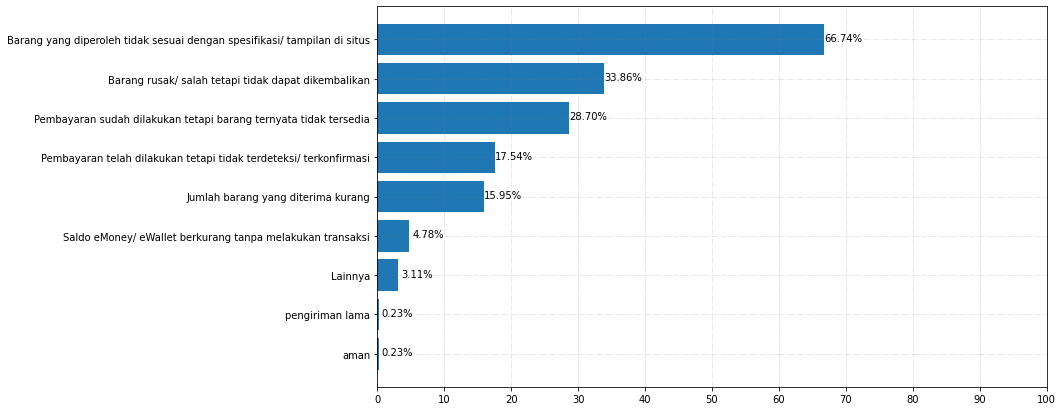

In [883]:
acc = hal5[hal5.columns[21]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1534


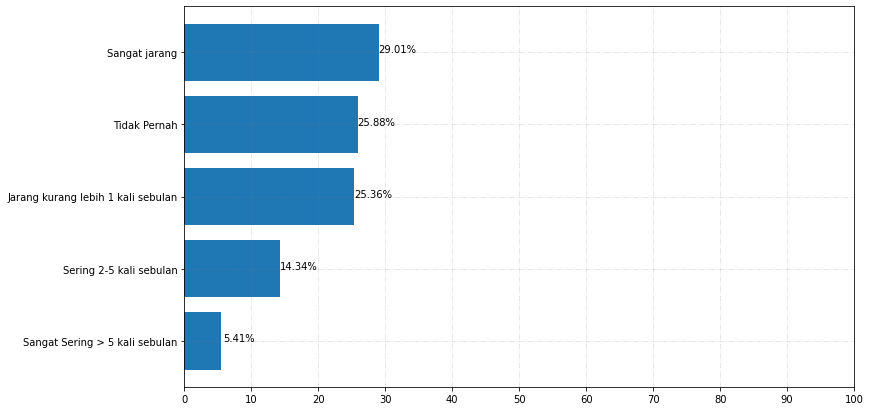

In [888]:
acc = hal5[hal5.columns[22]]
acc = acc.dropna()
acc = [re.sub('[\(\)]','',x) for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

932


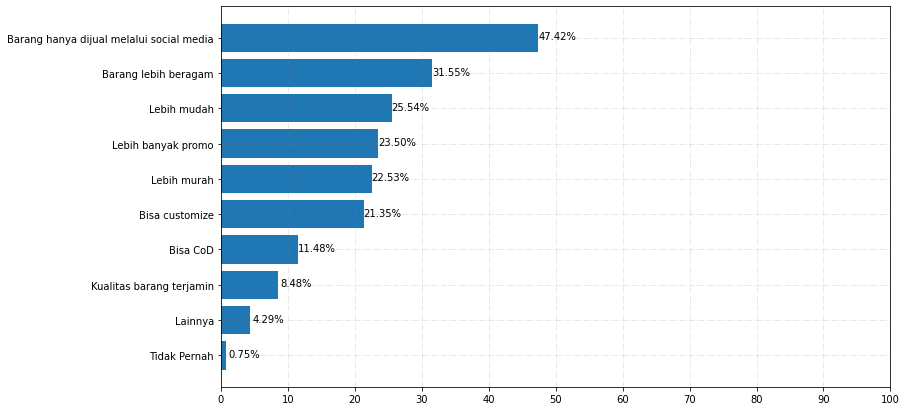

In [891]:
acc = hal5[hal5.columns[23]]
acc = acc.dropna()
acc = [x for x in acc if x!='Tidak Pernah']
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

1238


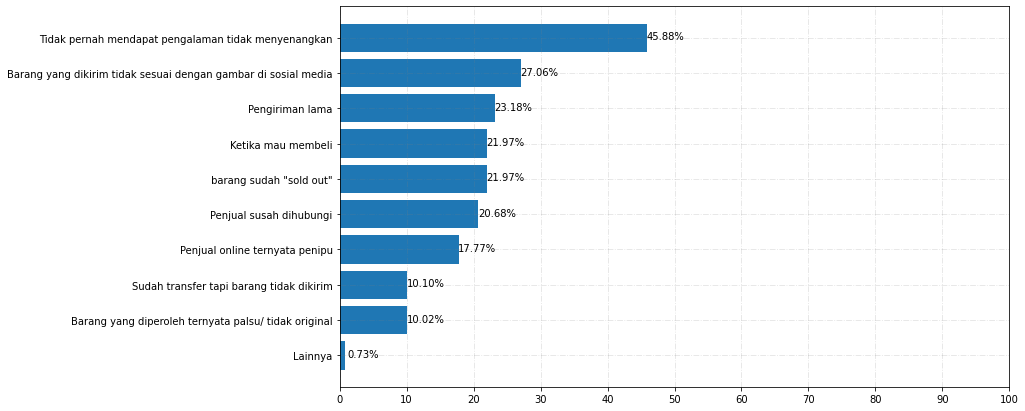

In [890]:
acc = hal5[hal5.columns[24]]
acc = acc.dropna()
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,7))
axx = plt.barh(array,counts)
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))
print(len(acc))
for p in axx.patches:
    width = p.get_width()
    plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

## Visualisasi Halaman 6

In [478]:
hal6.head()

Apakah Anda mengenal dan mengetahui istilah Fintech?  \
0                                            Ya Tahu     
1                                         Tidak Tahu     
2                                         Tidak Tahu     
3                                            Ya Tahu     
4                                         Tidak Tahu     

  Apakah Anda pernah menggunakan layanan fintech lending / yang biasa disebut pinjaman online berikut? (jawaban boleh lebih dari 1)  \
0           Tidak pernah menggunakan fintech lending                                                                                  
1           Tidak pernah menggunakan fintech lending                                                                                  
2           Tidak pernah menggunakan fintech lending                                                                                  
3           Tidak pernah menggunakan fintech lending                                                                                  
4           Tidak pernah menggunakan fintech lending                                                                                  

  Alasan mengajukan pinjaman fintech lending  \
0   Tidak pernah menggunakan fintech lending   
1   Tidak pernah menggunakan fintech lending   
2   Tidak pernah menggunakan fintech lending   
3   Tidak pernah menggunakan fintech lending   
4   Tidak pernah menggunakan fintech lending   

                          Tujuan mengajukan pinjaman  \
0           Tidak pernah menggunakan fintech lending   
1           Tidak pernah menggunakan fintech lending   
2           Tidak pernah menggunakan fintech lending   
3  Saya tidak mengajukan pinjaman, tetapi memberi...   
4  Saya tidak mengajukan pinjaman, tetapi memberi...   

                           Nominal pinjaman  \
0  Tidak pernah menggunakan fintech lending   
1  Tidak pernah menggunakan fintech lending   
2  Tidak pernah menggunakan fintech lending   
3  Tidak pernah menggunakan fintech lending   
4  Tidak pernah menggunakan fintech lending   

                       Lama proses pinjaman  \
0  Tidak pernah menggunakan fintech lending   
1  Tidak pernah menggunakan fintech lending   
2  Tidak pernah menggunakan fintech lending   
3  Tidak pernah menggunakan fintech lending   
4  Tidak pernah menggunakan fintech lending   

                             Tenor pinjaman  \
0  Tidak pernah menggunakan fintech lending   
1  Tidak pernah menggunakan fintech lending   
2  Tidak pernah menggunakan fintech lending   
3  Tidak pernah menggunakan fintech lending   
4  Tidak pernah menggunakan fintech lending   

  Apakah terdapat proses verifikasi/ peninjauan untuk pinjaman yang Anda ajukan?  \
0           Tidak pernah menggunakan fintech lending                               
1           Tidak pernah menggunakan fintech lending                               
2           Tidak pernah menggunakan fintech lending                               
3           Tidak pernah menggunakan fintech lending                               
4           Tidak pernah menggunakan fintech lending                               

  Apakah Anda pernah mengalami masalah selama mengajukan pinjaman melalui jasa fintech lending? Jika pernah, mohon sebutkan!  
0           Tidak pernah menggunakan fintech lending                                                                          
1           Tidak pernah menggunakan fintech lending                                                                          
2           Tidak pernah menggunakan fintech lending                                                                          
3           Tidak pernah menggunakan fintech lending                                                                          
4           Tidak pernah menggunakan fintech lending

Tidak Tahu    788
Ya Tahu       782
Name: Apakah Anda mengenal dan mengetahui istilah Fintech?, dtype: int64


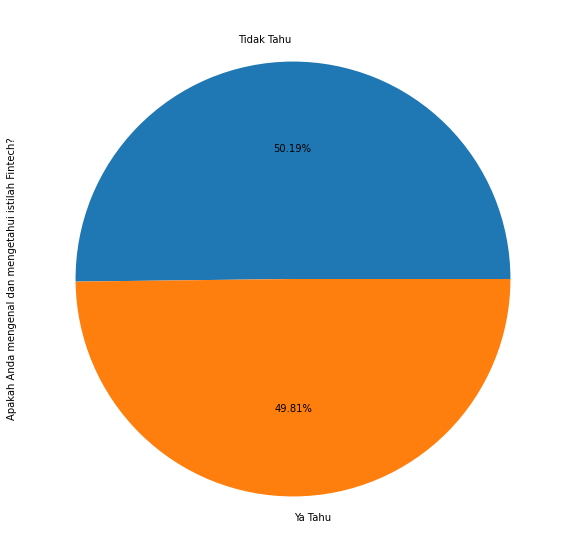

In [898]:
plt.figure(figsize=(10,10))
hal6[hal6.columns[0]].value_counts().plot(kind='pie',autopct='%.2f%%')
print(hal6[hal6.columns[0]].value_counts())

Text(0.5, 1.0, 'Apakah Anda pernah menggunakan fintech lending?')

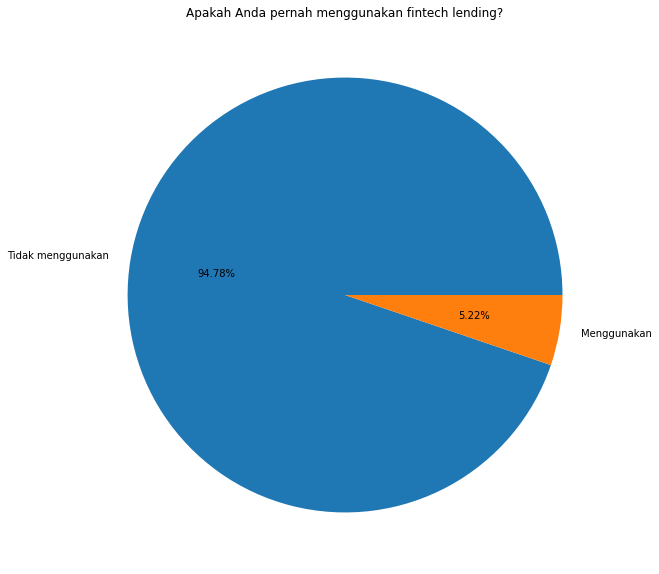

In [907]:
acc = hal6[hal6.columns[1]]
axc = len([1 for i in acc if i=='Tidak pernah menggunakan fintech lending'])
abb = [axc,acc.shape[0]-axc]
plt.figure(figsize=(10,10))
plt.pie(abb,labels=['Tidak menggunakan','Menggunakan'],autopct="%.2f%%")
plt.title('Apakah Anda pernah menggunakan fintech lending?')

82
82
210
82
82
82
82
82


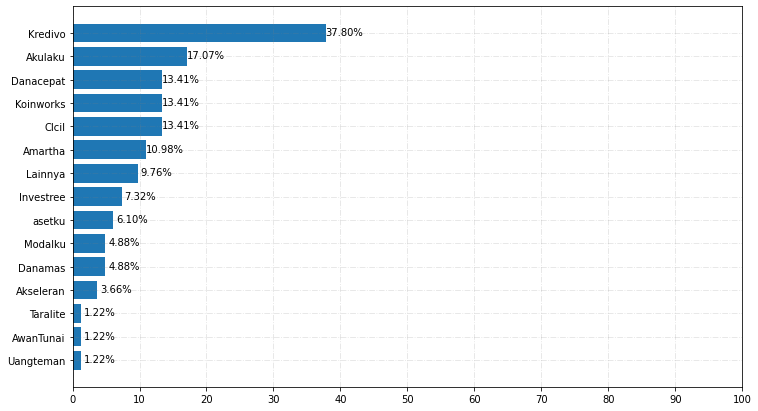

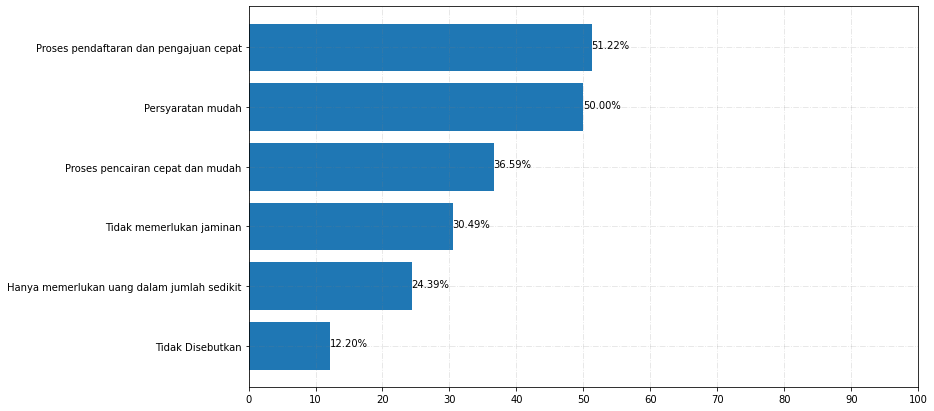

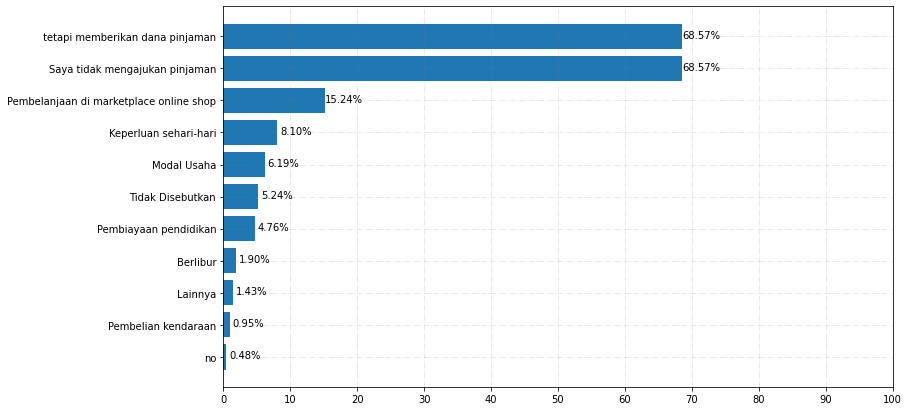

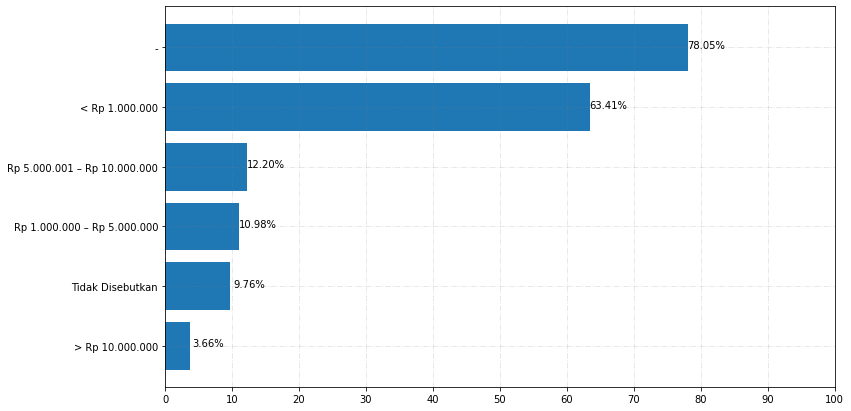

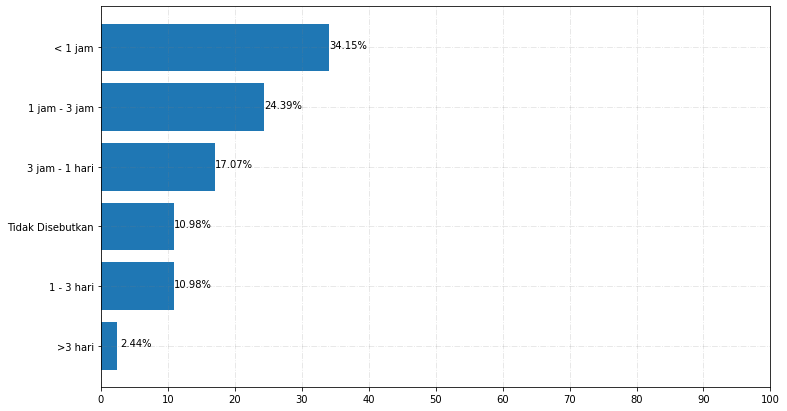

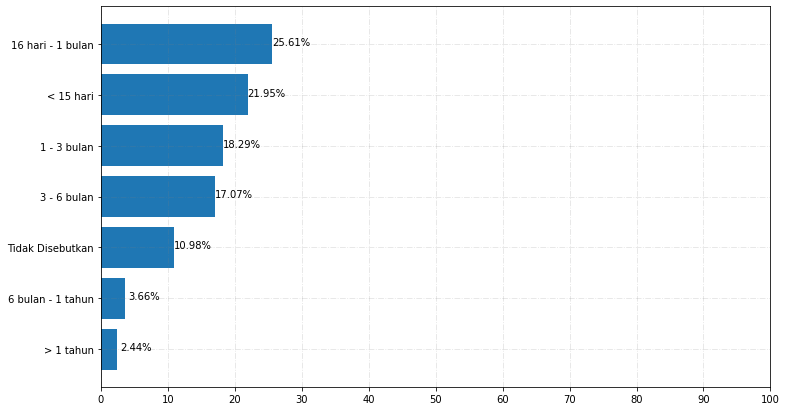

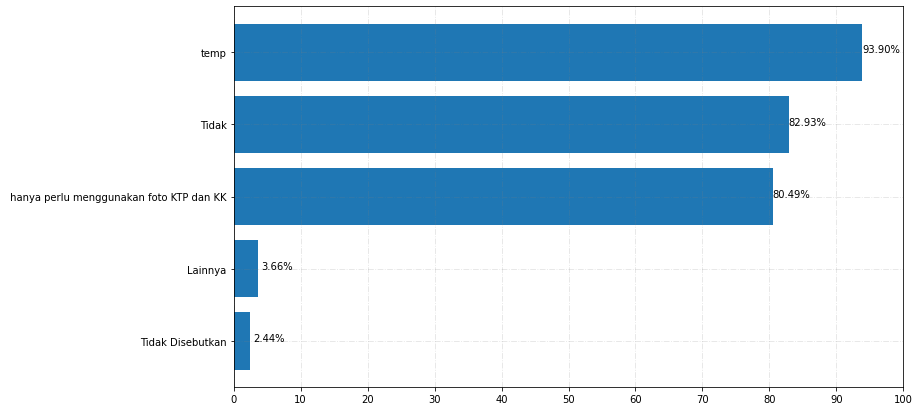

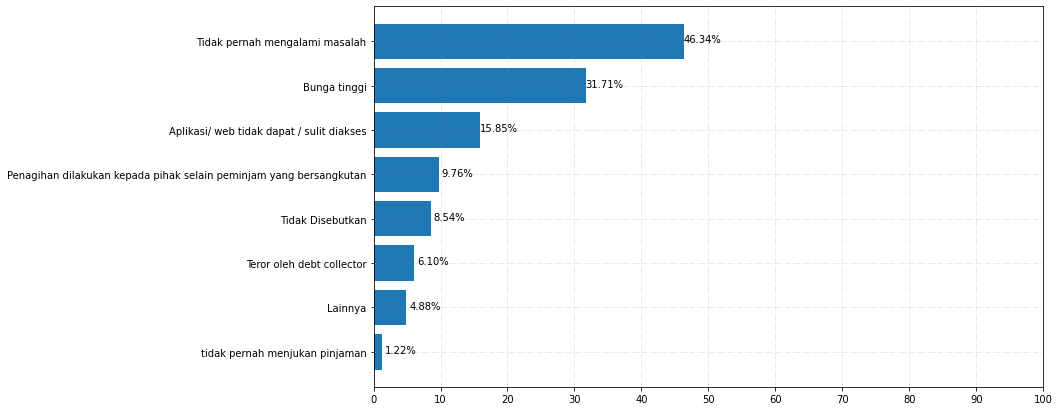

In [908]:
for i in range (1,hal6.shape[1]):
    acc = hal6[hal6.columns[i]]
    acc = acc.dropna()
    acc = [x for x in acc if x!='Tidak pernah menggunakan fintech lending']
    acc = [re.sub('[\(\)]','',x) for x in acc]
    abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
    count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
    counts = sorted(count)

    abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
    array = []
    for i in abc:
        if i not in array:
            array.append(i)
    counts = [round(x*100/len(acc),2) for x in counts]

    plt.figure(figsize=(12,7))
    axx = plt.barh(array,counts)
    plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
    plt.xticks(np.arange(0,110,10))
    print(len(acc))
    for p in axx.patches:
        width = p.get_width()
        plt.text(2.8 + p.get_width(), p.get_y()+0.55*p.get_height(),
                 '{:1.2f}%'.format(width),
                 ha='center', va='center')

## Visualisasi Halaman 7

In [501]:
hal7.head()

Apakah Anda menggunakan fintech market provisioning berikut untuk membandingkan beberapa layanan?  \
0                           Tidak pernah menggunakan                                                  
1                           Tidak pernah menggunakan                                                  
2                           Tidak pernah menggunakan                                                  
3                           Tidak pernah menggunakan                                                  
4                           Tidak pernah menggunakan                                                  

  Apakah Anda pernah meng﻿gunakan fintech untuk investasi berikut?  \
0                                            Bareksa                 
1                           Tidak pernah menggunakan                 
2                           Tidak pernah menggunakan                 
3                                              bibit                 
4                           Tidak pernah menggunakan                 

  Apakah Anda mengetahui terdapat regulasi OJK/ BI yang mengatur mengenai keberadaan fintech?  \
0                                            Ya Tahu                                            
1                                         Tidak Tahu                                            
2                                         Tidak Tahu                                            
3                                            Ya Tahu                                            
4                                         Tidak Tahu                                            

  Apakah status fintech yang terdaftar dan diawasi oleh OJK/BI menjadi salah satu pertimbangan penting bagi Anda untuk menggunakan layanan Fintech tersebut?  
0                                                 Ya                                                                                                          
1                                         Tidak Tahu                                                                                                          
2                                                 Ya                                                                                                          
3                                                 Ya                                                                                                          
4                                                 Ya

In [503]:
hal7[hal7.columns[1]].value_counts()

Tidak pernah menggunakan               1463
Bibitnomic                               33
Lainnya                                  19
Bareksa                                  18
Bareksa,Bibitnomic                        9
bibit                                     8
LiveOlive                                 4
ipot                                      3
Bareksa,Lainnya                           3
Tidak pernah menggunakan,Bibitnomic       2
Bibitnomic,ipot                           1
bibit, ipot                               1
Bareksa,LiveOlive                         1
Tidak pernah menggunakan,Bareksa          1
Name: Apakah Anda pernah meng﻿gunakan fintech untuk investasi berikut?, dtype: int64

No handles with labels found to put in legend.


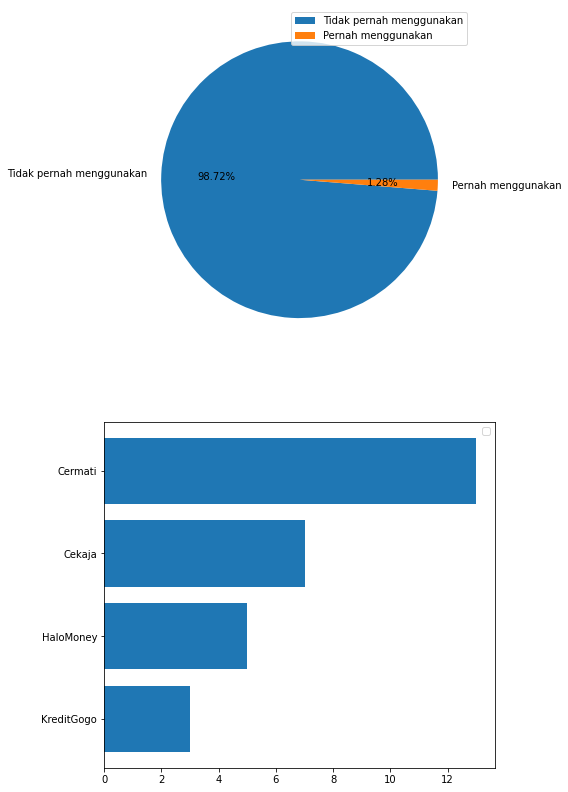

In [614]:
axx = hal7[hal7.columns[0]]
axx = [re.sub('(Tidak pernah menggunakan,)','',x) if ((len(x.split(','))>1) and (re.search('(Tidak pernah menggunakan)',x))) else x for x in axx]

array = [x if x=='Tidak pernah menggunakan' else 'Pernah menggunakan' for x in axx]
setarray = list(set(array))
count1 = [len([1 for x in axx if x=='Tidak pernah menggunakan']),len(axx)-len([1 for x in axx if x=='Tidak pernah menggunakan'])]

acc = hal7[hal7.columns[0]]
string = [x.split(',') for x in acc]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
abc = [x for x in abc if x!='Tidak pernah menggunakan']
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)



fig,ax = plt.subplots(2,1,figsize=(7,14))
ax[0].pie(count1,labels=sorted(setarray,reverse=True),autopct='%.2f%%')
ax[1].barh(array,counts)

ax[0].legend()
ax[1].legend()

In [515]:
count

[1546, 20]

## Estimasi Statistik

In [238]:
from math import*
import scipy.stats as st
from scipy.stats import t

In [239]:
def t_val(alpha,df):
    return abs(t.ppf(1 - alpha, df-1))
def z_val(alpha):
    return abs(st.norm.ppf(alpha))

### Akan dicari 95% dan 99% confidence interval dari:

In [297]:
def conf_prop_1way(n,p,alpha):
    q=1-p
    
    zval = z_val(alpha)
    
    se = zval*sqrt(p*q/n)
    BA = p + se
    BB = p - se
    
    return [BB,BA]

def conf_prop_2way(n,p,alpha):
    q=1-p
    
    zval = z_val(alpha/2)
    
    se = zval*sqrt(p*q/n)
    BA = p + se
    BB = p - se
    
    return [BB,BA]

def conf_2prop_1way(n,p1,p2,alpha):
    q1 = 1-p1
    q1 = 1-p2
    
    zval = z_val(alpha)
    
    se = zval*sqrt((p1*q1/n1) + (p2*q2/n2))
    
    BA = (p1-p2) + se
    BB = (p1-p2) - se
    
    return [BB,BA]

def conf_2prop_1way(n,p1,p2,alpha):
    q1 = 1-p1
    q1 = 1-p2
    
    zval = z_val(alpha/2)
    
    se = zval*sqrt((p1*q1/n1) + (p2*q2/n2))
    
    BA = (p1-p2) + se
    BB = (p1-p2) - se
    
    return [BB,BA]

## Halaman 2

In [937]:
for i in range(hal2.shape[1]):
    print(i,hal2.columns[i])

0 Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?
1 Rata-rata durasi menggunakan internet Aktif tiap hari ?
2 Akses atau provider internet yang digunakan selama ini?
3 Nama Provider
4 Pengeluaran Mobile Data
5 Pengeluaran Broadband
6 Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?
7 Frekuensi berbelanja Online
8 Frekuensi Streaming video/ film
9 Frekuensi Melakukan video conference
10 Frekuensi Delivery Makanan
11 Frekuensi Mengikuti kelas olahraga secara online
12 Frekuensi Mengikuti kelas online
13 Frekuensi Akses media sosial
14 Frekuensi Game online
15 Frekuensi Menonton e-sport
16 Frekuensi Membeli obat-obatan secara online
17 FrekuensiMelakukan konsultasi kesehatan secara online
18 Bekerja / belajar
19 Meeting
20 Mengikuti workshop/ seminar
21 Menonton film
22 Menonton konser
23 Family/ social gathering
24 Konsultasi masalah kesehatan
25 Media komunikasi yang paling sering digunakan untuk Work From Home/ School From Home ?
26 Apli

## Confidence interval kecenderungan beraktivitas online

In [968]:
#Sampel 30 dulu cuy
A = hal2.iloc[:,np.arange(18,25)].replace('',np.nan)
A = A.dropna()
abc = A.sample(30,random_state=1)
abc = abc.dropna()
onlen = [round(len([1 for i in abc[x] if i=='Online/ Virtual'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='Offline (dengan protokol COVID-19)'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

pd.DataFrame({
    'Offline' : offline,
    "Online" : onlen
},index=A.columns)

Offline  Online
Bekerja / belajar               20.00   80.00
Meeting                          6.67   93.33
Mengikuti workshop/ seminar      3.33   96.67
Menonton film                    0.00  100.00
Menonton konser                  0.00  100.00
Family/ social gathering        53.33   46.67
Konsultasi masalah kesehatan    40.00   60.00

In [1064]:
print('Confidence interval 95%')
arr = []
for i in range(len(onlen)):
    arr.append(conf_prop_2way(abc.shape[0],onlen[i]/100,0.05))


pd.DataFrame(arr,columns=['BB','BA'],index=abc.columns)

Confidence interval 95%


BB        BA
Bekerja / belajar             0.804086  0.935914
Meeting                       0.921593  0.998407
Mengikuti workshop/ seminar   0.936566  1.003434
Menonton film                 0.970499  1.009501
Menonton konser               0.921593  0.998407
Family/ social gathering      0.294403  0.485597
Konsultasi masalah kesehatan  0.503982  0.696018

In [1046]:
#Sampel 30 dulu cuy
A = hal2.iloc[:,np.arange(18,25)].replace('',np.nan)
A = A.dropna()
abc = A.sample(100,random_state=1)
abc = abc.dropna()
onlen = [round(len([1 for i in abc[x] if i=='Online/ Virtual'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='Offline (dengan protokol COVID-19)'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

pd.DataFrame({
    'Offline' : offline,
    "Online" : onlen
},index=A.columns)

Offline  Online
Bekerja / belajar                13.0    87.0
Meeting                           4.0    96.0
Mengikuti workshop/ seminar       3.0    97.0
Menonton film                     1.0    99.0
Menonton konser                   4.0    96.0
Family/ social gathering         61.0    39.0
Konsultasi masalah kesehatan     40.0    60.0

In [1062]:
print('Confidence interval 95%')
arr = []
for i in range(len(onlen)):
    arr.append(conf_prop_2way(abc.shape[0],onlen[i]/100,0.05))


pd.DataFrame(arr,columns=['BB','BA'],index=abc.columns)

Confidence interval 95%


BB        BA
Bekerja / belajar             0.804086  0.935914
Meeting                       0.921593  0.998407
Mengikuti workshop/ seminar   0.936566  1.003434
Menonton film                 0.970499  1.009501
Menonton konser               0.921593  0.998407
Family/ social gathering      0.294403  0.485597
Konsultasi masalah kesehatan  0.503982  0.696018

In [1057]:
arr

[[0.8040857380667502, 0.9359142619332498],
 [0.9215927065891575, 0.9984072934108424],
 [0.9365655190436282, 1.0034344809563718],
 [0.9704986045820121, 1.009501395417988],
 [0.9215927065891575, 0.9984072934108424],
 [0.29440276921149167, 0.48559723078850836],
 [0.5039817664728937, 0.6960182335271062]]

In [1107]:
#Sampel 30 dulu cuy
A = hal2.iloc[:,np.arange(18,25)].replace('',np.nan)
print(A.shape)
abc = A.dropna()
print(abc.shape)
onlen = [round(len([1 for i in abc[x] if i=='Online/ Virtual'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='Offline (dengan protokol COVID-19)'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

pd.DataFrame({
    'Offline' : offline,
    "Online" : onlen
},index=A.columns)

(1570, 7)
(1296, 7)


Offline  Online
Bekerja / belajar               12.35   87.65
Meeting                          8.41   91.59
Mengikuti workshop/ seminar      4.94   95.06
Menonton film                    4.09   95.91
Menonton konser                  6.79   93.21
Family/ social gathering        56.25   43.75
Konsultasi masalah kesehatan    46.84   53.16

In [1108]:
print('Confidence interval 95%')
arr = []
for i in range(len(onlen)):
    arr.append(conf_prop_2way(abc.shape[0],onlen[i]/100,0.05))


pd.DataFrame(arr,columns=['BB','BA'],index=abc.columns)

Confidence interval 95%


BB        BA
Bekerja / belajar             0.858588  0.894412
Meeting                       0.900790  0.931010
Mengikuti workshop/ seminar   0.938802  0.962398
Menonton film                 0.948317  0.969883
Menonton konser               0.918403  0.945797
Family/ social gathering      0.410492  0.464508
Konsultasi masalah kesehatan  0.504433  0.558767

## Confidence interval pengguna aplikasi WFH
### ini buat sampel 30,100, sama seluruh data secara berurutan

In [1109]:
# n = 30
A = hal2[hal2.columns[26]]
A = A.dropna()
acc = A.sample(30,random_state=1)
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print('jumlah data : ',acc.shape[0])

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

jumlah data :  30


Kategori  Persentase
0        Whatsapp       90.00
1            Zoom       86.67
2     Google Meet       80.00
3  Microsoft Team       53.33
4     Cisco Webex        6.67
5         Lainnya        6.67
6           slack        3.33

In [1110]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Whatsapp           0.792648    1.007352
Zoom               0.745071    0.988329
Google Meet        0.656864    0.943136
Microsoft Team     0.354778    0.711822
Cisco Webex       -0.022581    0.155981
Lainnya           -0.022581    0.155981
slack             -0.030903    0.097503

In [1068]:
# n = 100
A = hal2[hal2.columns[26]]
A = A.dropna()
acc = A.sample(100,random_state=1)
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print('jumlah data : ',acc.shape[0])

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

jumlah data :  100


Kategori  Persentase
0                Zoom        86.0
1            Whatsapp        69.0
2         Google Meet        68.0
3      Microsoft Team        52.0
4             Lainnya        10.0
5         Cisco Webex         6.0
6  Skype for Business         2.0
7                line         2.0
8               slack         1.0

In [1069]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Zoom                   0.791992    0.928008
Whatsapp               0.599353    0.780647
Google Meet            0.588572    0.771428
Microsoft Team         0.422080    0.617920
Lainnya                0.041201    0.158799
Cisco Webex            0.013453    0.106547
Skype for Business    -0.007439    0.047439
line                  -0.007439    0.047439
slack                 -0.009501    0.029501

In [1070]:
# n = A
A = hal2[hal2.columns[26]]
acc = A.dropna()
print(acc.shape[0])
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]
print('jumlah data : ',acc.shape[0])

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

1563
jumlah data :  1563


Kategori  Persentase
0                 Zoom       86.82
1          Google Meet       74.47
2             Whatsapp       69.93
3       Microsoft Team       55.98
4              Lainnya        5.69
5          Cisco Webex        5.25
6                 line        3.33
7   Skype for Business        2.50
8     google classroom        1.60
9              discord        1.02
10               slack        0.45
11             youtube        0.45
12         GoToMeeting        0.38

In [1071]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Zoom                   0.851430    0.884970
Google Meet            0.723084    0.766316
Whatsapp               0.676566    0.722034
Microsoft Team         0.535190    0.584410
Lainnya                0.045416    0.068384
Cisco Webex            0.041443    0.063557
line                   0.024405    0.042195
Skype for Business     0.017260    0.032740
google classroom       0.009779    0.022221
discord                0.005219    0.015181
slack                  0.001182    0.007818
youtube                0.001182    0.007818
GoToMeeting            0.000750    0.006850

## Confidence interval pengguna eMoney
### n=30,n=100,n=jml data

In [1111]:
print('n=30')
A = hal4[hal4.columns[0]]
A = A.dropna()
acc = A.sample(30,random_state=1)
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print('Jumlah data valid : ',acc.shape[0])
abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

for i in range(len(array)):
    if array[i]=='Tidak Menggunakan eMoney':
        array.remove(array[i])
        counts.remove(counts[i])
        break
pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

n=30
Jumlah data valid :  30


Kategori  Persentase
0           GoPay       83.33
1             OVO       70.00
2            Dana       60.00
3       ShopeePay       53.33
4         LinkAja       23.33
5       Flazz BCA       20.00
6  eMoney Mandiri       20.00
7     BNI Tapcash        3.33
8         JakCard        3.33

In [1112]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
GoPay              0.699931    0.966669
OVO                0.536018    0.863982
Dana               0.424695    0.775305
ShopeePay          0.354778    0.711822
LinkAja            0.081959    0.384641
Flazz BCA          0.056864    0.343136
eMoney Mandiri     0.056864    0.343136
BNI Tapcash       -0.030903    0.097503
JakCard           -0.030903    0.097503

In [1113]:
print('n=100')
A = hal4[hal4.columns[0]]
A = A.dropna()
acc = A.sample(100,random_state=1)
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print('Jumlah data valid : ',acc.shape[0])
abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

for i in range(len(array)):
    if array[i]=='Tidak Menggunakan eMoney':
        array.remove(array[i])
        counts.remove(counts[i])
        break
pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

n=100
Jumlah data valid :  100


Kategori  Persentase
0            GoPay        82.0
1              OVO        70.0
2             Dana        44.0
3        ShopeePay        43.0
4        Flazz BCA        22.0
5          LinkAja        22.0
6   eMoney Mandiri        19.0
7           Brizzi         5.0
8      BNI Tapcash         2.0
9          Paytren         1.0
10         JakCard         1.0

In [1114]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
GoPay              0.744701    0.895299
OVO                0.610183    0.789817
Dana               0.342710    0.537290
ShopeePay          0.332967    0.527033
Flazz BCA          0.138809    0.301191
LinkAja            0.138809    0.301191
eMoney Mandiri     0.113110    0.266890
Brizzi             0.007284    0.092716
BNI Tapcash       -0.007439    0.047439
Paytren           -0.009501    0.029501
JakCard           -0.009501    0.029501

In [1115]:
A = hal4[hal4.columns[0]]
acc = A.dropna()
print('n : ', acc.shape[0])
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print('Jumlah data valid : ',acc.shape[0])
abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

for i in range(len(array)):
    if array[i]=='Tidak Menggunakan eMoney':
        array.remove(array[i])
        counts.remove(counts[i])
        break
pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

n :  1570
Jumlah data valid :  1570


Kategori  Persentase
0            GoPay       78.79
1              OVO       69.43
2        ShopeePay       42.87
3             Dana       40.13
4   eMoney Mandiri       20.51
5        Flazz BCA       17.32
6          LinkAja       15.54
7           Brizzi        4.78
8            iSaku        1.59
9          JakCard        1.27
10         Lainnya        0.96
11     BNI Tapcash        0.76
12         Paytren        0.57
13            doku        0.19

In [1116]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
GoPay              0.767679    0.808121
OVO                0.671511    0.717089
ShopeePay          0.404220    0.453180
Dana               0.377054    0.425546
eMoney Mandiri     0.185127    0.225073
Flazz BCA          0.154481    0.191919
LinkAja            0.137480    0.173320
Brizzi             0.037247    0.058353
iSaku              0.009712    0.022088
JakCard            0.007161    0.018239
Lainnya            0.004777    0.014423
BNI Tapcash        0.003304    0.011896
Paytren            0.001976    0.009424
doku              -0.000254    0.004054

## Peningkatan Belanja Online

In [1117]:
hal5.columns[1]

'Dalam 6 bulan terakhir, manakah dari kegiatan belanja online berikut yang mengalami peningkatan?'

In [1089]:
A = hal5[hal5.columns[1]]
A = A.dropna()
acc = A.sample(30,random_state=1)
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print('Jumlah data valid : ',acc.shape[0])

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

Jumlah data valid :  30


Kategori  Persentase
0                        hobi & koleksi secara online       36.67
1                                        Belanja buku       36.67
2                       Pembelian pulsa secara online       33.33
3           Membeli makanan dan minuman secara online       33.33
4                Belanja fashion & mode secara online       33.33
5   Belanja groceries / keperluan sehari-hari seca...       33.33
6   Belanja kosmetik & alat kecantikan/ perawatan ...       23.33
7   Booking transportasi jarak jauh kereta api/ pe...       16.67
8                                   Belanja handphone       10.00
9                      laptop/ komputer secara online       10.00
10                                            Lainnya       10.00
11                        Booking Hotel secara online        6.67

In [1090]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
 hobi & koleksi secara online                          0.194256    0.539144
Belanja buku                                           0.194256    0.539144
Pembelian pulsa secara online                          0.164617    0.501983
Membeli makanan dan minuman secara online              0.164617    0.501983
Belanja fashion & mode secara online                   0.164617    0.501983
Belanja groceries / keperluan sehari-hari secar...     0.164617    0.501983
Belanja kosmetik & alat kecantikan/ perawatan b...     0.081959    0.384641
Booking transportasi jarak jauh kereta api/ pes...     0.033331    0.300069
Belanja handphone                                     -0.007352    0.207352
 laptop/ komputer secara online                       -0.007352    0.207352
Lainnya                                               -0.007352    0.207352
Booking Hotel secara online                           -0.022581    0.155981

In [1091]:
A = hal5[hal5.columns[1]]
A = A.dropna()
acc = A.sample(100,random_state=1)
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print('Jumlah data valid : ',acc.shape[0])

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

Jumlah data valid :  100


Kategori  Persentase
0           Membeli makanan dan minuman secara online        51.0
1                Belanja fashion & mode secara online        50.0
2                       Pembelian pulsa secara online        46.0
3                        hobi & koleksi secara online        44.0
4                                        Belanja buku        44.0
5   Belanja kosmetik & alat kecantikan/ perawatan ...        30.0
6   Belanja groceries / keperluan sehari-hari seca...        27.0
7                                   Belanja handphone        15.0
8                      laptop/ komputer secara online        15.0
9   Booking transportasi jarak jauh kereta api/ pe...        13.0
10                        Booking Hotel secara online         7.0
11                                            Lainnya         6.0

In [1092]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Membeli makanan dan minuman secara online              0.412021    0.607979
Belanja fashion & mode secara online                   0.402002    0.597998
Pembelian pulsa secara online                          0.362316    0.557684
 hobi & koleksi secara online                          0.342710    0.537290
Belanja buku                                           0.342710    0.537290
Belanja kosmetik & alat kecantikan/ perawatan b...     0.210183    0.389817
Belanja groceries / keperluan sehari-hari secar...     0.182986    0.357014
Belanja handphone                                      0.080015    0.219985
 laptop/ komputer secara online                        0.080015    0.219985
Booking transportasi jarak jauh kereta api/ pes...     0.064086    0.195914
Booking Hotel secara online                            0.019992    0.120008
Lainnya                                                0.013453    0.106547

In [1093]:
acc = hal5[hal5.columns[1]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)
print('Jumlah data valid : ',acc.shape[0])

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/acc.shape[0],2) for x in counts]

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})

Jumlah data valid :  1455


Kategori  Persentase
0           Membeli makanan dan minuman secara online       50.45
1                       Pembelian pulsa secara online       44.88
2                        hobi & koleksi secara online       40.07
3                                        Belanja buku       40.07
4                Belanja fashion & mode secara online       38.90
5   Belanja kosmetik & alat kecantikan/ perawatan ...       30.10
6   Belanja groceries / keperluan sehari-hari seca...       26.05
7                                   Belanja handphone       13.54
8                      laptop/ komputer secara online       13.54
9   Booking transportasi jarak jauh kereta api/ pe...       11.96
10                        Booking Hotel secara online        7.08
11                                            Lainnya        5.02
12                                beli alat praktikum        0.07

In [1094]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(acc.shape[0],counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Membeli makanan dan minuman secara online              0.478810    0.530190
Pembelian pulsa secara online                          0.423244    0.474356
 hobi & koleksi secara online                          0.375520    0.425880
Belanja buku                                           0.375520    0.425880
Belanja fashion & mode secara online                   0.363950    0.414050
Belanja kosmetik & alat kecantikan/ perawatan b...     0.277431    0.324569
Belanja groceries / keperluan sehari-hari secar...     0.237948    0.283052
Belanja handphone                                      0.117819    0.152981
 laptop/ komputer secara online                        0.117819    0.152981
Booking transportasi jarak jauh kereta api/ pes...     0.102927    0.136273
Booking Hotel secara online                            0.057621    0.083979
Lainnya                                                0.038980    0.061420
beli alat praktikum                                   -0.000659    0.002059

##  Kecenderungan Belanja Online

In [1128]:
A = hal5.iloc[:,np.arange(2,16)].replace('',np.nan)
A = A.dropna()
abc = A.sample(30,random_state=1)
onlen = [round(len([1 for i in abc[x] if i=='online'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='offline/ langsung datang ke toko fisik'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

xx = ['fashion & mode','groceries','handphone','laptop/computer','alat elektronik rumah tangga'
     ,'kosmetik','buku & koleksi','pulsa','makanan & minuman','tiket pesawat','tiket kereta api'
     ,'hotel','bioskop','tiket wisata']
print(abc.shape)

pd.DataFrame({
    'Kategori ' : xx,
    'Persentase' : onlen
})

(30, 14)


Kategori   Persentase
0                 fashion & mode       30.00
1                      groceries       10.00
2                      handphone       16.67
3                laptop/computer        6.67
4   alat elektronik rumah tangga       20.00
5                       kosmetik       56.67
6                 buku & koleksi       53.33
7                          pulsa       93.33
8              makanan & minuman       50.00
9                  tiket pesawat       96.67
10              tiket kereta api       96.67
11                         hotel       96.67
12                       bioskop       73.33
13                  tiket wisata       80.00

In [1100]:
print('Confidence interval 95%')
arr = []
for i in range(len(onlen)):
    arr.append(conf_prop_2way(abc.shape[0],onlen[i]/100,0.05))


pd.DataFrame(arr,columns=['BB','BA'],index=xx)

Confidence interval 95%


BB        BA
fashion & mode                0.136018  0.463982
groceries                    -0.007352  0.207352
handphone                     0.033331  0.300069
laptop/computer              -0.022581  0.155981
alat elektronik rumah tangga  0.056864  0.343136
kosmetik                      0.389380  0.744020
buku & koleksi                0.354778  0.711822
pulsa                         0.844019  1.022581
makanan & minuman             0.321081  0.678919
tiket pesawat                 0.902497  1.030903
tiket kereta api              0.902497  1.030903
hotel                         0.902497  1.030903
bioskop                       0.575051  0.891549
tiket wisata                  0.656864  0.943136

In [1101]:
A = hal5.iloc[:,np.arange(2,16)].replace('',np.nan)
A = A.dropna()
abc = A.sample(100,random_state=1)
onlen = [round(len([1 for i in abc[x] if i=='online'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='offline/ langsung datang ke toko fisik'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

xx = ['fashion & mode','groceries','handphone','laptop/computer','alat elektronik rumah tangga'
     ,'kosmetik','buku & koleksi','pulsa','makanan & minuman','tiket pesawat','tiket kereta api'
     ,'hotel','bioskop','tiket wisata']


pd.DataFrame({
    'Kategori ' : xx,
    'Persentase' : onlen
})

Kategori   Persentase
0                 fashion & mode        33.0
1                      groceries        16.0
2                      handphone        14.0
3                laptop/computer        10.0
4   alat elektronik rumah tangga        22.0
5                       kosmetik        51.0
6                 buku & koleksi        62.0
7                          pulsa        92.0
8              makanan & minuman        55.0
9                  tiket pesawat        92.0
10              tiket kereta api        94.0
11                         hotel        91.0
12                       bioskop        69.0
13                  tiket wisata        71.0

In [1103]:
print('Confidence interval 95%')
arr = []
for i in range(len(onlen)):
    arr.append(conf_prop_2way(abc.shape[0],onlen[i]/100,0.05))


pd.DataFrame(arr,columns=['BB','BA'],index=xx)

Confidence interval 95%


BB        BA
fashion & mode                0.237840  0.422160
groceries                     0.088147  0.231853
handphone                     0.071992  0.208008
laptop/computer               0.041201  0.158799
alat elektronik rumah tangga  0.138809  0.301191
kosmetik                      0.412021  0.607979
buku & koleksi                0.524866  0.715134
pulsa                         0.866828  0.973172
makanan & minuman             0.452493  0.647507
tiket pesawat                 0.866828  0.973172
tiket kereta api              0.893453  0.986547
hotel                         0.853909  0.966091
bioskop                       0.599353  0.780647
tiket wisata                  0.621064  0.798936

In [1129]:
A = hal5.iloc[:,np.arange(2,16)].replace('',np.nan)
abc = A.dropna()
onlen = [round(len([1 for i in abc[x] if i=='online'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='offline/ langsung datang ke toko fisik'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

xx = ['fashion & mode','groceries','handphone','laptop/computer','alat elektronik rumah tangga'
     ,'kosmetik','buku & koleksi','pulsa','makanan & minuman','tiket pesawat','tiket kereta api'
     ,'hotel','bioskop','tiket wisata']
print(abc.shape)

pd.DataFrame({
    'Kategori ' : xx,
    'Persentase' : onlen
})

(1335, 14)


Kategori   Persentase
0                 fashion & mode       31.31
1                      groceries       16.03
2                      handphone       16.40
3                laptop/computer       14.46
4   alat elektronik rumah tangga       23.07
5                       kosmetik       50.56
6                 buku & koleksi       57.00
7                          pulsa       84.87
8              makanan & minuman       50.71
9                  tiket pesawat       89.51
10              tiket kereta api       88.31
11                         hotel       86.37
12                       bioskop       66.14
13                  tiket wisata       65.77

In [1106]:
print('Confidence interval 95%')
arr = []
for i in range(len(onlen)):
    arr.append(conf_prop_2way(abc.shape[0],onlen[i]/100,0.05))


pd.DataFrame(arr,columns=['BB','BA'],index=xx)

Confidence interval 95%


BB        BA
fashion & mode                0.288223  0.337977
groceries                     0.140619  0.179981
handphone                     0.144138  0.183862
laptop/computer               0.125734  0.163466
alat elektronik rumah tangga  0.208102  0.253298
kosmetik                      0.478781  0.532419
buku & koleksi                0.543443  0.596557
pulsa                         0.829478  0.867922
makanan & minuman             0.480282  0.533918
tiket pesawat                 0.878663  0.911537
tiket kereta api              0.865865  0.900335
hotel                         0.845295  0.882105
bioskop                       0.636015  0.686785
tiket wisata                  0.632248  0.683152

## Confidence Interval Pengguna Mobile data dan Broadband

In [ ]:
acc = hal2[hal2.columns[3]]
acc = acc.dropna()
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc = ['MNC', 'oxygen', 'Lainnya', 'indihome', 'firstmedia', 'myrepublic', 'cbn', 'biznet']
count = [len([1 for i in acc if (re.search(x,i))]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

plt.figure(figsize=(12,8))
axx = plt.barh(array,counts)
plt.title('Pengguna Broadband')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Provider')
plt.grid(b=True,color='gray',ls='-.',alpha=0.2,linewidth=0.9)
plt.xticks(np.arange(0,110,10))

for p in axx.patches:
    width = p.get_width()
    plt.text(2.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
print('Total pengguna Broadband : ',acc.shape[0])


In [1009]:
#pengguna mobile data
acc = hal2[hal2.columns[3]]
acc = acc.dropna()
acc = acc.fillna('Lainnya')
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  ['tri', 'by.u', 'Lainnya', 'axis', 'telkomsel','xl', 'smartfren', 'indosat']
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]

pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})
print(acc.shape)

(1568,)


## Confidence interval atribut Toko Online Favorit
### n=30,n=100,n=jml data

In [1121]:
A = hal5[hal5.columns[17]]
A = A.dropna()
acc = A.sample(30,random_state=1)
acc = [re.sub('Gojek \(GoFood, GoShop, dll\)','Gojek',x) for x in acc]
acc = [re.sub('Grab \(GrabFood, Grabmart, dll\)','Grab',x) for x in acc]

print('Jumlah data valid : ',len(acc))
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})


Jumlah data valid :  30


Kategori  Persentase
0     Shopee       86.67
1  Tokopedia       70.00
2      Gojek       63.33
3       Grab       36.67
4  Traveloka       20.00
5  Bukalapak       13.33
6     Blibli        6.67
7   sociolla        3.33
8      JD.id        3.33
9    Lainnya        3.33

In [1123]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(len(acc),counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Shopee        0.745071    0.988329
Tokopedia     0.536018    0.863982
Gojek         0.460856    0.805744
Grab          0.194256    0.539144
Traveloka     0.056864    0.343136
Bukalapak     0.011671    0.254929
Blibli       -0.022581    0.155981
sociolla     -0.030903    0.097503
JD.id        -0.030903    0.097503
Lainnya      -0.030903    0.097503

In [1124]:
A = hal5[hal5.columns[17]]
A = A.dropna()
acc = A.sample(100,random_state=1)
acc = [re.sub('Gojek \(GoFood, GoShop, dll\)','Gojek',x) for x in acc]
acc = [re.sub('Grab \(GrabFood, Grabmart, dll\)','Grab',x) for x in acc]

print('Jumlah data valid : ',len(acc))
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})


Jumlah data valid :  100


Kategori  Persentase
0      Shopee        82.0
1   Tokopedia        65.0
2       Gojek        61.0
3        Grab        46.0
4   Traveloka        22.0
5      Lazada        10.0
6   Bukalapak         9.0
7      Blibli         7.0
8       JD.id         5.0
9   Tiket.com         4.0
10     zalora         2.0
11   sociolla         2.0
12    Lainnya         2.0

In [1125]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(len(acc),counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Shopee        0.744701    0.895299
Tokopedia     0.556516    0.743484
Gojek         0.514403    0.705597
Grab          0.362316    0.557684
Traveloka     0.138809    0.301191
Lazada        0.041201    0.158799
Bukalapak     0.033909    0.146091
Blibli        0.019992    0.120008
JD.id         0.007284    0.092716
Tiket.com     0.001593    0.078407
zalora       -0.007439    0.047439
sociolla     -0.007439    0.047439
Lainnya      -0.007439    0.047439

In [1126]:
A = hal5[hal5.columns[17]]
acc= A.dropna()
acc = [re.sub('Gojek \(GoFood, GoShop, dll\)','Gojek',x) for x in acc]
acc = [re.sub('Grab \(GrabFood, Grabmart, dll\)','Grab',x) for x in acc]

print('Jumlah data valid : ',len(acc))
string = [x.split(',') for x in acc]
[i.join(',') if len(x)>1 else x for x in string for i in x]
abc =  list(set([p for i in [re.split(',',x) for x in acc] for p in i]))
count = [len([1 for i in acc if re.search(x,i)]) for x in abc]
counts = sorted(count)

abc = [abc[i] for j in range(len(counts)) for i in range(len(abc)) if count[i]==counts[j]]
array = []
for i in abc:
    if i not in array:
        array.append(i)
counts = [round(x*100/len(acc),2) for x in counts]
pd.DataFrame({
    'Kategori' : reversed(array),
    'Persentase' : sorted(counts,reverse=True)
})


Jumlah data valid :  1525


Kategori  Persentase
0       Shopee       79.48
1        Gojek       68.00
2    Tokopedia       59.21
3         Grab       48.66
4    Traveloka       15.87
5       Lazada       12.20
6    Bukalapak       11.80
7    Tiket.com        5.64
8       Blibli        3.61
9        JD.id        3.54
10     Lainnya        2.23
11      zalora        0.79
12    sociolla        0.59
13      amazon        0.33
14  kai access        0.33
15   instagram        0.20

In [1127]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)):
    arr.append(conf_prop_2way(len(acc),counts[len(counts)-1-i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%


Batas Bawah  Batas Atas
Shopee         0.774531    0.815069
Gojek          0.656588    0.703412
Tokopedia      0.567435    0.616765
Grab           0.461514    0.511686
Traveloka      0.140361    0.177039
Lazada         0.105574    0.138426
Bukalapak      0.101808    0.134192
Tiket.com      0.044822    0.067978
Blibli         0.026738    0.045462
JD.id          0.026126    0.044674
Lainnya        0.014889    0.029711
zalora         0.003457    0.012343
sociolla       0.002056    0.009744
amazon         0.000422    0.006178
kai access     0.000422    0.006178
instagram     -0.000242    0.004242

## Confidence atribut

In [308]:
print('Confidence interval 99%')
arr = []
for i in range(len(counts)):
    print('Confidence interval %s : \n'%str(array[i]), conf_prop_2way(1525,counts[i]/100,0.01))
    
    arr.append(conf_prop_2way(1525,counts[i]/100,0.01))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=array)

Confidence interval 99%
Confidence interval instagram : 
 [-0.0009468798298481952, 0.004946879829848195]
Confidence interval kai access : 
 [-0.00048286947720429076, 0.00708286947720429]
Confidence interval amazon : 
 [-0.00048286947720429076, 0.00708286947720429]
Confidence interval sociolla : 
 [0.0008484669299704288, 0.010951533070029572]
Confidence interval zalora : 
 [0.0020605300458819238, 0.013739469954118077]
Confidence interval Lainnya : 
 [0.01256048351851344, 0.03203951648148656]
Confidence interval JD.id : 
 [0.023211299168152816, 0.047588700831847186]
Confidence interval Blibli : 
 [0.023795846264538623, 0.04840415373546138]
Confidence interval Tiket.com : 
 [0.04118346827380918, 0.07161653172619081]
Confidence interval Bukalapak : 
 [0.09672069428829073, 0.13927930571170927]
Confidence interval Lazada : 
 [0.10041215301944795, 0.14358784698055205]
Confidence interval Traveloka : 
 [0.13459838939322818, 0.18280161060677177]
Confidence interval Grab : 
 [0.4536317312196282,

Batas Bawah  Batas Atas
instagram     -0.000947    0.004947
kai access    -0.000483    0.007083
amazon        -0.000483    0.007083
sociolla       0.000848    0.010952
zalora         0.002061    0.013739
Lainnya        0.012560    0.032040
JD.id          0.023211    0.047589
Blibli         0.023796    0.048404
Tiket.com      0.041183    0.071617
Bukalapak      0.096721    0.139279
Lazada         0.100412    0.143588
Traveloka      0.134598    0.182802
Grab           0.453632    0.519568
Tokopedia      0.559684    0.624516
Gojek          0.649231    0.710769
Shopee         0.768162    0.821438

In [320]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)-1,-1,-1):
    print('Confidence interval %s : \n'%str(array[i]), conf_prop_2way(1525,counts[i]/100,0.05))
    arr.append(conf_prop_2way(1455,counts[i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%
Confidence interval GoPay : 
 [0.7673827545650429, 0.8084172454349572]
Confidence interval OVO : 
 [0.6711775168747965, 0.7174224831252035]
Confidence interval ShopeePay : 
 [0.4038616911509745, 0.45353830884902546]
Confidence interval Dana : 
 [0.37669902168819147, 0.4259009783118086]
Confidence interval eMoney Mandiri : 
 [0.1848347368356515, 0.22536526316434852]
Confidence interval Flazz BCA : 
 [0.1542072720717117, 0.1921927279282883]
Confidence interval LinkAja : 
 [0.1372170554235612, 0.17358294457643877]
Confidence interval Tidak Menggunakan eMoney : 
 [0.0742451339390679, 0.10275486606093209]
Confidence interval Brizzi : 
 [0.0370924230027363, 0.05850757699726371]
Confidence interval iSaku : 
 [0.009621854923386904, 0.022178145076613098]
Confidence interval JakCard : 
 [0.0070799575213305, 0.018320042478669498]
Confidence interval Lainnya : 
 [0.00470611114882, 0.014493888851179998]
Confidence interval BNI Tapcash : 
 [0.0032412361223045135, 0.0119587638

Batas Bawah  Batas Atas
GoPay                        0.766895    0.808905
OVO                          0.670628    0.717972
ShopeePay                    0.403271    0.454129
Dana                         0.376114    0.426486
eMoney Mandiri               0.184353    0.225847
Flazz BCA                    0.153756    0.192644
LinkAja                      0.136785    0.174015
Tidak Menggunakan eMoney     0.073906    0.103094
Brizzi                       0.036838    0.058762
iSaku                        0.009473    0.022327
JakCard                      0.006946    0.018454
Lainnya                      0.004590    0.014610
BNI Tapcash                  0.003138    0.012062
Paytren                      0.001832    0.009568
doku                        -0.000338    0.004138

In [312]:
print('Confidence interval 99%')
arr = []
for i in range(len(counts)):
    print('Confidence interval %s : \n'%str(array[i]), conf_prop_2way(1570,counts[i]/100,0.01))
    
    arr.append(conf_prop_2way(1570,counts[i]/100,0.01))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=array)

Confidence interval 99%
Confidence interval doku : 
 [-0.0009309427167887468, 0.0047309427167887465]
Confidence interval Paytren : 
 [0.0008060063567249696, 0.01059399364327503]
Confidence interval BNI Tapcash : 
 [0.00195430480548637, 0.01324569519451363]
Confidence interval Lainnya : 
 [0.00326118341234886, 0.015938816587651138]
Confidence interval JakCard : 
 [0.005420631879797475, 0.019979368120202526]
Confidence interval iSaku : 
 [0.007768223541341782, 0.02403177645865822]
Confidence interval Brizzi : 
 [0.03393099546234248, 0.06166900453765752]
Confidence interval Tidak Menggunakan eMoney : 
 [0.07003636419020948, 0.10696363580979051]
Confidence interval LinkAja : 
 [0.1318485148317823, 0.17895148516821766]
Confidence interval Flazz BCA : 
 [0.148599641778225, 0.197800358221775]
Confidence interval eMoney Mandiri : 
 [0.17885138867971745, 0.23134861132028256]
Confidence interval Dana : 
 [0.36943554738625956, 0.43316445261374054]
Confidence interval ShopeePay : 
 [0.396528144665

Batas Bawah  Batas Atas
doku                        -0.000931    0.004731
Paytren                      0.000806    0.010594
BNI Tapcash                  0.001954    0.013246
Lainnya                      0.003261    0.015939
JakCard                      0.005421    0.019979
iSaku                        0.007768    0.024032
Brizzi                       0.033931    0.061669
Tidak Menggunakan eMoney     0.070036    0.106964
LinkAja                      0.131849    0.178951
Flazz BCA                    0.148600    0.197800
eMoney Mandiri               0.178851    0.231349
Dana                         0.369436    0.433164
ShopeePay                    0.396528    0.460872
OVO                          0.664351    0.724249
GoPay                        0.761325    0.814475

In [319]:
print('Confidence interval 95%')
arr = []
for i in range(len(counts)-1,-1,-1):
    print('Confidence interval %s : \n'%str(array[i]), conf_prop_2way(1570,counts[i]/100,0.05))
    arr.append(conf_prop_2way(1570,counts[i]/100,0.05))
    
pd.DataFrame(arr,columns=['Batas Bawah','Batas Atas'],index=reversed(array))

Confidence interval 95%
Confidence interval GoPay : 
 [0.7676789292218203, 0.8081210707781797]
Confidence interval OVO : 
 [0.6715112991812547, 0.7170887008187453]
Confidence interval ShopeePay : 
 [0.404220242089092, 0.4531797579109079]
Confidence interval Dana : 
 [0.377054146664933, 0.4255458533350671]
Confidence interval eMoney Mandiri : 
 [0.18512727402741208, 0.22507272597258793]
Confidence interval Flazz BCA : 
 [0.1544814397075798, 0.1919185602924202]
Confidence interval LinkAja : 
 [0.13747953351235737, 0.1733204664876426]
Confidence interval Tidak Menggunakan eMoney : 
 [0.07445090864095899, 0.102549091359041]
Confidence interval Brizzi : 
 [0.03724699116599856, 0.05835300883400144]
Confidence interval iSaku : 
 [0.009712482462505615, 0.022087517537494387]
Confidence interval JakCard : 
 [0.0071610850858211264, 0.018238914914178873]
Confidence interval Lainnya : 
 [0.004776756394810748, 0.01442324360518925]
Confidence interval BNI Tapcash : 
 [0.0033041566249393736, 0.0118958

Batas Bawah  Batas Atas
GoPay                        0.767679    0.808121
OVO                          0.671511    0.717089
ShopeePay                    0.404220    0.453180
Dana                         0.377054    0.425546
eMoney Mandiri               0.185127    0.225073
Flazz BCA                    0.154481    0.191919
LinkAja                      0.137480    0.173320
Tidak Menggunakan eMoney     0.074451    0.102549
Brizzi                       0.037247    0.058353
iSaku                        0.009712    0.022088
JakCard                      0.007161    0.018239
Lainnya                      0.004777    0.014423
BNI Tapcash                  0.003304    0.011896
Paytren                      0.001976    0.009424
doku                        -0.000254    0.004054

## Uji Hipotesis

In [1130]:
def z_prop_test(p,n,x):
    q = 1-p
    var = p*q/n
    result = (p-x)/sqrt(var)
    return result

def z_2prop_test(p1,p2,n1,n2,sel):
    q1 = 1-p1
    q2 = 1-p2
    x1 = p1*n1
    x2 = p2*n2
    pgab = (x1+x2)/(n1+n2)
    qgab = 1-pgab
    var = sqrt(pgab*qgab*((1/n1) + (1/n2)))
    result = ((p1-p2)-(sel))/var
    return result

In [1131]:
#Uji Hipotesis Pengguna Shopee lebih tinggi dari Gojek
# Ho : p1=p2
# H1 : p1>p2

x = z_2prop_test(0.68,0.59,1525,1525,0)
alpha = 0.01
y = z_val(alpha)

if y>x:
    print('Terima Ho')
    print('Dengan confidence interval %.2f, kita percaya pengguna Shopee tidak lebih tinggi dari Gojek'%alpha)
else :
    print('Tolak HO')
    print('Dengan confidence interval %.2f, kita percaya pengguna Shopee lebih tinggi dari Gojek'%alpha)

Tolak HO
Dengan confidence interval 0.01, kita percaya pengguna Shopee lebih tinggi dari Gojek


In [ ]:
def ishobesar(p,n,x,alpha):
    x = z_prop_test(p,n,x)
    x2 = z_val(alpha)
    if x>x2:
        print('Tolak Ho')
    else:
        print('gagal menolak Ho')
        
def ishokecil(p,n,x,alpha):
    x = z_prop_test(p,n,x)
    x2 = z_val(alpha)
    if x<(-x2):
        print('Tolak Ho')
    else:
        print('gagal menolak Ho')


In [1137]:
xx = xx.sort_values('Online',ascending=False)

Offline  Online
Menonton film                    0.00  100.00
Menonton konser                  0.00  100.00
Mengikuti workshop/ seminar      3.33   96.67
Meeting                          6.67   93.33
Bekerja / belajar               20.00   80.00
Konsultasi masalah kesehatan    40.00   60.00
Family/ social gathering        53.33   46.67

In [1132]:
#Sampel 30 dulu cuy
A = hal2.iloc[:,np.arange(18,25)].replace('',np.nan)
A = A.dropna()
abc = A.sample(30,random_state=1)
abc = abc.dropna()
onlen = [round(len([1 for i in abc[x] if i=='Online/ Virtual'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]
offline = [round(len([1 for i in abc[x] if i=='Offline (dengan protokol COVID-19)'])*100/len([1 for i in abc[x]]),2) for x in abc.columns]

xx = pd.DataFrame({
    'Offline' : offline,
    "Online" : onlen
},index=A.columns)

In [1139]:
z_2prop_test(0.7948,0.68,1525,1525,0)

7.203820528826322

In [1141]:
z_2prop_test(0.82,0.65,100,100,0)

2.7237504627327853

In [1142]:
z_2prop_test(0.8667,0.7,30,30,0)

1.5671983248943997

In [1143]:
z_val(0.05)

1.6448536269514729